##  Python  And Brainpy 编程基础

In [1]:
import cupy as cp

# 测试 GPU 是否可以正常使用
x = cp.random.random((1000, 1000))
print(x)

ModuleNotFoundError: No module named 'cupy'

In [1]:
import torch
import sys 
print("CUDA Version: ", torch.version.cuda)
print("CuDNN Version: ", torch.backends.cudnn.version())
print("Python Version: ", sys.version)

CUDA Version:  12.4
CuDNN Version:  90100
Python Version:  3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]


In [3]:
print(torch.cuda.is_available())
print(torch.__version__)

True
2.4.1+cu124


In [1]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# try:
#     import brainpy as bp
#     import brainpy.math as bm
#     bm.set_platform('gpu')
#     data = bm.random.random((1000, 1000))
# except Exception as e:
#     print(e)

In [3]:
import brainpy as bp
import brainpy.math as bm
import numpy as np
bm.set_platform('cpu')
print(bp.__version__)

D:\software\anaconda\envs\my_brainpy\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2.6.0


In [4]:
# pip install jax[cuda121]==0.4.14 -f https://whls.blob.core.windows.net/unstable/index.html --use-deprecated legacy-resolver
import jax
print(jax.__version__)
print(jax.devices())

0.4.31
[CpuDevice(id=0)]


In [3]:
def gelu(x):
    sqrt = bm.sqrt(2 / bm.pi)
    cdf = 0.5 * (1.0 + bm.tanh(sqrt * (x + 0.044715 * (x ** 3))))
    y = x * cdf
    return y

In [4]:
x = bm.random.random(100000)
%timeit gelu(x)

944 μs ± 11.6 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [5]:
gelu_jit = bm.jit()
%timeit gelu_jit(x)

15.4 μs ± 731 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [6]:
class LogisticRegression(bp.BrainPyObject):
    def __init__(self, dimension):
        super(LogisticRegression, self).__init__()
        # parameters
        self.dimension = dimension
        # variables
        self.w = bm.Variable(2.0 * bm.ones(dimension) - 1.3)
      
    def __call__(self, X, Y):
        u = bm.dot(((1.0 / (1.0 + bm.exp(-Y * bm.dot(X, self.w))) - 1.0) * Y), X)
        #  可以进行矩阵乘法
        self.w.value = self.w - u # in-place update

In [7]:
import time

def benckmark(model, points, labels, num_iter=30, name=''):
    t0 = time.time()
    for i in range(num_iter):   
        model(points, labels)
    print(f'{name} used time {time.time() - t0} s')
          
num_dim, num_points = 10, 20000000
points = bm.random.random((num_points, num_dim))
labels = bm.random.random(num_points)

In [8]:
points.shape

(20000000, 10)

In [9]:
lr1 = LogisticRegression(num_dim)
benckmark(lr1, points, labels, name='Logistic Regression (without jit)')

Logistic Regression (without jit) used time 13.670045137405396 s


In [15]:
lr1 = bm.jit(LogisticRegression(num_dim))
lr1.vars().keys()
list(lr1.vars().values())[0]

Variable(value=Array([0.70000005, 0.70000005, 0.70000005, 0.70000005, 0.70000005,
                      0.70000005, 0.70000005, 0.70000005, 0.70000005, 0.70000005],      dtype=float32),
         dtype=float32)

In [16]:
lr2 = LogisticRegression(num_dim)
# TODO: JIT compile the gelu function using the brainpy.math library
# Hint: Use the bm.jit()
lr2 = bm.jit(LogisticRegression(num_dim))
benckmark(lr2, points, labels, name='Logistic Regression (with jit)')

Logistic Regression (with jit) used time 9.615854740142822 s


In [17]:
bm_array = bm.array([0, 1, 2, 3, 4, 5])
np_array = np.array([0, 1, 2, 3, 4, 5])
bm_array

Array(value=Array([0, 1, 2, 3, 4, 5]), dtype=int32)

In [18]:
# TODO: Create a new brainpy array name t2
t2 = bm.array([1, 2, 3, 4, 5])
print('t2.ndim: {}'.format(t2.ndim))
print('t2.shape: {}'.format(t2.shape))
print('t2.size: {}'.format(t2.size))
print('t2.dtype: {}'.format(t2.dtype))

t2.ndim: 1
t2.shape: (5,)
t2.size: 5
t2.dtype: int32


In [19]:
# TODO: Get value from t2
t2_value = t2.value
print('t2_value: {}'.format(t2_value))

t2_value: [1 2 3 4 5]


In [25]:
t = bm.arange(4)
t
# TODO: Convert t to Variable
v = bm.Variable(t)
v

Array(value=Array([0, 1, 2, 3]), dtype=int32)

Variable(value=Array([0, 1, 2, 3]), dtype=int32)

In [26]:
v = bm.Variable(bm.arange(4))
v
# TODO: Set the first element of v to 10
v[0] = 7
v

Variable(value=Array([0, 1, 2, 3]), dtype=int32)

Variable(value=Array([7, 1, 2, 3]), dtype=int32)

In [27]:
# TODO: all the elements in v add 1
v
v = v + 1
v

Variable(value=Array([7, 1, 2, 3]), dtype=int32)

Array(value=Array([8, 2, 3, 4]), dtype=int32)

In [29]:
# TODO: reset all the elements in v to 0
v.value = [0,0,0,0]
v

Array(value=Array([0, 0, 0, 0]), dtype=int32)

In [30]:
# TODO: set v to be [3, 4, 5, 6]
v.update([3,4,5,6])
v

Array(value=Array([3, 4, 5, 6]), dtype=int32)

##### 不能直接对Variable进行判断

In [31]:
class OddEvenCauseError(bp.BrainPyObject):
    def __init__(self):
        super(OddEvenCauseError, self).__init__()
        self.rand = bm.Variable(bm.random.random(1))
        self.a = bm.Variable(bm.zeros(1))

    def __call__(self):
        if self.rand < 0.5:  
            self.a += 1
        else:  
            self.a -= 1
        return self.a

In [32]:
wrong_model = bm.jit(OddEvenCauseError())
try:
    wrong_model()
except Exception as e:
    print(f"{e.__class__.__name__}: {str(e)}")

TracerBoolConversionError: Attempted boolean conversion of traced array with shape bool[1]..
The error occurred while tracing the function <unknown> for eval_shape. This value became a tracer due to JAX operations on these lines:

  operation a:f32[] = convert_element_type[new_dtype=float32 weak_type=False] b
    from line C:\Users\ALiang\AppData\Local\Temp\ipykernel_13168\1403657977.py:8:11 (__call__)

  operation a:bool[1] = lt b c
    from line C:\Users\ALiang\AppData\Local\Temp\ipykernel_13168\1403657977.py:8:11 (__call__)
See https://jax.readthedocs.io/en/latest/errors.html#jax.errors.TracerBoolConversionError


##### 使用bm.where

In [33]:
class OddEvenWhere(bp.BrainPyObject):
    def __init__(self):
        super(OddEvenWhere, self).__init__()
        self.rand = bm.Variable(bm.random.random(1))
        self.a = bm.Variable(bm.zeros(1))

    def __call__(self):
        # TODO: Use bm.where() to fix the error
        self.a += bm.where(self.rand < 0.5, 1., -1.)
        return self.a

In [34]:
model = bm.jit(OddEvenWhere())
model()

Variable(value=Array([-1.]), dtype=float32)

In [5]:
# ifelse condition:
class OddEvenCond(bp.BrainPyObject):
    def __init__(self):
        super(OddEvenCond, self).__init__()
        self.rand = bm.Variable(bm.random.random(1))
        self.a = bm.Variable(bm.zeros(1))

    def __call__(self):
        # TODO: Use bm.ifelse() to fix the error
        self.a += bm.ifelse(self.rand[0] < 0.5, [1., -1.])
        return self.a

In [6]:
model = bm.jit(OddEvenCond())
model()

Variable(value=Array([-1.]), dtype=float32)

In [7]:
class LoopSimple(bp.BrainPyObject):
    def __init__(self):
        super(LoopSimple, self).__init__()
        rng = bm.random.RandomState(123)
        self.seq = bm.Variable(rng.random(1000))
        self.res = bm.Variable(bm.zeros(1))

    def __call__(self):
        for s in self.seq:
            self.res += s
        return self.res.value

##### 使用jit仅在第一次调用时比较耗时，第二次调用即为0

In [11]:
import time

def measure_time(f, return_res=False, verbose=True):
    t0 = time.time()
    r = f()
    t1 = time.time()
    if verbose:
        print(f'Result: {r}, Time: {t1 - t0}')
    return r if return_res else None

model = bm.jit(LoopSimple())

# First time will trigger compilation
measure_time(model)

# Second running
measure_time(model)

# Third running
measure_time(model)

Result: [501.74664], Time: 1.7836580276489258
Result: [1003.4931], Time: 0.0
Result: [1505.2394], Time: 0.0


In [12]:
model = LoopSimple()
measure_time(model)
measure_time(model)
measure_time(model)

Result: [501.74664], Time: 0.2046356201171875
Result: [1003.4931], Time: 0.22682404518127441
Result: [1505.2394], Time: 0.23012757301330566


##### 使用bm.for_loop() 函数

In [36]:
class LoopStruct(bp.BrainPyObject):
    def __init__(self):
        super(LoopStruct, self).__init__()
        rng = bm.random.RandomState(123)
        self.seq = rng.random(1000)
        self.res = bm.Variable(bm.zeros(1))

    def __call__(self):
        # TODO: Use bm.for_loop() to complete the loop
        def add(s):
            self.res += s
            return self.res.value
        return bm.for_loop(body_fun = add, operands=self.seq)

In [37]:
model = bm.jit(LoopStruct())

r = measure_time(model, verbose=True, return_res=False)
# r.shape

Result: [[3.66994977e-01]
 [1.25954640e+00]
 [2.13131094e+00]
 [2.16719151e+00]
 [3.04240823e+00]
 [3.17834520e+00]
 [3.64254427e+00]
 [4.43797779e+00]
 [4.87824726e+00]
 [5.02111292e+00]
 [5.96435928e+00]
 [6.08199406e+00]
 [6.12994862e+00]
 [6.27706575e+00]
 [6.81935406e+00]
 [6.86844254e+00]
 [7.11615133e+00]
 [7.26757240e+00]
 [8.09881306e+00]
 [8.77181530e+00]
 [9.67675209e+00]
 [1.01394987e+01]
 [1.08685760e+01]
 [1.12544422e+01]
 [1.21589289e+01]
 [1.21974010e+01]
 [1.22036724e+01]
 [1.30537529e+01]
 [1.34715977e+01]
 [1.37603874e+01]
 [1.47282190e+01]
 [1.50743761e+01]
 [1.54980888e+01]
 [1.55543718e+01]
 [1.60150242e+01]
 [1.61848984e+01]
 [1.70158901e+01]
 [1.72855930e+01]
 [1.75178032e+01]
 [1.80801125e+01]
 [1.84470730e+01]
 [1.91556187e+01]
 [2.00716629e+01]
 [2.04466476e+01]
 [2.10823498e+01]
 [2.16269741e+01]
 [2.23220596e+01]
 [2.24936504e+01]
 [2.27596970e+01]
 [2.35054455e+01]
 [2.43494587e+01]
 [2.44080029e+01]
 [2.45570698e+01]
 [2.55358448e+01]
 [2.55921879e+01]
 [

In [50]:
model = LoopStruct()
i = model()
i

Array([[3.66994977e-01],
       [1.25954640e+00],
       [2.13131094e+00],
       [2.16719151e+00],
       [3.04240823e+00],
       [3.17834520e+00],
       [3.64254427e+00],
       [4.43797779e+00],
       [4.87824726e+00],
       [5.02111292e+00],
       [5.96435928e+00],
       [6.08199406e+00],
       [6.12994862e+00],
       [6.27706575e+00],
       [6.81935406e+00],
       [6.86844254e+00],
       [7.11615133e+00],
       [7.26757240e+00],
       [8.09881306e+00],
       [8.77181530e+00],
       [9.67675209e+00],
       [1.01394987e+01],
       [1.08685760e+01],
       [1.12544422e+01],
       [1.21589289e+01],
       [1.21974010e+01],
       [1.22036724e+01],
       [1.30537529e+01],
       [1.34715977e+01],
       [1.37603874e+01],
       [1.47282190e+01],
       [1.50743761e+01],
       [1.54980888e+01],
       [1.55543718e+01],
       [1.60150242e+01],
       [1.61848984e+01],
       [1.70158901e+01],
       [1.72855930e+01],
       [1.75178032e+01],
       [1.80801125e+01],


##### W1_2 Hodg kin–Huxley神经元 基础作业

In [51]:
import brainpy as bp
import brainpy.math as bm 

class HH(bp.dyn.NeuDyn):
    def __init__(self, size, ENa=50., gNa=120., EK=-77., gK=36., EL=-54.387, gL=0.03, V_th=0., C=1.0, T=6.3):
        super().__init__(size=size)
        print(self.num)
        # 定义神经元参数
        self.ENa = ENa
        self.EK = EK
        self.EL = EL
        self.gNa = gNa
        self.gK = gK
        self.gL = gL
        self.C = C
        self.V_th = V_th
        self.T_base = 6.3
        self.phi = 3.0 ** ((T - self.T_base) / 10.0)

        self.V = bm.Variable(-70.68 * bm.ones(self.num))
        self.m = bm.Variable(0.0266 * bm.ones(self.num))
        self.h = bm.Variable(0.772 * bm.ones(self.num))
        self.n = bm.Variable(0.235 * bm.ones(self.num))
        self.input = bm.Variable(bm.zeros(self.num))
        self.spike = bm.Variable(bm.zeros(self.num, dtype=bool))
        self.t_last_spike = bm.Variable(bm.ones(self.num) * -1e7)

        # 定义积分函数
        self.integral = bp.odeint(f=self.derivative, method='exp_auto')  

    # 定义联合微分方程
    @property
    def derivative(self):
        # TODO: 将多个微分方程联合为一个，以便同时积分（使用brainpy.JointEq() )
        jeq = bp.JointEq(self.dV, self.dm, self.dh, self.dn)
        return jeq

    # 定义膜电位关于时间变化的微分方程
    def dV(self, V, t, m, h, n, Iext):
        I_Na = (self.gNa * m ** 3.0 * h) * (V - self.ENa)
        I_K = (self.gK * n ** 4.0) * (V - self.EK)
        I_leak = self.gL * (V - self.EL)
        dVdt = (- I_Na - I_K - I_leak + Iext) / self.C
        return dVdt

    # 定义门控变量m关于时间变化的微分方程
    def dm(self, m, t, V):
        alpha = 0.1 * (V + 40) / (1 - bm.exp(-(V + 40) / 10))
        beta = 4.0 * bm.exp(-(V + 65) / 18)
        dmdt = alpha * (1 - m) - beta * m
        return self.phi * dmdt
  
    # 定义门控变量h关于时间变化的微分方程
    def dh(self, h, t, V):
        alpha = 0.07 * bm.exp(-(V + 65) / 20.)
        beta = 1 / (1 + bm.exp(-(V + 35) / 10))
        dhdt = alpha * (1 - h) - beta * h
        return self.phi * dhdt

    # 定义门控变量n关于时间变化的微分方程
    def dn(self, n, t, V):
        alpha = 0.01 * (V + 55) / (1 - bm.exp(-(V + 55) / 10))
        beta = 0.125 * bm.exp(-(V + 65) / 80)
        dndt = alpha * (1 - n) - beta * n
        return self.phi * dndt

    def update(self, x=None):
        t = bp.share.load('t')
        dt = bp.share.load('dt')
        # TODO: 更新变量V, m, h, n, 暂存在V, m, h, n中
        V, m, h, n = self.integral(self.V, self.m, self.h, self.n, t, x, dt=dt)

        #判断是否发生动作电位
        self.spike.value = bm.logical_and(self.V < self.V_th, V >= self.V_th)
        # 更新最后一次脉冲发放时间
        self.t_last_spike.value = bm.where(self.spike, t, self.t_last_spike)

        # TODO: 更新变量V, m, h, n的值
        self.V.value = V
        self.m.value = m
        self.h.value = h
        self.n.value = n

In [75]:
current, length = bp.inputs.section_input(dt = 0.1, values=[0., bm.asarray([1., 2., 4., 8., 10., 15.]), 0.]
                                          ,durations=[10, 2, 25], return_length=True)
# dt的设置影响精度
hh_neurons = HH(current.shape[1])

runner = bp.DSRunner(hh_neurons, monitors=['V', 'm', 'h', 'n'],dt = 0.1)
runner.run(inputs=current)
#  current.shape 为 370，6

6


Predict 370 steps: : 100%|██████████████████████████████████████████████████████████| 370/370 [00:00<00:00, 910.60it/s]


<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'Time (ms)')

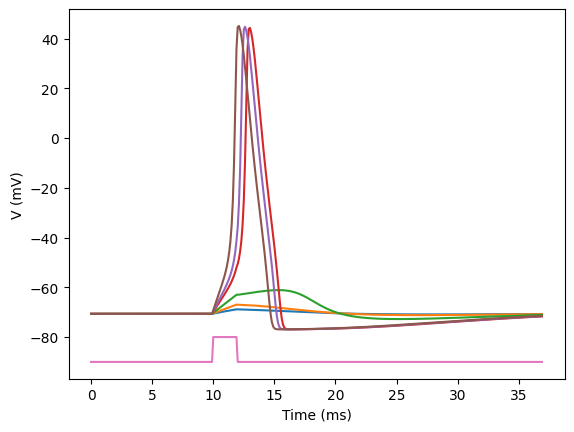

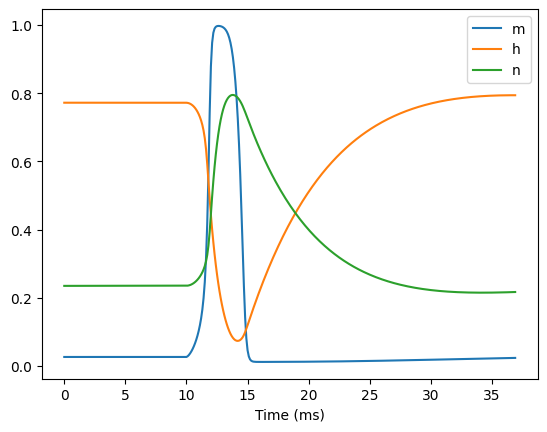

In [76]:
import numpy as np
import matplotlib.pyplot as plt

bp.visualize.line_plot(runner.mon.ts, runner.mon.V, ylabel='V (mV)', plot_ids=np.arange(current.shape[1]))

plt.plot(runner.mon.ts, bm.where(current[:, -1]>0, 10, 0) - 90.)
plt.figure()
plt.plot(runner.mon.ts, runner.mon.m[:, -1])
plt.plot(runner.mon.ts, runner.mon.h[:, -1])
plt.plot(runner.mon.ts, runner.mon.n[:, -1])
plt.legend(['m', 'h', 'n'])
plt.xlabel('Time (ms)')

##### Day 2 进阶作业-HH model

In [78]:
import numpy as np
import brainpy as bp
import brainpy.math as bm

In [79]:
class IK(bp.dyn.IonChannel):
    master_type = bp.dyn.CondNeuGroup

    def update(self, V, *args, **kwargs):
        pass

    def reset_state(self, V, *args, **kwargs):
        pass

In [80]:
class ICa(bp.dyn.IonChannel):
    master_type = bp.dyn.Calcium

    def update(self, V, C, E, *args, **kwargs):
        pass

    def reset_state(self, V, C, E, *args, **kwargs):
        pass

In [81]:
class ICaNa(bp.dyn.IonChannel):
    master_type = bp.mixin.JointType[bp.dyn.Calcium, bp.dyn.Sodium]

    def update(self, V, Ca_info, Na_info, *args, **kwargs):
        pass

    def reset_state(self, V, Ca_info, Na_info, *args, **kwargs):
        pass

In [82]:
class HH(bp.dyn.CondNeuGroupLTC):
    def __init__(self, size):
        super().__init__(size)

        self.INa = bp.dyn.INa_HH1952(size)
        self.IK = bp.dyn.IK_HH1952(size)
        self.IL = bp.dyn.IL(size, E=-54.387, g_max=0.03)

In [83]:
hh = HH(1)
runner = bp.DSRunner(hh, monitors={'na-p': hh.INa.p, 'na-q': hh.INa.q, 'k-p': hh.IK.p, 'v': hh.V})
inputs = np.ones(1000) * 4.
_ = runner.run(inputs=inputs)

Predict 1000 steps: : 100%|██████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2070.02it/s]


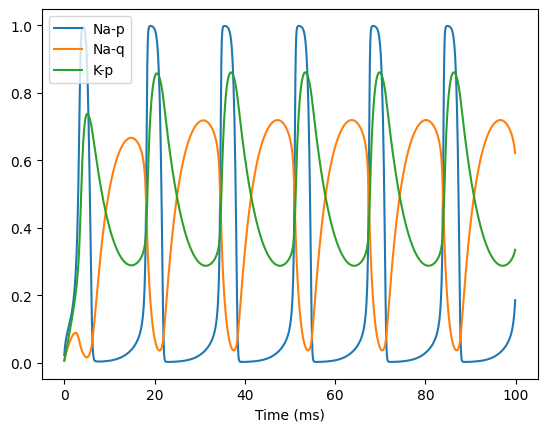

In [85]:
bp.visualize.line_plot(runner.mon.ts, runner.mon['na-p'], legend='Na-p')
bp.visualize.line_plot(runner.mon.ts, runner.mon['na-q'], legend='Na-q')
bp.visualize.line_plot(runner.mon.ts,
                       runner.mon['k-p'],
                       legend='K-p',
                       show=True)

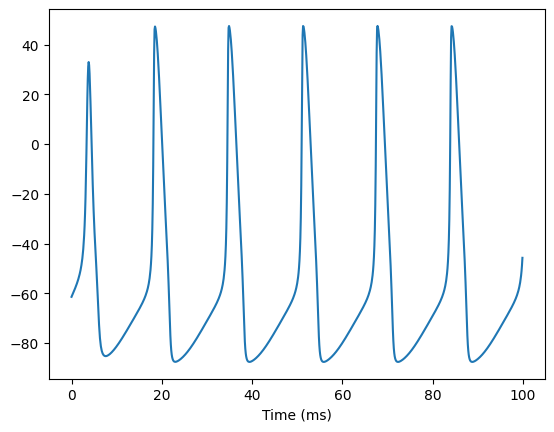

In [86]:
bp.visualize.line_plot(runner.mon.ts, runner.mon['v'], show=True)

In [88]:
class IK(bp.dyn.IonChannel):
    master_type = bp.dyn.HHTypedNeuron

    def __init__(self, size, E=-77., g_max=36., phi=1., method='exp_auto'):
        super().__init__(size)
        self.g_max = g_max
        self.E = E
        self.phi = phi
        self.integral = bp.odeint(self.dn, method=method)

    def dn(self, n, t, V):
        alpha_n = 0.01 * (V + 55) / (1 - bm.exp(-(V + 55) / 10))
        beta_n = 0.125 * bm.exp(-(V + 65) / 80)
        return self.phi * (alpha_n * (1. - n) - beta_n * n)

    def reset_state(self, V, batch_or_mode=None, **kwargs):
        self.n = bp.init.variable_(bm.zeros, self.num, batch_or_mode)

    def update(self, V):
        t = bp.share.load('t')
        dt = bp.share.load('dt')
        self.n.value = self.integral(self.n, t, V, dt=dt)

    def current(self, V):
        return self.g_max * self.n ** 4 * (self.E - V)

In [98]:
class INa(bp.dyn.IonChannel):
    master_type = bp.dyn.HHTypedNeuron

    def __init__(self, size, E= 50., g_max=120., phi=1., method='exp_auto'):
        super(INa, self).__init__(size)
        self.g_max = g_max
        self.E = E
        self.phi = phi
        self.integral = bp.odeint(bp.JointEq(self.dm, self.dh), method=method)
#         print("ceshi{}".format(self.num))

    def dm(self, m, t, V):
        alpha_m = 0.11 * (V + 40) / (1 - bm.exp (-(V + 40) / 10))
        beta_m = 4* bm.exp(-(V + 65) /18)
        return self.phi * (alpha_m * (1. - m) - beta_m * m)

    def dh(self, h, t, V):
        alpha_h = 0.07 * bm.exp(-(V + 65) / 20)
        beta_h = 1. / (1 + bm.exp(-(V + 35) / 10))
        return self.phi * (alpha_h * (1. - h) - beta_h * h)

    def reset_state(self, V, batch_or_mode=None, **kwargs):
        self.m = bp.init.variable_(bm.zeros, self.num, batch_or_mode)
        self.h = bp.init.variable_(bm.zeros, self.num, batch_or_mode)

    def update(self, V):
        t = bp.share.load('t')
        dt = bp.share.load('dt')
        self.m.value, self.h.value = self.integral(self.m, self.h, t, V, dt=dt)

    def current(self, V):
        return self.g_max * self.m ** 3 * self.h * (self.E - V)

In [99]:
class IL(bp.dyn.IonChannel):
    master_type = bp.dyn.HHTypedNeuron

    def __init__(self, size, E=-54.39, g_max=0.03):
        super(IL, self).__init__(size)
        self.g_max = g_max
        self.E = E


    def reset_state(self, *args, **kwargs):
        pass

    def update(self, V):
        pass

    def current(self, V):
        return self.g_max * (self.E - V)

In [100]:
class HH(bp.dyn.CondNeuGroup):
    def __init__(self, size):
        super().__init__(size, V_initializer=bp.init.Uniform(-80, -60.))
        # TODO: 初始化三个离子通道
        self.IK = IK(size, E = -77.,g_max = 36.)  # 参数：E=-77., g_max=36.
        self.INa = INa(size, E = 50., g_max = 120.)  # 参数：E=50., g_max=120.
        self.IL = IL(size, E = -54.39,g_max = 0.03) # 参数：E=-54.39, g_max=0.03

ceshi1


Predict 2000 steps: : 100%|██████████████████████████████████████████████████████| 2000/2000 [00:00<00:00, 4260.10it/s]


Array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]], dtype=bool)

Text(0.5, 0, 't (ms)')

Text(0, 0.5, 'V (mV)')

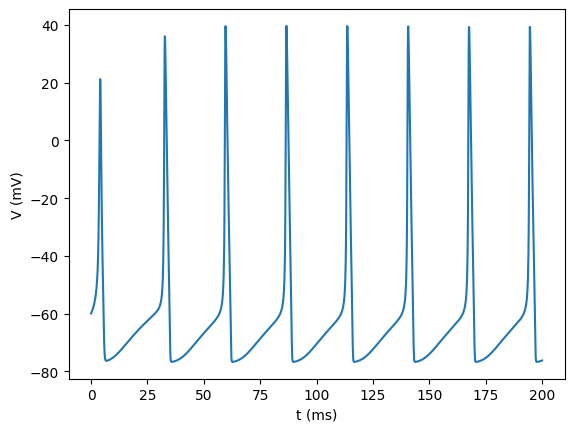

<Figure size 600x200 with 0 Axes>

Text(0.5, 0, 't (ms)')

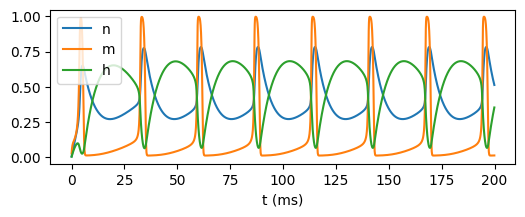

In [102]:
neu = HH(1)
neu.reset()

inputs = np.ones(int(200 / bm.dt)) * 1.698  # 200 ms
runner = bp.DSRunner(neu, monitors=['V', 'IK.n', 'INa.m', 'INa.h'])
runner.run(inputs=inputs)  # the running time is 200 ms

import matplotlib.pyplot as plt

plt.plot(runner.mon['ts'], runner.mon['V'])
plt.xlabel('t (ms)')
plt.ylabel('V (mV)')
plt.show()

plt.figure(figsize=(6, 2))
plt.plot(runner.mon['ts'], runner.mon['IK.n'], label='n')
plt.plot(runner.mon['ts'], runner.mon['INa.m'], label='m')
plt.plot(runner.mon['ts'], runner.mon['INa.h'], label='h')
plt.xlabel('t (ms)')
plt.legend()
plt.show()

##### W1_2 Hodgkin–Huxley神经元 进阶进阶作业

In [2]:
import brainpy as bp
import brainpy.math as bm
import numpy as np
import matplotlib.pyplot as plt

D:\software\anaconda\envs\my_brainpy\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [104]:
class HTC(bp.dyn.CondNeuGroupLTC):
    def __init__(self,size,gKL=0.01, V_initializer=bp.init.OneInit(-65.)):
        super().__init__(size,A=2.9e-4,V_initializer=V_initializer,V_th=20.)
        self.IL = bp.dyn.IL(size,g_max=0.01,E=-70.)
        self.INa = bp.dyn.INa_Ba2002(size,V_sh=-30)
        self.Ih = bp.dyn.Ih_HM1992(size,g_max=0.01,E=-43)

        self.Ca = bp.dyn.CalciumDetailed(size,C_rest=5e-5,tau=10.,d=0.5)
        self.Ca.add_elem(bp.dyn.ICaL_IS2008(size,g_max=0.5))
        self.Ca.add_elem(bp.dyn.ICaN_IS2008(size,g_max=0.5))  # ICaN
        self.Ca.add_elem(bp.dyn.ICaT_HM1992(size,g_max=2.1))  # ICaT
        self.Ca.add_elem(bp.dyn.ICaHT_HM1992(size,g_max=3.0))  # ICaHT

        self.K = bp.dyn.PotassiumFixed(size,E=-90.)
        self.K.add_elem(bp.dyn.IKDR_Ba2002v2(size,V_sh=-30.,phi=0.25))  # IKDR
        self.K.add_elem(bp.dyn.IK_Leak(size,g_max=gKL))

        self.KCa = bp.dyn.MixIons(self.K,self.Ca)
        self.KCa.add_elem(bp.dyn.IAHP_De1994v2(size))  # IAHP

Predict 20000 steps: : 100%|███████████████████████████████████████████████████| 20000/20000 [00:02<00:00, 9424.47it/s]


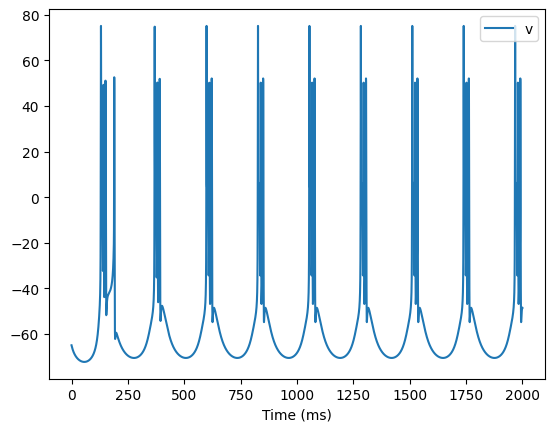

In [109]:
htc = HTC(1)
runner = bp.DSRunner(htc,monitors={'v':htc.V})
inputs = np.ones(20000)*-0.03
_ = runner.run(inputs=inputs)
bp.visualize.line_plot(runner.mon.ts,runner.mon['v'],legend='v',show=True)

##### W2_1 基础作业

In [3]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

In [4]:
import brainpy as bp
import brainpy.math as bm
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def run_LIF_constant_input():
    # 运行LIF模型
    # TODO: 实例化一个LIF模型
    group = bp.neurons.LIF(1)
    # TODO: 实例化DSRunner，设置constant input为22.，并monitor变量V
    runner = bp.DSRunner(group, monitors = ['V'], inputs = ('input', 22.))
    runner(200)  # 运行时长为200ms
    # 结果可视化
    fig, gs = bp.visualize.get_figure(1, 1, 3, 4)
    ax = fig.add_subplot(gs[0, 0])
    plt.plot(runner.mon.ts, runner.mon.V)
    plt.xlabel(r'$t$ (ms)')
    plt.ylabel(r'$V$ (mV)')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.show()

Predict 2000 steps: : 100%|█████████████████████████████████████████████████████| 2000/2000 [00:00<00:00, 11170.41it/s]


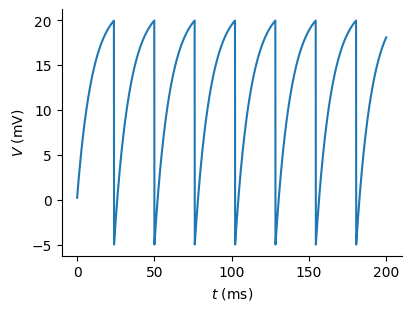

In [12]:
run_LIF_constant_input()

In [13]:
def run_LIF_section_input():
    # 运行LIF模型

    # TODO: 实现一个section input，并对不同神经元设置不同大小的电流输入，观察神经元的输出，确定rheobase current
    current, length = bp.inputs.section_input(
        values=[0, bm.asarray([10., 20., 25.]), 0.],
        durations=[10, 200, 10],
        return_length=True)

    group = bp.neurons.LIF(current.shape[1])

    # TODO: 实例化DSRunner，monitor变量V，并传入section input
    runner = bp.DSRunner(group, monitors = ['V'], inputs = ('input', current, 'iter'))
    runner(length)  # 运行时长为200ms

    # 结果可视化
    fig, gs = bp.visualize.get_figure(1, 1, 4.5, 6)
    ax = fig.add_subplot(gs[0, 0])
    plt.plot(runner.mon.ts, runner.mon.V)
    plt.xlabel(r'$t$ (ms)')
    plt.ylabel(r'$V$ (mV)')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()

Predict 2200 steps: : 100%|██████████████████████████████████████████████████████| 2200/2200 [00:00<00:00, 8212.22it/s]


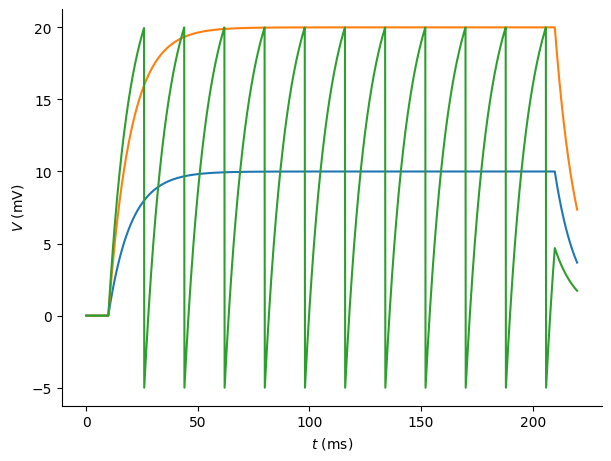

In [14]:
run_LIF_section_input()

##### W1_5 突触模型及编程 Phenomenological Synaptic Models

In [15]:
import numpy as np
import brainpy as bp
import brainpy.math as bm

import matplotlib.pyplot as plt

In [16]:
class ExponSparseCOBA(bp.Projection):
    def __init__(self, pre, post, delay, prob, g_max, tau, E):
        super().__init__()
        self.proj = bp.dyn.FullProjAlignPostMg(
          pre=pre, 
          delay=delay, 
          comm=bp.dnn.EventCSRLinear(bp.conn.FixedProb(prob, pre=pre.num, post=post.num), g_max),
          syn=bp.dyn.Expon.desc(post.num, tau=tau),
          out=bp.dyn.COBA.desc(E=E),
          post=post,)

In [18]:
class SimpleNet(bp.DynSysGroup):
    def __init__(self, E=0.):
        super().__init__()
        self.pre = bp.dyn.SpikeTimeGroup(1, indices=(0, 0, 0, 0), times=(10., 30., 50., 70.))
        self.post = bp.dyn.LifRef(1, V_rest=-60., V_th=-50., V_reset=-60., tau=20., tau_ref=5.,
                                  V_initializer=bp.init.Constant(-60.))
        self.syn = ExponSparseCOBA(self.pre, self.post, delay=None, prob=1., g_max=1., tau=5., E=E)

    def update(self):
        self.pre()
        self.syn()
        self.post()

        # monitor the following variables
        conductance = self.syn.proj.refs['syn'].g
        current = self.post.sum_inputs(self.post.V)
        return conductance, current, self.post.V

In [26]:
def run_a_net(net):
    indices = np.arange(1000)  # 100 ms
    conductances, currents, potentials = bm.for_loop(net.step_run, indices, progress_bar=True)
    ts = indices * bm.get_dt()

    # --- similar to: 
    # runner = bp.DSRunner(net)
    # conductances, currents, potentials = runner.run(100.)

    fig, gs = bp.visualize.get_figure(1, 3, 3.5, 4)
    fig.add_subplot(gs[0, 0])
    plt.plot(ts, conductances)
    plt.title('Syn conductance')
    fig.add_subplot(gs[0, 1])
    plt.plot(ts, currents)
    plt.title('Syn current')
    fig.add_subplot(gs[0, 2])
    plt.plot(ts, potentials)
    plt.title('Post V')
    plt.show()

In [25]:
# def add1(x):
#     return 5+x
# x = bm.random.random([2])
# x
# bm.for_loop(add1,x)

Array(value=Array([0.72063136, 0.5111474 ]), dtype=float32)

Array([5.7206316, 5.5111475], dtype=float32)

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]D:\software\anaconda\envs\my_brainpy\Lib\site-packages\brainpy\_src\mixin.py:489: UserWarning: Please use ".sum_current_inputs()" instead. ".sum_inputs()" will be removed.
  warnings.warn('Please use ".sum_current_inputs()" instead. ".sum_inputs()" will be removed.', UserWarning)
D:\software\anaconda\envs\my_brainpy\Lib\site-packages\brainpy\_src\mixin.py:489: UserWarning: Please use ".sum_current_inputs()" instead. ".sum_inputs()" will be removed.
  warnings.warn('Please use ".sum_current_inputs()" instead. ".sum_inputs()" will be removed.', UserWarning)
100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 310.90it/s]


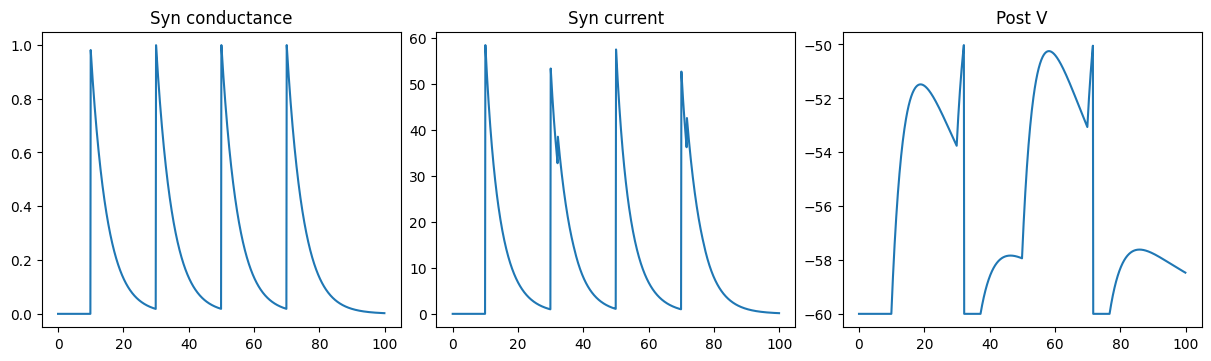

In [27]:
run_a_net(SimpleNet(E=0.))

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]D:\software\anaconda\envs\my_brainpy\Lib\site-packages\brainpy\_src\mixin.py:489: UserWarning: Please use ".sum_current_inputs()" instead. ".sum_inputs()" will be removed.
  warnings.warn('Please use ".sum_current_inputs()" instead. ".sum_inputs()" will be removed.', UserWarning)
D:\software\anaconda\envs\my_brainpy\Lib\site-packages\brainpy\_src\mixin.py:489: UserWarning: Please use ".sum_current_inputs()" instead. ".sum_inputs()" will be removed.
  warnings.warn('Please use ".sum_current_inputs()" instead. ".sum_inputs()" will be removed.', UserWarning)
100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2019.08it/s]


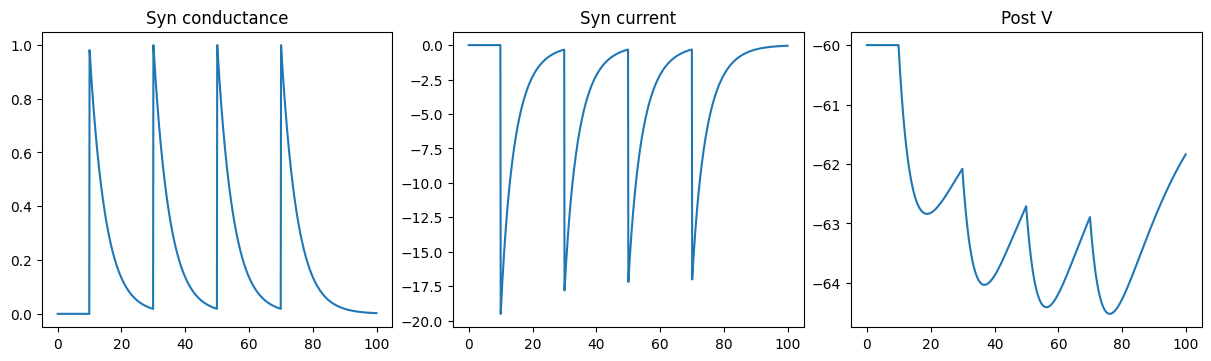

In [28]:
run_a_net(SimpleNet(E=-80.))

##### CUBA

In [29]:
class ExponSparseCUBA(bp.Projection):
    def __init__(self, pre, post, delay, prob, g_max, tau):
        super().__init__()

        self.proj = bp.dyn.FullProjAlignPostMg(
          pre=pre, 
          delay=delay, 
          comm=bp.dnn.EventCSRLinear(bp.conn.FixedProb(prob, pre=pre.num, post=post.num), g_max),
          syn=bp.dyn.Expon.desc(post.num, tau=tau),
          out=bp.dyn.CUBA.desc(),
          post=post, )

In [30]:
class SimpleNet2(bp.DynSysGroup):
    def __init__(self, g_max=1.):
        super().__init__()

        self.pre = bp.dyn.SpikeTimeGroup(1, indices=(0, 0, 0, 0), times=(10., 30., 50., 70.))
        self.post = bp.dyn.LifRef(1, V_rest=-60., V_th=-50., V_reset=-60., tau=20., tau_ref=5.,
                                  V_initializer=bp.init.Constant(-60.))
        self.syn = ExponSparseCUBA(self.pre, self.post, delay=None, prob=1., g_max=g_max, tau=5.)

    def update(self):
        self.pre()
        self.syn()
        self.post()

        # monitor the following variables
        conductance = self.syn.proj.refs['syn'].g
        current = self.post.sum_inputs(self.post.V)
        return conductance, current, self.post.V

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]D:\software\anaconda\envs\my_brainpy\Lib\site-packages\brainpy\_src\mixin.py:489: UserWarning: Please use ".sum_current_inputs()" instead. ".sum_inputs()" will be removed.
  warnings.warn('Please use ".sum_current_inputs()" instead. ".sum_inputs()" will be removed.', UserWarning)
D:\software\anaconda\envs\my_brainpy\Lib\site-packages\brainpy\_src\mixin.py:489: UserWarning: Please use ".sum_current_inputs()" instead. ".sum_inputs()" will be removed.
  warnings.warn('Please use ".sum_current_inputs()" instead. ".sum_inputs()" will be removed.', UserWarning)
100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2523.56it/s]


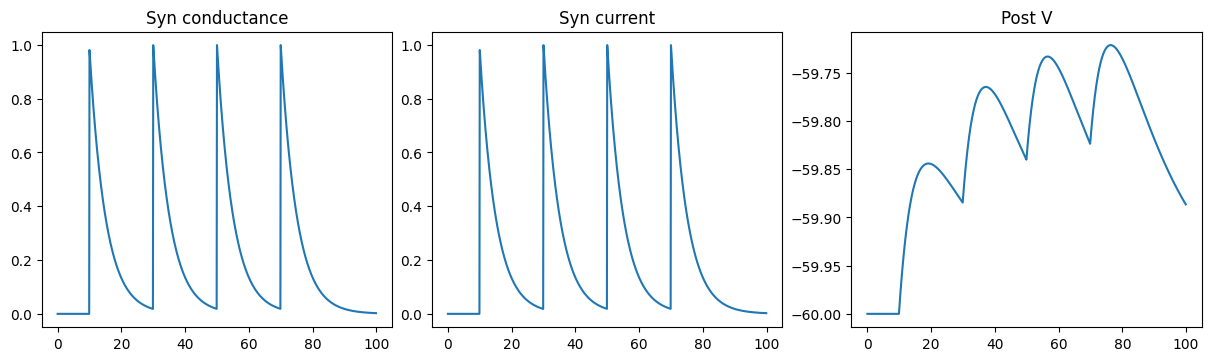

In [39]:
# TODO: how to model excitatory synapse using Exponential + CUBA synapse model?
run_a_net(SimpleNet2(g_max=1.))

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]D:\software\anaconda\envs\my_brainpy\Lib\site-packages\brainpy\_src\mixin.py:489: UserWarning: Please use ".sum_current_inputs()" instead. ".sum_inputs()" will be removed.
  warnings.warn('Please use ".sum_current_inputs()" instead. ".sum_inputs()" will be removed.', UserWarning)
D:\software\anaconda\envs\my_brainpy\Lib\site-packages\brainpy\_src\mixin.py:489: UserWarning: Please use ".sum_current_inputs()" instead. ".sum_inputs()" will be removed.
  warnings.warn('Please use ".sum_current_inputs()" instead. ".sum_inputs()" will be removed.', UserWarning)
100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2390.18it/s]


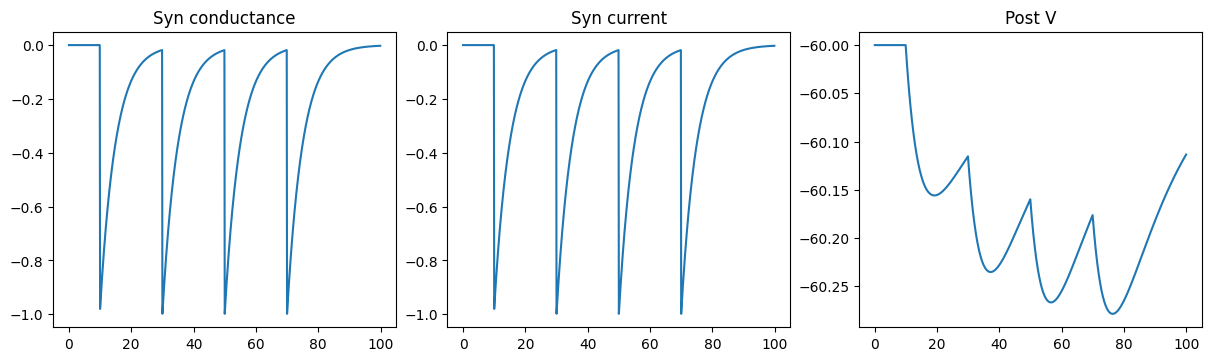

In [32]:
# TODO: how to model inhibitory synapse using Exponential + CUBA synapse model?
run_a_net(SimpleNet2(g_max=-1.))

###### Dense connections   
Masked matrix. 使用掩码矩阵迭代速度加快了

In [34]:
class ExponDenseCOBA(bp.Projection):
    def __init__(self, pre, post, delay, prob, g_max, tau, E):
        super().__init__()

        self.proj = bp.dyn.FullProjAlignPostMg(
          pre=pre, 
          delay=delay, 
          comm=bp.dnn.MaskedLinear(bp.conn.FixedProb(prob, pre=pre.num, post=post.num), g_max),
          syn=bp.dyn.Expon.desc(post.num, tau=tau),
          out=bp.dyn.COBA.desc(E=E),
          post=post, 
        )

In [36]:
class ExponDenseCUBA(bp.Projection):
    def __init__(self, pre, post, delay, prob, g_max, tau):
        super().__init__()

        self.proj = bp.dyn.FullProjAlignPostMg(
          pre=pre, 
          delay=delay, 
          comm=bp.dnn.MaskedLinear(bp.conn.FixedProb(prob, pre=pre.num, post=post.num), g_max),
          syn=bp.dyn.Expon.desc(post.num, tau=tau),
          out=bp.dyn.CUBA.desc(),
          post=post, 
        )  

In [37]:
class SimpleNet2_2(bp.DynSysGroup):
    def __init__(self, g_max=1.):
        super().__init__()

        self.pre = bp.dyn.SpikeTimeGroup(1, indices=(0, 0, 0, 0), times=(10., 30., 50., 70.))
        self.post = bp.dyn.LifRef(1, V_rest=-60., V_th=-50., V_reset=-60., tau=20., tau_ref=5.,
                                  V_initializer=bp.init.Constant(-60.))
        self.syn = ExponDenseCUBA(self.pre, self.post, delay=None, prob=1., g_max=g_max, tau=5.)

    def update(self):
        self.pre()
        self.syn()
        self.post()

        # monitor the following variables
        conductance = self.syn.proj.refs['syn'].g
        current = self.post.sum_inputs(self.post.V)
        return conductance, current, self.post.V

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]D:\software\anaconda\envs\my_brainpy\Lib\site-packages\brainpy\_src\mixin.py:489: UserWarning: Please use ".sum_current_inputs()" instead. ".sum_inputs()" will be removed.
  warnings.warn('Please use ".sum_current_inputs()" instead. ".sum_inputs()" will be removed.', UserWarning)
D:\software\anaconda\envs\my_brainpy\Lib\site-packages\brainpy\_src\mixin.py:489: UserWarning: Please use ".sum_current_inputs()" instead. ".sum_inputs()" will be removed.
  warnings.warn('Please use ".sum_current_inputs()" instead. ".sum_inputs()" will be removed.', UserWarning)
100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 3254.05it/s]


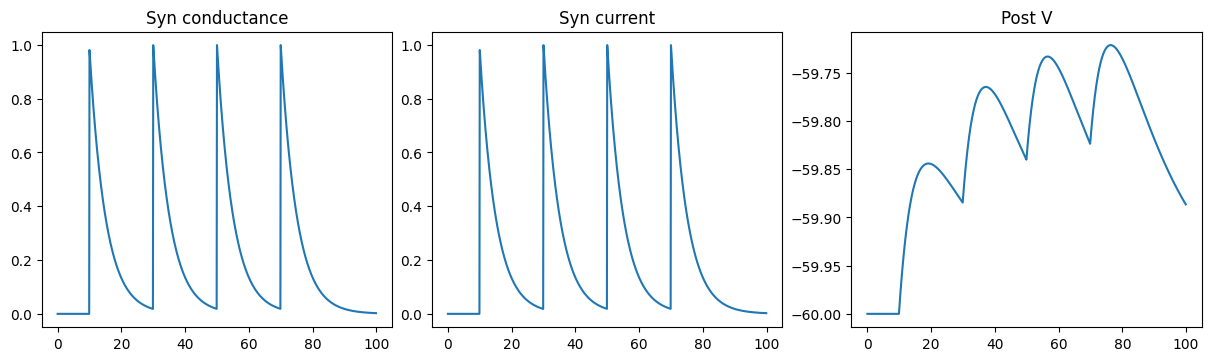

In [40]:
# TODO: how to model excitatory synapse using Exponential + CUBA synapse model?
run_a_net(SimpleNet2_2(g_max=1.))

##### brainpy.dyn.FullProjAlignPreDSMg
注意，此时与突触权重进行相乘的就是float数值而不是脉冲序列了

###### Dual Exponential Model

In [41]:
class DualExpSparseCOBA(bp.Projection):
    def __init__(self, pre, post, delay, prob, g_max, tau_decay, tau_rise, E):
        super().__init__()

        self.proj = bp.dyn.FullProjAlignPreDSMg(
          pre=pre, 
          delay=delay, 
          syn=bp.dyn.DualExpon.desc(pre.num, tau_decay=tau_decay, tau_rise=tau_rise),
          comm=bp.dnn.CSRLinear(bp.conn.FixedProb(prob, pre=pre.num, post=post.num), g_max),
          out=bp.dyn.COBA(E=E),
          post=post, 
        )

In [42]:
class SimpleNet4(bp.DynSysGroup):
    def __init__(self, E=0.):
        super().__init__()

        self.pre = bp.dyn.SpikeTimeGroup(1, indices=(0, 0, 0, 0), times=(10., 30., 50., 70.))
        self.post = bp.dyn.LifRef(1, V_rest=-60., V_th=-50., V_reset=-60., tau=20., tau_ref=5.,
                                  V_initializer=bp.init.Constant(-60.))
        self.syn = DualExpSparseCOBA(self.pre, self.post, delay=None, prob=1., g_max=1., 
                                     tau_decay=5., tau_rise=1., E=E)

    def update(self):
        self.pre()
        self.syn()
        self.post()

        # monitor the following variables
        conductance = self.syn.proj.refs['syn'].g
        current = self.post.sum_inputs(self.post.V)
        return conductance, current, self.post.V

In [48]:
def run_a_net(net):
    indices = np.arange(2000)  # 100 ms
    conductances, currents, potentials = bm.for_loop(net.step_run, indices, progress_bar=True)
    ts = indices * bm.get_dt()

    # --- similar to: 
    # runner = bp.DSRunner(net)
    # conductances, currents, potentials = runner.run(100.)

    fig, gs = bp.visualize.get_figure(1, 3, 3.5, 4)
    fig.add_subplot(gs[0, 0])
    plt.plot(ts, conductances)
    plt.title('Syn conductance')
    fig.add_subplot(gs[0, 1])
    plt.plot(ts, currents)
    plt.title('Syn current')
    fig.add_subplot(gs[0, 2])
    plt.plot(ts, potentials)
    plt.title('Post V')
    plt.show()

  0%|                                                                                         | 0/2000 [00:00<?, ?it/s]D:\software\anaconda\envs\my_brainpy\Lib\site-packages\brainpy\_src\mixin.py:489: UserWarning: Please use ".sum_current_inputs()" instead. ".sum_inputs()" will be removed.
  warnings.warn('Please use ".sum_current_inputs()" instead. ".sum_inputs()" will be removed.', UserWarning)
D:\software\anaconda\envs\my_brainpy\Lib\site-packages\brainpy\_src\mixin.py:489: UserWarning: Please use ".sum_current_inputs()" instead. ".sum_inputs()" will be removed.
  warnings.warn('Please use ".sum_current_inputs()" instead. ".sum_inputs()" will be removed.', UserWarning)
100%|████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:00<00:00, 3588.91it/s]


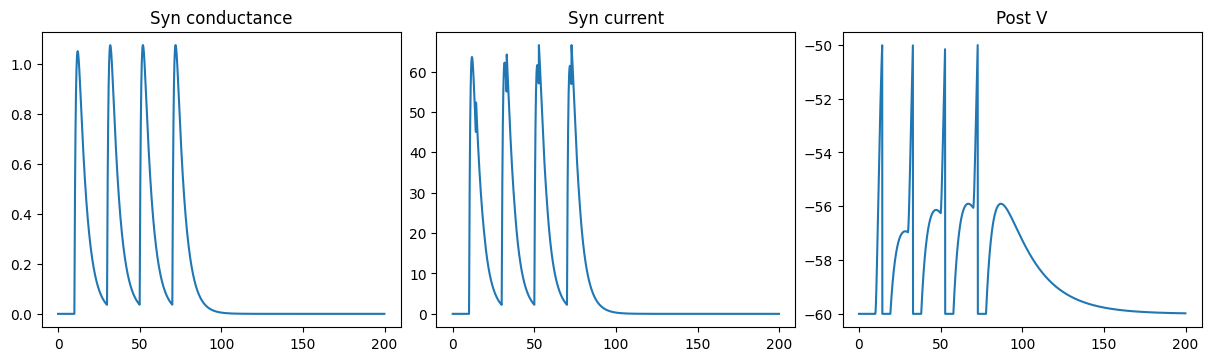

In [49]:
# TODO: how to model excitatory synapse using Dual Exponential + COBA synapse model?
run_a_net(SimpleNet4(E=5.))

In [52]:
def run_a_net(net):
    indices = np.arange(1000)  # 100 ms
    conductances, currents, potentials = bm.for_loop(net.step_run, indices, progress_bar=True)
    ts = indices * bm.get_dt()

    # --- similar to: 
    # runner = bp.DSRunner(net)
    # conductances, currents, potentials = runner.run(100.)

    fig, gs = bp.visualize.get_figure(1, 3, 3.5, 4)
    fig.add_subplot(gs[0, 0])
    plt.plot(ts, conductances)
    plt.title('Syn conductance')
    fig.add_subplot(gs[0, 1])
    plt.plot(ts, currents)
    plt.title('Syn current')
    fig.add_subplot(gs[0, 2])
    plt.plot(ts, potentials)
    plt.title('Post V')
    plt.show()

##### Problem of Phenomenological Synaptic Models

In [53]:
class SimpleNet5(bp.DynSysGroup):
    def __init__(self, freqs=10.):
        super().__init__()
        self.pre = bp.dyn.PoissonGroup(1, freqs=freqs)
        self.post = bp.dyn.LifRef(1, V_rest=-60., V_th=-50., V_reset=-60., tau=20., tau_ref=5.,
                                  V_initializer=bp.init.Constant(-60.))
        self.syn = DualExpSparseCOBA(self.pre, self.post, delay=None, prob=1., g_max=1., 
                                     tau_decay=5., tau_rise=1., E=0.)

    def update(self):
        self.pre()
        self.syn()
        self.post()
        return self.syn.proj.refs['syn'].g, self.post.V

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1902.56it/s]


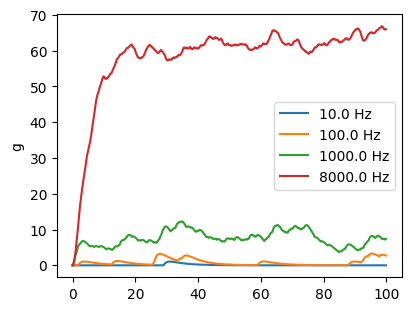

In [57]:
def compare(freqs):
    fig, _ = bp.visualize.get_figure(1, 1, 3., 4.)
    for freq in freqs:
        net = SimpleNet5(freqs=freq)
        indices = np.arange(1000)  # 100 ms
        conductances, potentials = bm.for_loop(net.step_run, indices, progress_bar=True)
        plt.plot(indices * bm.get_dt(), conductances, label=f'{freq} Hz')
    plt.legend()
    plt.ylabel('g')
    plt.show()


compare([10., 100., 1000., 8000.])

#### W2_1: reduced model 进阶作业

In [58]:
import brainpy as bp
import brainpy.math as bm
import numpy as np
import matplotlib.pyplot as plt

bm.enable_x64()

###### 1. Building a Leaky Integrate-and-Fire (LIF) neuron model (advanced)

In [60]:
# 产生均值为0，方差为1的数
bm.random.randn(10)

Array(value=Array([-0.35873191, -1.75060508,  0.34556523,  0.91180729, -0.32720207,
                   -0.20869341,  1.92996709,  0.34904111, -0.6457035 ,  0.1086715 ],      dtype=float64),
      dtype=float64)

In [65]:
class LIF(bp.dyn.NeuDyn):
    def __init__(self, size, V_rest=0., V_reset=-5., V_th=20., R=1., tau=10., t_ref=5., **kwargs):
        # 初始化父类
        super(LIF, self).__init__(size=size, **kwargs)

        # 初始化参数
        self.V_rest = V_rest  # 静息电位
        self.V_reset = V_reset  # 重置电压
        self.V_th = V_th   # 阈值电压
        self.R = R
        self.tau = tau
        self.t_ref = t_ref  # 不应期时长

        # 初始化变量
        # todo: 初始化膜电压self.V：统一设置为V_reset，或增加一些随机性，使之在V_reset附近波动
        self.V = bm.Variable(bm.random.randn(self.num) + V_reset)
        # todo: 初始化不应期记录self.refractory，bool类型，如果神经元处于不应期则为1，否则为0
        self.refractory = bm.Variable(bm.zeros(self.num, dtype = bool))
        # todo: 初始化上一次脉冲发放时间记录self.t_last_spike，记录神经元上一次发放脉冲的时间，统一初始化为0即可
        self.t_last_spike = bm.Variable(bm.ones(self.num) * -1e7)
#         self.t_last_spike = bm.Variable(bm.zeros(self.num))
        # todo: 初始化脉冲发放状态self.spike：bool类型，如果神经元正处于发放状态则为1，否则为0
        self.spike = bm.Variable(bm.zeros(self.num, dtype = bool))
        self.input = bm.Variable(bm.zeros(self.num))  # 初始化外部输入电流

        # 使用指数欧拉方法进行积分
        self.integral = bp.odeint(f=self.derivative, method='exponential_euler')

    # 定义膜电位关于时间变化的微分方程
    def derivative(self, V, t, Iext):  # Iext为外部输入电流
        # todo: dVdt = 
        dVdt = (self.R * Iext - V + self.V_rest) / self.tau 
        return dVdt

    def update(self):
        t, dt = bp.share['t'], bp.share['dt']  # 获取时间_t和积分步长_dt

        # 以数组的方式对神经元进行更新

        # todo: 数值积分，更新膜电位，用到self.integral()，暂时存储在变量V中 （先不考虑是否处于不应期）
        V = self.integral(self.V, t, self.input, dt = dt)
        refractory = (t - self.t_last_spike) <= self.t_ref  # 判断神经元是否处于不应期
        # todo: 若处于不应期，则返回原始膜电位self.V，否则返回更新后的膜电位V
        V = bm.where(refractory, self.V, V)
        spike = V > self.V_th  # 将大于阈值的神经元标记为发放了脉冲
        # todo: 将大于阈值的神经元标记为发放了脉冲（注意更新时要使用in-place udpdate)
        self.spike[:] = spike

        # todo: 更新最后一次脉冲发放时间（提示：如果此刻发放了脉冲，则将时间更新为此刻，否则保留原先的数值）
        self.t_last_spike[:] = bm.where(spike, t, self.t_last_spike)

        self.V[:] = bm.where(spike, self.V_reset, V)  # 将发放了脉冲的神经元膜电位置为V_reset，其余不变

        self.refractory[:] = bm.logical_or(refractory, spike)  # 更新神经元是否处于不应期

        self.input[:] = 0.  # 重置外界输入

##### Run the LIF model to see if you are correct

In [68]:
def run_LIF():
    # 运行LIF模型

    group = LIF(1)
    runner = bp.DSRunner(group, monitors=['V'], inputs=('input', 22.))
    runner(200)  # 运行时长为200ms

    # 结果可视化
    fig, gs = bp.visualize.get_figure(1, 1, 3, 4)
    ax = fig.add_subplot(gs[0, 0])
    plt.plot(runner.mon.ts, runner.mon.V)
    plt.xlabel(r'$t$ (ms)')
    plt.ylabel(r'$V$ (mV)')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()

Predict 2000 steps: : 100%|██████████████████████████████████████████████████████| 2000/2000 [00:00<00:00, 8454.05it/s]


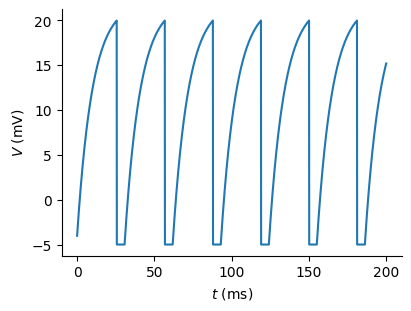

In [69]:
run_LIF()

##### 2. Building a AdEx neuron model
You can also modify the parameters (e.g, a, b, and the input current) in the AdEx model to see how they affect the firing pattern

In [72]:
class AdEx(bp.dyn.NeuDyn):
    def __init__(self, size, 
               V_rest=-65., V_reset=-68., V_th=-30., V_T=-59.9, delta_T=3.48,
               a=1., b=10., R=1., tau=10., tau_w=30., tau_ref=0.,
               **kwargs):
        # 初始化父类
        super(AdEx, self).__init__(size=size, **kwargs)

        # 初始化参数
        self.V_rest = V_rest
        self.V_reset = V_reset
        self.V_th = V_th
        self.V_T = V_T
        self.delta_T = delta_T
        self.a = a
        self.b = b
        self.R = R
        self.tau = tau
        self.tau_w = tau_w

        self.tau_ref = tau_ref

        # 初始化变量
        self.V = bm.Variable(bm.random.randn(self.num) - 65.)
        self.w = bm.Variable(bm.zeros(self.num))
        self.input = bm.Variable(bm.zeros(self.num))
        self.t_last_spike = bm.Variable(bm.ones(self.num) * -1e7)  # 上一次脉冲发放时间
        self.refractory = bm.Variable(bm.zeros(self.num, dtype=bool))  # 是否处于不应期
        self.spike = bm.Variable(bm.zeros(self.num, dtype=bool))  # 脉冲发放状态

        # 定义积分器
        self.integral = bp.odeint(f=self.derivative, method='exp_auto')

    def dV(self, V, t, w, I):
        # TODO: 定义膜电位关于时间变化的微分方程
        temp = self.V_rest - V + self.delta_T * bm.exp((V - self.V_T) / self.delta_T) + self.R*(I - w) 
        dVdt = temp / self.tau
        return dVdt

    def dw(self, w, t, V):
        # TODO: 定义w关于时间变化的微分方程
        temp = self.a * (V - self.V_rest) - w
        dwdt = temp / self.tau_w
        return dwdt



    @property
    def derivative(self):
        # todo: 将两个微分方程联合为一个，以便同时积分（使用brainpy.JointEq() )
        return bp.JointEq([self.dV, self.dw])

    def update(self):
        t, dt = bp.share['t'], bp.share['dt']
        # TODO: # 更新变量V, w，暂存在V, w中
        V, w = self.integral(self.V.value, self.w.value, t, self.input, dt)
        refractory = (t - self.t_last_spike) <= self.tau_ref  # 判断神经元是否处于不应期
        V = bm.where(refractory, self.V, V)  # 若处于不应期，则返回原始膜电位self.V，否则返回更新后的膜电位V
        spike = V > self.V_th  # 将大于阈值的神经元标记为发放了脉冲
        self.spike[:] = spike  # 更新神经元脉冲发放状态
        self.t_last_spike[:] = bm.where(spike, t, self.t_last_spike)  # 更新最后一次脉冲发放时间
        # todo: 将发放了脉冲的神经元的V置为V_reset，其余不变，并传回给self.V（注意更新时要使用in-place udpdate)
        self.V[:] = bm.where(spike, self.V_reset, V)
        # todo: 将发放了脉冲的神经元的w增加b，其余不变，并传回给self.w（注意更新时要使用in-place udpdate)
        self.w[:] = bm.where(spike, w+self.b, w)

        self.refractory[:] = bm.logical_or(refractory, spike)  # 更新神经元是否处于不应期
        self.input[:] = 0.  # 重置外界输入

In [111]:
def run_AdEx():
    # 运行AdEx模型
    group = AdEx(10,a = 1.)
    runner = bp.DSRunner(group, monitors=['V', 'w'], inputs=('input', 10.))
    runner(300)
    bp.visualize.line_plot(runner.mon.ts, runner.mon.V, legend='V', show=False)
    bp.visualize.line_plot(runner.mon.ts, runner.mon.w, legend='w', show=True)


Predict 3000 steps: : 100%|██████████████████████████████████████████████████████| 3000/3000 [00:00<00:00, 7547.94it/s]


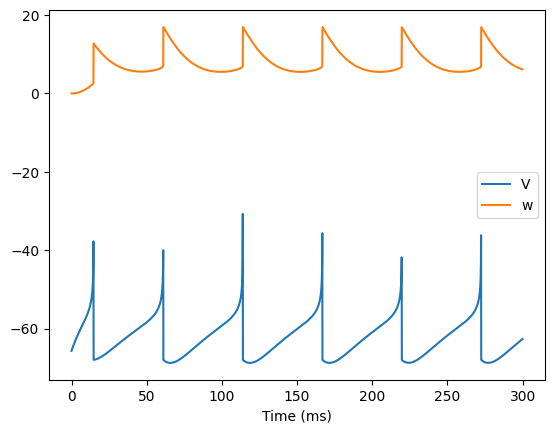

In [112]:
run_AdEx()

##### 3.Building a Izhikevich neuron model

In [115]:
class Izhikevich(bp.dyn.NeuDyn):
    def __init__(self, size, a=0.02, b=0.20, c=-65., d=2., t_ref=0.,
               V_th=30., **kwargs):

        # 初始化父类
        super(Izhikevich, self).__init__(size=size, **kwargs)

        # 初始化参数
        self.a = a
        self.b = b
        self.c = c # 将发放了脉冲的神经元的V置为c
        self.d = d # 将发放了脉冲的神经元的u增加d
        self.V_th = V_th
        self.t_ref = t_ref

        # 初始化变量
        self.V = bm.Variable(bm.random.randn(self.num) - 65.)
        self.u = bm.Variable(self.V * b)
        self.input = bm.Variable(bm.zeros(self.num))
        self.t_last_spike = bm.Variable(bm.ones(self.num) * -1e7)  # 上一次脉冲发放时间
        self.refractory = bm.Variable(bm.zeros(self.num, dtype=bool))  # 是否处于不应期
        self.spike = bm.Variable(bm.zeros(self.num, dtype=bool))  # 脉冲发放状态

        # 定义积分器
        self.integral = bp.odeint(f=self.derivative, method='exp_auto')


    def dV(self, V, t, u, Iext):
        # todo: 变量V的微分方程
        dVdt = 0.04*V*V + 5*V + 140 - u + Iext
        return dVdt

    def du(self, u, t, V):
        # todo: 变量u的微分方程
        dudt = self.a * (self.b * V - u)
        return dudt

    @property
    def derivative(self):
        # todo: 将两个微分方程联合为一个，以便同时积分（使用brainpy.JointEq() )
        return bp.JointEq([self.dV, self.du])

    def update(self):
        _t, _dt = bp.share['t'], bp.share['dt']

        # todo: # 更新变量V, u，暂存在V, u中
        V, u = self.integral(self.V, self.u, _t, self.input, dt = _dt)
        refractory = (_t - self.t_last_spike) <= self.t_ref  # 判断神经元是否处于不应期
        V = bm.where(refractory, self.V, V)  # 若处于不应期，则返回原始膜电位self.V，否则返回更新后的膜电位V
        u = bm.where(refractory, self.u, u)  # u同理
        spike = V > self.V_th  # 将大于阈值的神经元标记为发放了脉冲
        self.spike.value = spike  # 更新神经元脉冲发放状态
        self.t_last_spike.value = bm.where(spike, _t, self.t_last_spike)  # 更新最后一次脉冲发放时间

        # todo: 将发放了脉冲的神经元的V置为c，其余不变，并传回给self.V（注意更新时要使用in-place udpdate)
        self.V[:] = bm.where(spike, self.c, V)
        # todo: 将发放了脉冲的神经元的u增加d，其余不变，并传回给self.u（注意更新时要使用in-place udpdate)
        self.u[:] = bm.where(spike, self.d + u, u)

        self.refractory.value = bm.logical_or(refractory, spike)  # 更新神经元是否处于不应期

        self.input[:] = 0.  # 重置外界输入

In [116]:
def run_Izhikevich():
    # 运行Izhikevich模型
    group = Izhikevich(10)
    runner = bp.DSRunner(group, monitors=['V', 'u'], inputs=('input', 10.))
    runner(300)
    bp.visualize.line_plot(runner.mon.ts, runner.mon.V, legend='V', show=False)
    bp.visualize.line_plot(runner.mon.ts, runner.mon.u, legend='u', show=True)

Predict 3000 steps: : 100%|██████████████████████████████████████████████████████| 3000/3000 [00:00<00:00, 7855.49it/s]


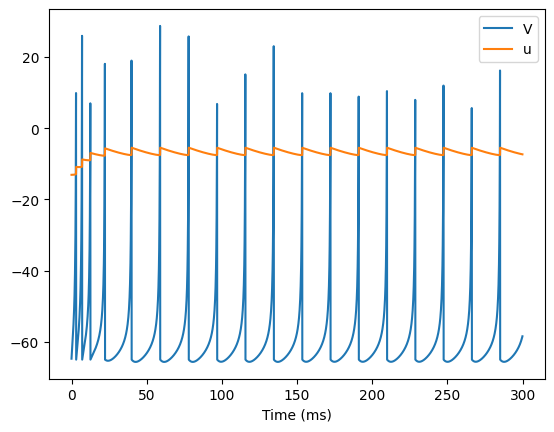

In [117]:
run_Izhikevich()

###### Phase plane analysis of the AdEx neuron model

In [118]:
AdEx = bp.neurons.AdExIF  # 从brainpy导入现成的模型

neuron_AdEx = AdEx(
    size=1,
    a=1.,
    b=10.,
    tau=10.,
    tau_w=100.,
    V_reset=-60.,
    R=.5, delta_T=2., V_rest=-70., V_th=-30., V_T=-50.
)

Iext = 55.

# 可以尝试的参数组合包括但不限于：
# a        0.01, 0.01, 0.5,  -0.5, 1.,   -1.
# b        60.,  5.,   7.,   7.,   10.,  5.
# tau      20.,  20.,  5.,   5.,   10.,  5.
# tau_w    30.,  100., 100., 100., 100., 100.
# V_reset  -55., -55., -51., -47., -60., -60.
# Iext     65.,  65.,  65.,  65.,  55.,  25.

def AdEx_patterns(group):
    group.V[:], group.w[:] = group.V_reset, 0
    runner = bp.DSRunner(group, monitors=['V', 'w', 'spike'], inputs=('input', Iext))
    runner.run(500.)

    runner.mon.V = np.where(runner.mon.spike, 20., runner.mon.V)

    plt.plot(runner.mon.ts, runner.mon.V, label='V')
    plt.plot(runner.mon.ts, runner.mon.w, label='w')
    plt.legend()
    plt.xlabel(r'$t$ (ms)')
    plt.show()

Predict 5000 steps: : 100%|██████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 9777.00it/s]


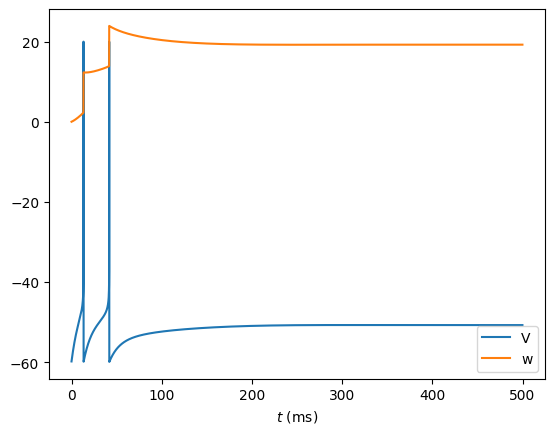

In [119]:
AdEx_patterns(neuron_AdEx)

##### Phase plane analysis: Please fill the todo blanks of the following code.

In [121]:
def ppa_AdEx(group):
    bm.enable_x64()
    
    v_range = [-70., -40.]
    w_range = [-10., 50.]
    
    phase_plane_analyzer = bp.analysis.PhasePlane2D(
        model=group,
        # todo: 待分析变量及其分析区间
        target_vars={'V': v_range, 'w':w_range, },
        # todo: 需要更新的变量
        pars_update= {'I':Iext},
        resolutions=0.05
    )

    # 画出V, w的零增长曲线
    phase_plane_analyzer.plot_nullcline()
    # 画出奇点
    phase_plane_analyzer.plot_fixed_point()
    # 画出向量场
    phase_plane_analyzer.plot_vector_field()
    
    # 分段画出V, w的变化轨迹
    group.V[:], group.w[:] = group.V_reset, 0
    runner = bp.DSRunner(group, monitors=['V', 'w', 'spike'], inputs=('input', Iext))
    runner(500)
    spike = runner.mon.spike.squeeze()
    s_idx = np.where(spike)[0]  # 找到所有发放动作电位对应的index
    s_idx = np.concatenate(([0], s_idx, [len(spike) - 1]))  # 加上起始点和终止点的index
    for i in range(len(s_idx) - 1):
        vs = runner.mon.V[s_idx[i]: s_idx[i + 1]]
        ws = runner.mon.w[s_idx[i]: s_idx[i + 1]]
        plt.plot(vs, ws, color='darkslateblue')
        
    # 画出虚线 x = V_reset
    plt.plot([group.V_reset, group.V_reset], w_range, '--', color='grey', zorder=-1)
    plt.show()

I am computing fx-nullcline ...
I am evaluating fx-nullcline by optimization ...
I am computing fy-nullcline ...
I am evaluating fy-nullcline by optimization ...
I am searching fixed points ...
I am trying to find fixed points by optimization ...
	There are 1240 candidates
I am trying to filter out duplicate fixed points ...
	Found 3 fixed points.
	#1 V=-50.748899719566616, w=19.248851709944116 is a stable focus.
	#2 V=-47.94941233679152, w=22.050461841988458 is a saddle node.
	#3 V=-47.95256963921969, w=22.03969187742035 is a saddle node.
I am creating the vector field ...
Predict 5000 steps: : 100%|█████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 12667.34it/s]


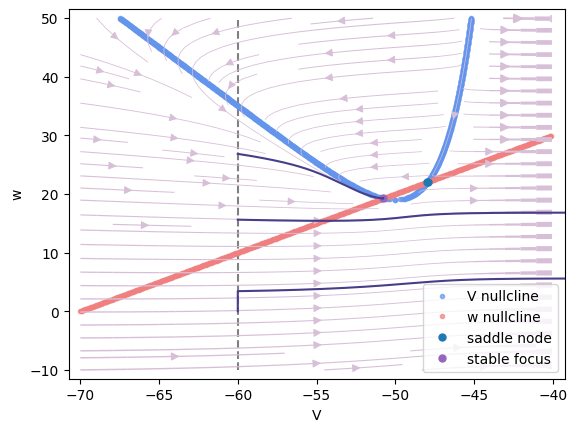

In [122]:
ppa_AdEx(neuron_AdEx)

### Day-4: 进阶作业

##### 1. Customize a three-factor short-term depression model

In [123]:
# Build up the environment
import matplotlib.pyplot as plt
import brainpy as bp
import brainpy.math as bm
import numpy as np

In [128]:
class tf_STD(bp.synapses.TwoEndConn):
    def __init__(self, pre, post, conn, g_max=0.1, U=0.25, tau_rec=200., tau_in=3., tau=8., E=1., delay_step=2,
                 method='exp_auto', syn_type='CUBA', **kwargs):
        super(tf_STD, self).__init__(pre=pre, post=post, conn=conn)
        # 初始化参数
        self.tau_rec = tau_rec
        self.tau_in = tau_in
        self.tau = tau
        self.U = U
        self.g_max = g_max
        self.E = E
        self.delay_step = delay_step
        self.type = syn_type
        # TO DO: 从连接矩阵conn中获取每个连接的突触前神经元pre_ids和突触后神经元post_ids
        self.pre_ids, self.post_ids = self.conn.require('pre_ids', 'post_ids')

        # 初始化变量
        num = len(self.pre_ids)
        self.x = bm.Variable(bm.ones(num))
        self.y = bm.Variable(bm.zeros(num))
        self.g = bm.Variable(bm.zeros(num))
        self.delay = bm.LengthDelay(self.g, delay_step)  # 定义一个处理g的延迟器

        # 定义积分函数
        self.integral = bp.odeint(method=method, f=self.derivative)

    @property  
    def derivative(self):
        # TO DO: 根据网络动力学方程定义在没有spike时变量的演化
        dx = lambda x,t,y: -(1-x-y) / self.tau_rec
        dy = lambda y,t: -y/self.tau_in
        dg = lambda g,t: -g/self.tau
        return bp.JointEq([dx, dy, dg])

    def update(self):
        # 更新各个变量
        # TO DO: 获取突触前神经元的脉冲信息
        syn_sps = bm.pre2syn(self.pre.spike, self.pre_ids) 
        # 模拟没有spike时x,y,g的自然演化
        x, y, g = self.integral(self.x, self.y, self.g, bp.share['t'], bm.dt)
        # TO DO: 根据模型的动力学模拟当spike到达时变量产生的突变 
        x = bm.where(syn_sps, x - self.U * self.x, x)
        y = bm.where(syn_sps, y + self.U * self.x, y)
        g = bm.where(syn_sps, g + self.g_max * y, g)
        self.x.value = x
        self.y.value = y
        self.g.value = g
        # 更新延迟器, 将g的计算延迟delay_step的时间步长
        self.delay.update(self.g)
        delayed_g = self.delay(self.delay_step)
        # 计算突触后电流
        post_g = bm.syn2post(delayed_g, self.post_ids, self.post.num)
        self.post.input += post_g * (self.E - self.post.V_rest)

##### 2. Run the three-factor Short-term depression model with LIF-based pre- and post- neurons

Predict 3000 steps: : 100%|██████████████████████████████████████████████████████| 3000/3000 [00:00<00:00, 5914.09it/s]


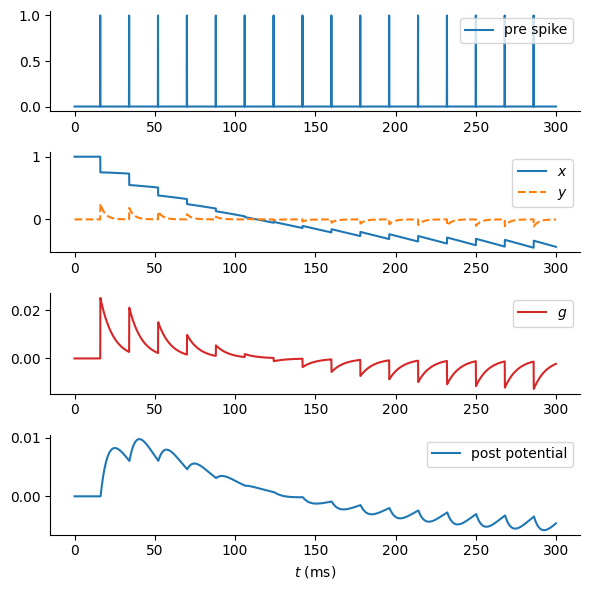

In [131]:
def run_STD(inputs, dur, U=0.25, tau_rec=200., tau_in=3.):
    # TO DO: 定义突触前神经元、突触后神经元和突触连接，并构建神经网络
    neu1 = bp.neurons.LIF(1)
    neu2 = bp.neurons.LIF(1)
    syn = tf_STD(neu1, neu2, bp.connect.All2All(), U = U, tau_rec = tau_rec, tau_in = tau_in)
    net = bp.Network(pre=neu1, syn = syn, post = neu2)

    # TO DO, 将input设置为pre-synaptic neuron的输入，设置DSRunner运行模拟
    # 运行模拟
    runner = bp.DSRunner(net,
                        inputs = [('pre.input', inputs, 'iter')],
                        monitors = ['syn.x', 'syn.y', 'syn.g', 'pre.spike', 'post.V'])
    runner.run(dur)

    # 可视化

    fig, ax = plt.subplots(4, 1, figsize=(6, 6))
    ax[0].plot(runner.mon.ts, runner.mon['pre.spike'][:, 0], label='pre spike')
    ax[0].legend()
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['right'].set_visible(False)

    ax[1].plot(runner.mon.ts, runner.mon['syn.x'][:, 0], label=r'$x$')
    ax[1].plot(runner.mon.ts, runner.mon['syn.y'][:, 0], label=r'$y$', linestyle='--')
    ax[1].legend()
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)

    ax[2].plot(runner.mon.ts, runner.mon['syn.g'][:, 0], label=r'$g$', color=u'#d62728')
    ax[2].legend()
    ax[2].spines['top'].set_visible(False)
    ax[2].spines['right'].set_visible(False)

    ax[3].plot(runner.mon.ts, runner.mon['post.V'][:, 0], label='post potential')
    ax[3].spines['top'].set_visible(False)
    ax[3].spines['right'].set_visible(False)
    ax[3].legend()


    plt.xlabel(r'$t$ (ms)')
    plt.tight_layout()
    plt.show()

# 设置输入到突触前（分段）电流
I0 = 25.
T0 = 300.
inputs, dur = bp.inputs.section_input(values=[I0],
                                    durations=[T0],
                                    return_length=True) #设置电流20mA
run_STD(inputs = inputs, dur = dur)

##### 3. Customize a short-term plasticity model

In [132]:
class STP(bp.synapses.TwoEndConn):
    def __init__(self, pre, post, conn, g_max=0.1, U=0.15, tau_f=1500., tau_d=200., tau=8., E=1., delay_step=2,
                 method='exp_auto', syn_type='CUBA', **kwargs):
        super(STP, self).__init__(pre=pre, post=post, conn=conn)
        # 初始化参数
        self.tau_d = tau_d
        self.tau_f = tau_f
        self.tau = tau
        self.U = U
        self.g_max = g_max
        self.E = E
        self.delay_step = delay_step
        self.type = syn_type
        # TO DO:从conn中获取每个连接的突触前神经元pre_ids和突触后神经元post_ids
        self.pre_ids, self.post_ids = self.conn.require('pre_ids', 'post_ids')

        # 初始化变量
        num = len(self.pre_ids)
        self.x = bm.Variable(bm.ones(num))
        self.u = bm.Variable(bm.zeros(num))
        self.g = bm.Variable(bm.zeros(num))
        self.delay = bm.LengthDelay(self.g, delay_step)  # 定义一个处理g的延迟器

        # 定义积分函数
        self.integral = bp.odeint(method=method, f=self.derivative)

    @property
    def derivative(self):
        # TO DO: 根据网络动力学方程定义在没有spike时变量的演化
        du = lambda u, t: -u / self.tau_f
        dx = lambda x, t: (1-x) / self.tau_d
        dg = lambda g, t: -g / self.tau
        return bp.JointEq([du, dx, dg])

    def update(self):
        # 更新各个变量
        syn_sps = bm.pre2syn(self.pre.spike, self.pre_ids)  # 哪些突触前神经炎产生了脉冲
        u, x, g = self.integral(self.u, self.x, self.g, bp.share['t'], bm.dt)
        #根据模型动力学模拟spike到达时变量的突变
        u = bm.where(syn_sps, u + self.U * (1-self.u) ,u)
        x = bm.where(syn_sps, x - u*self.x ,x)
        g = bm.where(syn_sps, self.g_max * u*self.x ,g)
        self.u.value = u
        self.x.value = x
        self.g.value = g
        # 更新延迟器
        self.delay.update(self.g)
        delayed_g = self.delay(self.delay_step)
        # 计算突触后电流
        post_g = bm.syn2post(delayed_g, self.post_ids, self.post.num)
        self.post.input += post_g * (self.E - self.post.V_rest)

Predict 3000 steps: : 100%|██████████████████████████████████████████████████████| 3000/3000 [00:00<00:00, 6343.82it/s]


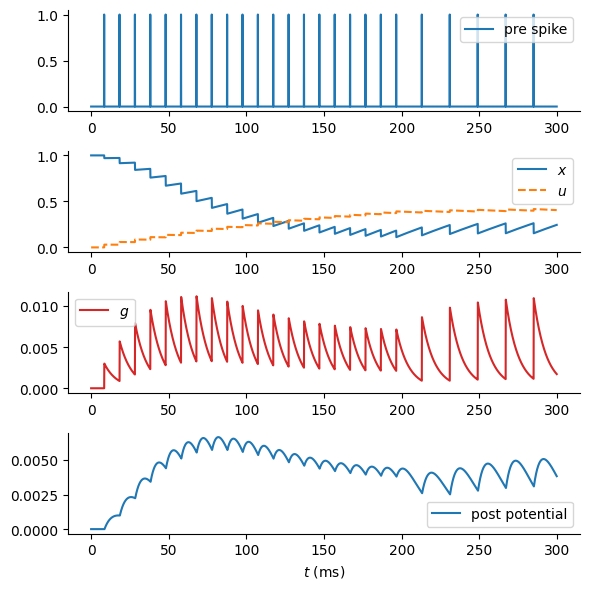

In [134]:
def run_STP(inputs, dur, tau_d = 130., tau_f = 530., U=0.03):
    # 定义突触前神经元、突触后神经元和突触连接，并构建神经网络
    neu1 = bp.neurons.LIF(1)
    neu2 = bp.neurons.LIF(1)
    syn = STP(neu1, neu2, bp.connect.All2All(), tau_d = tau_d, tau_f = tau_f, U=U)
    net = bp.Network(pre=neu1, syn=syn, post=neu2)

    # 运行模拟
    runner = bp.DSRunner(net,
                           inputs=[('pre.input', inputs, 'iter')],
                           monitors=['syn.u', 'syn.x', 'syn.g','pre.spike','post.V'])
    runner.run(dur)

    # 可视化

    fig, ax = plt.subplots(4, 1, figsize=(6, 6))
    ax[0].plot(runner.mon.ts, runner.mon['pre.spike'][:, 0], label='pre spike')
    ax[0].legend()
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['right'].set_visible(False)

    ax[1].plot(runner.mon.ts, runner.mon['syn.x'][:, 0], label=r'$x$')
    ax[1].plot(runner.mon.ts, runner.mon['syn.u'][:, 0], label=r'$u$', linestyle='--')
    ax[1].legend()
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)

    ax[2].plot(runner.mon.ts, runner.mon['syn.g'][:, 0], label=r'$g$', color=u'#d62728')
    ax[2].legend()
    ax[2].spines['top'].set_visible(False)
    ax[2].spines['right'].set_visible(False)

    ax[3].plot(runner.mon.ts, runner.mon['post.V'][:, 0], label='post potential')
    ax[3].spines['top'].set_visible(False)
    ax[3].spines['right'].set_visible(False)
    ax[3].legend()


    plt.xlabel(r'$t$ (ms)')
    plt.tight_layout()
    plt.show()

# 设置输入到突触前（分段）电流
I0 = 35.
I1 = 25.
T0 = 200.
T1 = 100.
inputs, dur = bp.inputs.section_input(values=[I0, I1],
                                    durations=[T0, T1],
                                    return_length=True) #设置电流20mA
run_STP(inputs = inputs, dur = dur)

#### Day 4: STP基础作业

In [135]:
import brainpy as bp
import brainpy.math as bm
import matplotlib.pyplot as plt
class STP(bp.synapses.TwoEndConn):
    def __init__(self, pre, post, conn, g_max=0.1, U=0.15, tau_f=1500., tau_d=200., tau=8., E=1., delay_step=2,
                 method='exp_auto', syn_type='CUBA', **kwargs):
        super(STP, self).__init__(pre=pre, post=post, conn=conn)
        # 初始化参数
        self.tau_d = tau_d
        self.tau_f = tau_f
        self.tau = tau
        self.U = U
        self.g_max = g_max
        self.E = E
        self.delay_step = delay_step
        self.type = syn_type
        # 获取每个连接的突触前神经元pre_ids和突触后神经元post_ids
        self.pre_ids, self.post_ids = self.conn.require('pre_ids', 'post_ids')

        # 初始化变量
        num = len(self.pre_ids)
        self.x = bm.Variable(bm.ones(num))
        self.u = bm.Variable(bm.zeros(num))
        self.g = bm.Variable(bm.zeros(num))
        self.delay = bm.LengthDelay(self.g, delay_step)  # 定义一个处理g的延迟器

        # 定义积分函数
        self.integral = bp.odeint(method=method, f=self.derivative)

    @property
    def derivative(self):
        du = lambda u, t: -u / self.tau_f
        dx = lambda x, t: (1 - x) / self.tau_d
        dg = lambda g, t: -g / self.tau
        return bp.JointEq([du, dx, dg])

    def update(self):
        # 更新各个变量
        syn_sps = bm.pre2syn(self.pre.spike, self.pre_ids)  # 哪些突触前神经炎产生了脉冲
        u, x, g = self.integral(self.u, self.x, self.g, bp.share['t'], bm.dt)
        u = bm.where(syn_sps, u + self.U * (1 - self.u), u)  # 更新后的u
        x = bm.where(syn_sps, x - u * self.x, x)  # 更新后的x
        g = bm.where(syn_sps, g + self.g_max * u * self.x, g)  # 更新后的g
        self.u.value = u
        self.x.value = x
        self.g.value = g
        # 更新延迟器
        self.delay.update(self.g)
        # 将g的计算延迟delay_step的时间步长
        delayed_g = self.delay(self.delay_step)
        # 计算突触后电流
        post_g = bm.syn2post(delayed_g, self.post_ids, self.post.num)
        self.post.input += post_g * (self.E - self.post.V_rest)

##### 1. Run STP with pre- and post- neuron modelled as LIF neuron

Predict 3000 steps: : 100%|██████████████████████████████████████████████████████| 3000/3000 [00:00<00:00, 5439.46it/s]


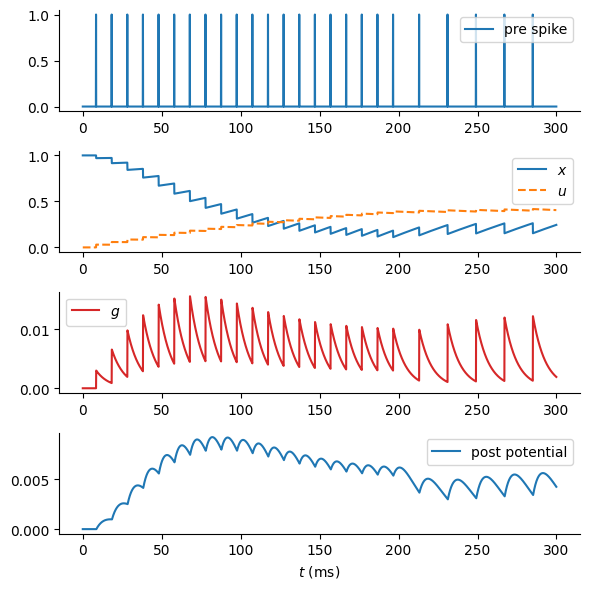

In [136]:
def run_STP(inputs, dur, tau_d = 130., tau_f = 530., U=0.03):
    # TO DO: 定义突触前神经元、突触后神经元和突触连接，并构建神经网络
    neu1 = bp.neurons.LIF(1)
    neu2 = bp.neurons.LIF(1)
    syn = STP(neu1, neu2, bp.connect.All2All(), tau_d = tau_d, tau_f = tau_f, U = U)
    net = bp.Network(pre=neu1, syn=syn, post=neu2)
    # TO DO, 将input设置为pre-synaptic neuron的输入，设置DSRunner运行模拟
    runner = bp.DSRunner(net, inputs = [('pre.input', inputs, 'iter')],
                        monitors = ['syn.u', 'syn.x', 'syn.g', 'pre.spike', 'post.V'])
    runner.run(dur)

    # 可视化

    fig, ax = plt.subplots(4, 1, figsize=(6, 6))
    ax[0].plot(runner.mon.ts, runner.mon['pre.spike'][:, 0], label='pre spike')
    ax[0].legend()
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['right'].set_visible(False)

    ax[1].plot(runner.mon.ts, runner.mon['syn.x'][:, 0], label=r'$x$')
    ax[1].plot(runner.mon.ts, runner.mon['syn.u'][:, 0], label=r'$u$', linestyle='--')
    ax[1].legend()
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)

    ax[2].plot(runner.mon.ts, runner.mon['syn.g'][:, 0], label=r'$g$', color=u'#d62728')
    ax[2].legend()
    ax[2].spines['top'].set_visible(False)
    ax[2].spines['right'].set_visible(False)

    ax[3].plot(runner.mon.ts, runner.mon['post.V'][:, 0], label='post potential')
    ax[3].spines['top'].set_visible(False)
    ax[3].spines['right'].set_visible(False)
    ax[3].legend()

    plt.xlabel(r'$t$ (ms)')
    plt.tight_layout()
    plt.show()

# Run the model
# 设置输入到突触前（分段）电流
I0 = 35.
I1 = 25.
T0 = 200.
T1 = 100.
inputs, dur = bp.inputs.section_input(values=[I0, I1],
                                    durations=[T0, T1],
                                    return_length=True) #设置电流20mA
run_STP(inputs = inputs, dur = dur)

##### 2. Adjust the time constants to replicate short-term depression and short-term facilitation phenomenoa

Predict 10000 steps: : 100%|██████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 10077.00it/s]


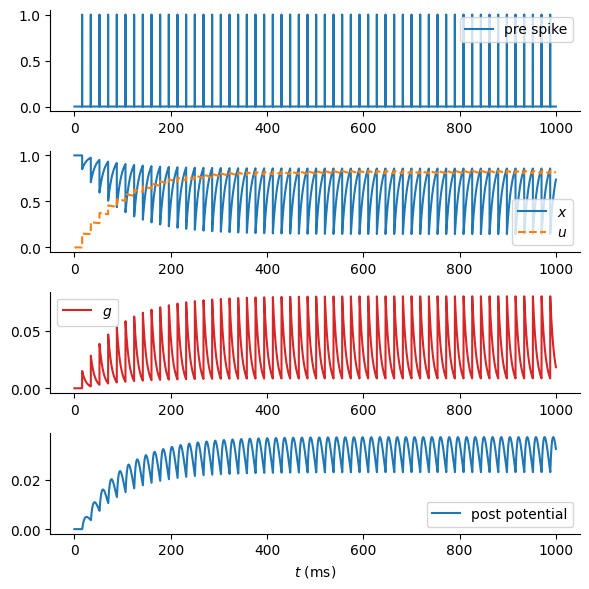

In [137]:
# 设置输入到突触前（分段）电流
I0 = 25.
T0 = 1000.
tau_d = 10.
tau_f = 500.
U = 0.15
inputs, dur = bp.inputs.section_input(values=[I0],
                                    durations=[T0],
                                    return_length=True) #设置电流20mA
run_STP(inputs = inputs, dur = dur, tau_d = tau_d, tau_f = tau_f, U=U)

Predict 10000 steps: : 100%|██████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 10644.79it/s]


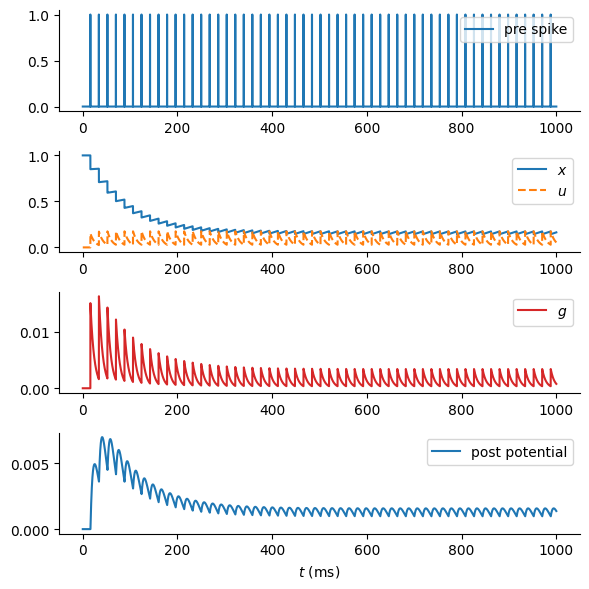

In [138]:
# 设置输入到突触前（分段）电流
I0 = 25.
T0 = 1000.
tau_d = 500.
tau_f = 10.
U = 0.15
inputs, dur = bp.inputs.section_input(values=[I0],
                                    durations=[T0],
                                    return_length=True) #设置电流20mA
run_STP(inputs = inputs, dur = dur, tau_d = tau_d, tau_f = tau_f,U=U)

#### Training a spiking neural network for classifying the MNIST dataset

In [1]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import time

import brainpy as bp
import brainpy.math as bm
import brainpy_datasets as bd

#! pip install brainpy_datasets
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import numpy as np

D:\software\anaconda\envs\my_brainpy\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
bm.set_dt(1.0)

In [5]:
class Exponential(bp.Projection):
    def __init__(self, num_pre, post, scale=20., tau=10.):
        super().__init__()
        self.proj = bp.dyn.ProjAlignPostMg1(
            comm=bp.dnn.Linear(num_pre, post.num, W_initializer=bp.init.KaimingNormal(scale=scale)),
            syn=bp.dyn.Expon.desc(post.num, tau=tau),
            out=bp.dyn.CUBA.desc(),
            post=post, 
        )

##### 构建的SNN模型为一个lif模型和两个突触模型，readout层为 linear，指数衰减突触模型，Leaky Integrator Model

In [6]:
class SNN(bp.DynSysGroup):
    def __init__(self, num_in, num_rec, num_out, scale=10.):
        super(SNN, self).__init__()

        # parameters
        self.num_in = num_in
        self.num_rec = num_rec
        self.num_out = num_out
        # recurrent: r
        self.r = bp.dyn.Lif(num_rec, tau=10, V_reset=0, V_rest=0, V_th=1.)
        # synapse: i->r

        self.i2r = Exponential(num_in, self.r, scale=scale)
        # synapse: r->r
        self.r2r = Exponential(num_rec, self.r, scale=scale)
        # output: o
        self.readout = bp.Sequential(
          bp.dnn.Linear(num_rec, num_out, W_initializer=bp.init.KaimingNormal(scale=20.)),
          bp.dyn.Expon(num_out, tau=10.),
          bp.dyn.Leaky(num_out, tau=5)
        )

    def update(self, spike):
        self.i2r(spike)
        self.r2r(self.r.spike)
        return self.readout(self.r())

    def reset_state(self, *arg, **kwarg):
        return

In [7]:
def plot_voltage_traces(mem, spk=None, dim=(3, 5), spike_height=5):
    gs = GridSpec(*dim)
    mem = 1. * mem
    if spk is not None:
        mem[spk > 0.0] = spike_height
    mem = bm.as_numpy(mem)
    for i in range(np.prod(dim)):
        if i == 0:
            a0 = ax = plt.subplot(gs[i])
        else:
            ax = plt.subplot(gs[i], sharey=a0)
        ax.plot(mem[:, i])
    plt.tight_layout()
    plt.show()

##### A simple synthetic dataset

In [8]:
def print_classification_accuracy(output, target):
    """ Dirty little helper function to compute classification accuracy. """
    m = bm.max(output, axis=0)  # max over time
    am = bm.argmax(m, axis=1)  # argmax over output units
    acc = bm.mean(target == am)  # compare to labels
    print("Accuracy %.3f" % acc)

In [8]:
num_in = 100
num_step = 500
num_sample = 256
freq = 5  # Hz
mask = bm.random.rand(num_step, num_sample, num_in)
x_data = bm.zeros((num_step, num_sample, num_in))
x_data[mask < freq * bm.get_dt() / 1000.] = 1.0
y_data = bm.asarray(bm.random.rand(num_sample) < 0.5, dtype=bm.float_)

In [14]:
# x_data[:,0,0]

Array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

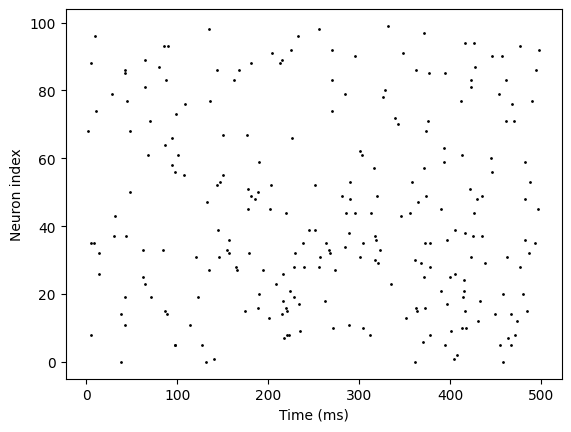

In [15]:
bp.visualize.raster_plot(np.arange(num_step), x_data[:, 0], show=True)

In [15]:
with bm.environment(bm.TrainingMode(batch_size=num_sample)):
    net = SNN(num_in, num_rec=4, num_out=2, scale=10.)

D:\software\anaconda\envs\my_brainpy\Lib\site-packages\brainpy\_src\deprecations.py:89: DeprecationWarning: brainpy.dyn.ProjAlignPostMg1 is deprecated. Use brainpy.dyn.HalfProjAlignPostMg instead.
  _deprecate(message)
D:\software\anaconda\envs\my_brainpy\Lib\site-packages\brainpy\_src\deprecations.py:89: DeprecationWarning: brainpy.dyn.ProjAlignPostMg1 is deprecated. Use brainpy.dyn.HalfProjAlignPostMg instead.
  _deprecate(message)


In [17]:
net

SNN0(mode=TrainingMode(batch_size=256))

In [38]:
runner = bp.DSRunner(net, monitors={'r.spike': net.r.spike, 'r.membrane': net.r.V}, data_first_axis='T')
out = runner.run(inputs=x_data, reset_state=True)

Predict 500 steps: : 100%|█████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 1340.14it/s]


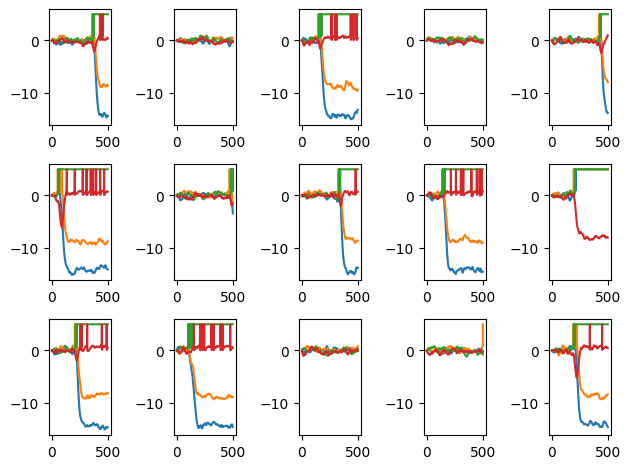

In [39]:
# recurrent membrane potential
plot_voltage_traces(runner.mon.get('r.membrane'), runner.mon.get('r.spike'))

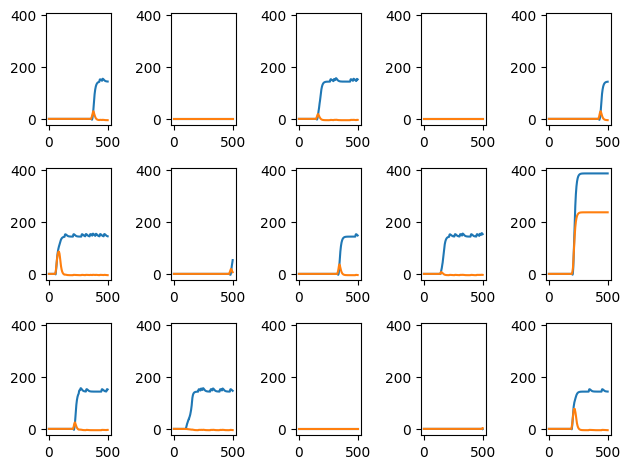

In [40]:
# output activity
plot_voltage_traces(out)

In [41]:
# classification accuracy
print_classification_accuracy(out, y_data)

Accuracy 0.496


In [18]:
class Trainer():
    def __init__(self, net, opt, data):
        self.net = net
        self.opt = opt
        self.opt.register_train_vars(net.train_vars().unique())
        self.grad = bm.grad(self.loss, grad_vars=net.train_vars().unique(), return_value=True)
        self.data = data

    def loss(self, X, Y):
        # reset states
        self.net.reset(X.shape[1])
        
        # runnings
        predictions = bm.for_loop(self.net.step_run, (np.arange(X.shape[0]), X))
        predictions = bm.max(predictions, axis=0)  # MAX over time
        l = bp.losses.cross_entropy_loss(predictions, Y)
        return l

    @bm.cls_jit
    def train(self, X, Y):
        grads, l = self.grad(X, Y)
        self.opt.update(grads)
        return l

    def f_train(self, num_epoch=30):
        train_losses = []
        for i in range(num_epoch):
            t0 = time.time()
            losses = []
            for X, Y in self.data():            
                l = self.train(X, Y)
                losses.append(l)
            print(f'Train {i} epoch, loss = {np.mean(losses):.4f}, used time {time.time() - t0:.4f} s')
            train_losses.extend(losses)
        return np.asarray(train_losses)

##### 对数据进行循环遍历

In [43]:
class Data:
    def __call__(self):
        for _ in range(100):
            yield x_data, y_data

In [58]:
with bm.environment(bm.TrainingMode(batch_size=num_sample)):
    net = SNN(num_in, num_rec=4, num_out=2, scale=10.)

D:\software\anaconda\envs\my_brainpy\Lib\site-packages\brainpy\_src\deprecations.py:89: DeprecationWarning: brainpy.dyn.ProjAlignPostMg1 is deprecated. Use brainpy.dyn.HalfProjAlignPostMg instead.
  _deprecate(message)
D:\software\anaconda\envs\my_brainpy\Lib\site-packages\brainpy\_src\deprecations.py:89: DeprecationWarning: brainpy.dyn.ProjAlignPostMg1 is deprecated. Use brainpy.dyn.HalfProjAlignPostMg instead.
  _deprecate(message)


In [60]:
trainer = Trainer(net=net, opt=bp.optim.Adam(lr=2e-5), data=Data())
losses_ = trainer.f_train()

Train 0 epoch, loss = 0.8724, used time 9.9585 s
Train 1 epoch, loss = 0.8070, used time 8.2157 s
Train 2 epoch, loss = 0.7766, used time 8.2206 s
Train 3 epoch, loss = 0.7538, used time 8.2866 s
Train 4 epoch, loss = 0.7566, used time 8.3557 s
Train 5 epoch, loss = 0.7483, used time 8.3962 s
Train 6 epoch, loss = 0.7326, used time 8.3317 s
Train 7 epoch, loss = 0.7258, used time 8.2983 s
Train 8 epoch, loss = 0.7206, used time 8.2409 s
Train 9 epoch, loss = 0.7164, used time 8.6079 s
Train 10 epoch, loss = 0.7174, used time 8.2827 s
Train 11 epoch, loss = 0.7184, used time 8.2103 s
Train 12 epoch, loss = 0.7181, used time 8.2764 s
Train 13 epoch, loss = 0.7068, used time 8.3176 s
Train 14 epoch, loss = 0.7042, used time 8.1705 s
Train 15 epoch, loss = 0.7022, used time 7.9706 s
Train 16 epoch, loss = 0.7006, used time 8.1858 s
Train 17 epoch, loss = 0.6999, used time 8.2993 s
Train 18 epoch, loss = 0.6985, used time 8.4819 s
Train 19 epoch, loss = 0.6966, used time 8.6304 s
Train 20 e

In [48]:
losses_.shape

(3000,)

Text(0, 0.5, 'Loss')

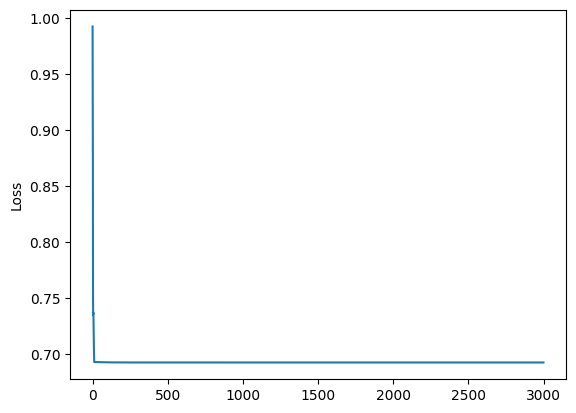

In [46]:
plt.plot(losses_)
plt.ylabel('Loss')
plt.show()

In [69]:
runner = bp.DSRunner(net, monitors={'r.spike': net.r.spike, 'r.membrane': net.r.V}, data_first_axis='T')
out = runner.run(inputs=x_data, reset_state=True)

Predict 500 steps: : 100%|█████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 1376.39it/s]


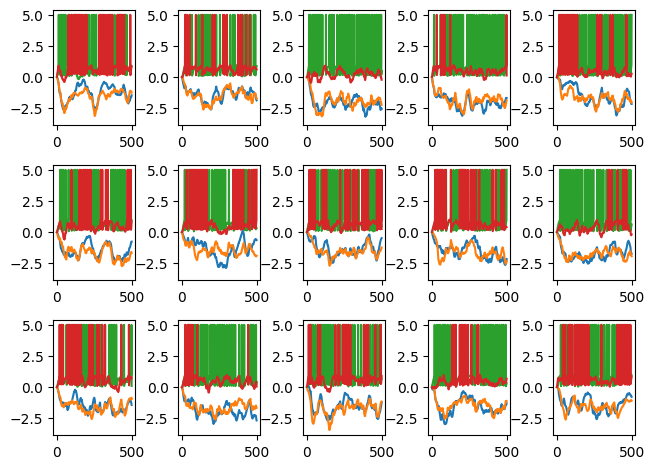

In [54]:
# recurrent membrane potential
plot_voltage_traces(runner.mon['r.membrane'], runner.mon['r.spike'])

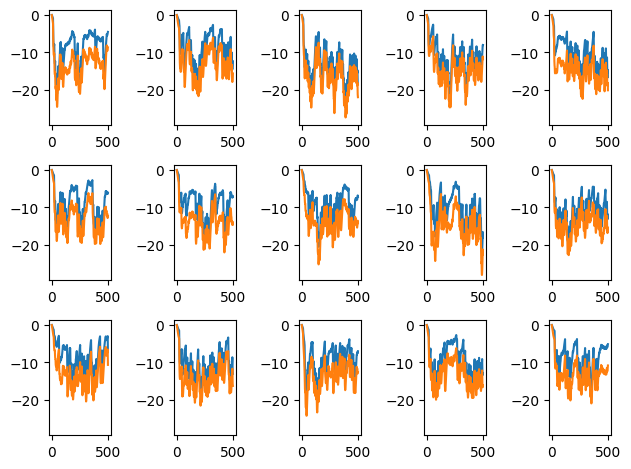

In [55]:
# output activity
plot_voltage_traces(out)

In [70]:
# classification accuracy
print_classification_accuracy(out, y_data)

Accuracy 0.516


##### Fashion MNIST

In [20]:
train_dataset = bd.vision.FashionMNIST("../data", split='train', download=False)
test_dataset = bd.vision.FashionMNIST('../data', split='test', download=False)

In [21]:
# Standardize data
x_train = np.array(train_dataset.data, dtype=bm.float_)
# 将长和宽的维度合并为一个维度
x_train = x_train.reshape(x_train.shape[0], -1) / 255
y_train = np.array(train_dataset.targets, dtype=bm.int_)
x_test = np.array(test_dataset.data, dtype=bm.float_)
x_test = x_test.reshape(x_test.shape[0], -1) / 255
y_test = np.array(test_dataset.targets, dtype=bm.int_)

In [73]:
# 输入就变成了长*宽
num_input = 28 * 28
batch_size = 128

In [74]:
with bm.environment(bm.TrainingMode(batch_size=batch_size)):
    net2 = SNN(num_in=num_input, num_rec=100, num_out=10, scale=10.)

D:\software\anaconda\envs\my_brainpy\Lib\site-packages\brainpy\_src\deprecations.py:89: DeprecationWarning: brainpy.dyn.ProjAlignPostMg1 is deprecated. Use brainpy.dyn.HalfProjAlignPostMg instead.
  _deprecate(message)
D:\software\anaconda\envs\my_brainpy\Lib\site-packages\brainpy\_src\deprecations.py:89: DeprecationWarning: brainpy.dyn.ProjAlignPostMg1 is deprecated. Use brainpy.dyn.HalfProjAlignPostMg instead.
  _deprecate(message)


In [31]:
# 延迟编码函数，默认使用tau代替生成的时间步长，当给定时间步长时，则使用给定的
encoder = bp.encoding.LatencyEncoder(tau=20., threshold=0.2, method='log')
# X = bm.random.random([256,10])
# encoder.multi_steps( X, n_time = 100).shape

(100, 256, 10)

In [76]:
class Data2:
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def __call__(self):
        for i in range(0, self.X.shape[0], batch_size):
            X = self.X[i: i + batch_size]
            Y = self.Y[i: i + batch_size]
            yield encoder.multi_steps(X), bm.asarray(Y)

    def get_batch(self, i=0):
        X = self.X[i: i + batch_size]
        Y = self.Y[i: i + batch_size]
        return encoder.multi_steps(X), bm.asarray(Y)

In [77]:
trainer = Trainer(net=net2, opt=bp.optim.Adam(lr=2e-3), data=Data2(x_train, y_train))
losses_ = trainer.f_train()

Train 0 epoch, loss = 0.9672, used time 36.4834 s
Train 1 epoch, loss = 0.6247, used time 41.5486 s
Train 2 epoch, loss = 0.5630, used time 39.7206 s
Train 3 epoch, loss = 0.5164, used time 38.3510 s
Train 4 epoch, loss = 0.4848, used time 33.4126 s
Train 5 epoch, loss = 0.4636, used time 35.1174 s
Train 6 epoch, loss = 0.4431, used time 38.2839 s
Train 7 epoch, loss = 0.4287, used time 40.4155 s
Train 8 epoch, loss = 0.4170, used time 43.0203 s
Train 9 epoch, loss = 0.4017, used time 43.6112 s
Train 10 epoch, loss = 0.3929, used time 42.7626 s
Train 11 epoch, loss = 0.3850, used time 42.8098 s
Train 12 epoch, loss = 0.3725, used time 43.3309 s
Train 13 epoch, loss = 0.3672, used time 43.1848 s
Train 14 epoch, loss = 0.3582, used time 43.2371 s
Train 15 epoch, loss = 0.3543, used time 43.2779 s
Train 16 epoch, loss = 0.3450, used time 43.2551 s
Train 17 epoch, loss = 0.3380, used time 43.2700 s
Train 18 epoch, loss = 0.3327, used time 44.0247 s
Train 19 epoch, loss = 0.3295, used time 

In [78]:
# 对于最后一个不满足batch_size的批次来说，这种求解准确率的方式有偏差。
def compute_classification_accuracy(model, x_data, y_data):
    """ Computes classification accuracy on supplied data in batches. """

    @bm.jit
    def f(X, Y):
        model.reset(X.shape[1])
        output = bm.for_loop(model.step_run, (np.arange(X.shape[0]), X))
        m = bm.max(output, 0)  # max over time
        am = bm.argmax(m, 1)  # argmax over output units
        tmp = bm.mean(Y == am)  # compare to labels
        return tmp

    accs = []
    for X, Y in Data2(x_data, y_data)():
        accs.append(f(X, Y))
    return np.mean(np.asarray(accs))

In [79]:
print("Training accuracy: %.3f" % (compute_classification_accuracy(net2, x_train, y_train)))
print("Test accuracy: %.3f" % (compute_classification_accuracy(net2, x_test, y_test)))

Training accuracy: 0.900
Test accuracy: 0.850


##### Visualization

In [ ]:
dataset = Data2(x_train, y_train)

In [ ]:
x_data = dataset.get_batch()[0]

runner = bp.DSRunner(net2, monitors={'r.spike': net2.r.spike, 'r.membrane': net2.r.V}, data_first_axis='T')
out = runner.run(inputs=x_data, reset_state=True)

In [ ]:
# recurrent membrane potential
plot_voltage_traces(runner.mon['r.membrane'], runner.mon['r.spike'])

### E-I_BalancedNetwork

In [6]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

In [2]:
import brainpy as bp
import numpy as np
import brainpy.math as bm
import matplotlib.pyplot as plt

D:\software\anaconda\envs\my_brainpy\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


##### Synapse model

In [10]:
# 基于 align post Exponential synaptic computation
class Exponential(bp.Projection): 
    def __init__(self, pre, post, delay, prob, g_max, tau, E, label=None):
        super().__init__()
        # bp.dyn.ProjAlignPost2 被替换为 bp.dyn.FullProjAlignPost   
        self.pron = bp.dyn.FullProjAlignPost(
          pre=pre,
          delay=delay,
          comm=bp.dnn.EventCSRLinear(bp.conn.FixedProb(prob, pre=pre.num, post=post.num), g_max), # 随机连接
          syn=bp.dyn.Expon(size=post.num, tau=tau),# Exponential synapse
          out=bp.dyn.COBA(E=E), # COBA network
          post=post,
          out_label=label
        )

In [11]:
# 构建 E-I Balanced Network
class EINet(bp.DynamicalSystem):
    def __init__(self, ne=3200, ni=800):
        super().__init__()

        # bp.neurons.LIF()
        self.E = bp.dyn.LifRef(ne, V_rest=-60., V_th=-50., V_reset=-60., tau=20., tau_ref=5.,
                               V_initializer=bp.init.Normal(-55., 2.))
        #### TO DO!!!对照兴奋性神经元群体组写抑制性神经元群体
        self.I = bp.dyn.LifRef(ni, V_rest=-60., V_th=-50., V_reset=-60., tau=20., tau_ref=5.,
                               V_initializer=bp.init.Normal(-55., 2.))

        #### TO DO!!!E2E，E2I，I2E，I2I Exponential synaptic computation
        # delay=0,prob=0.02, g_max_E=0.6, g_max_I=6.7, tau_E=5, tua_I=10,
        # reversal potentials E_E=0, I_E=-80, label=EE,EI,IE,II
        self.E2E = Exponential(self.E, self.E, 0., 0.02, 0.6, 5., 0., 'EE')
        self.E2I = Exponential(self.E, self.I, 0., 0.02, 0.6, 5., 0., 'EI')
        self.I2E = Exponential(self.I, self.E, 0., 0.02, 6.7, 10., -80., 'IE')
        self.I2I = Exponential(self.I, self.I, 0., 0.02, 6.7, 10., -80., 'II')

    def update(self, inp=0.):
        #### TO DO!!!更新突触传入电流
        self.E2E()
        self.E2I()
        self.I2E()
        self.I2I()
        ### TO DO!!!更新神经元群体
        self.E(inp)
        self.I(inp)

        # 记录需要 monitor的变量
        E_E_inp = self.E.sum_inputs(self.E.V, label='EE')  # E2E的输入
        I_E_inp = self.E.sum_inputs(self.E.V, label='IE')  # I2E的输入
        return self.E.spike, self.I.spike, E_E_inp, I_E_inp

Predict 1000 steps: : 100%|██████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1378.65it/s]


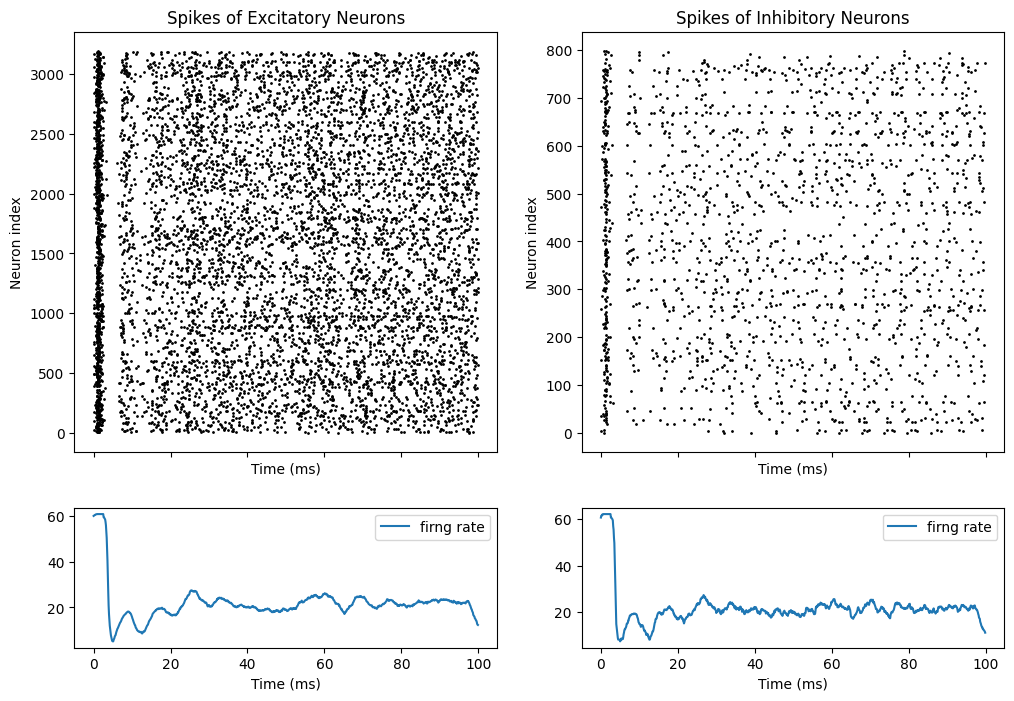

In [12]:
# 数值模拟
model = EINet(ne=3200, ni=800) #实现4000个神经元的E-I模型，其中E：I=4:1
runner = bp.DSRunner(model)
inputs = np.ones(1000) * 20.  # 100 ms
e_sps, i_sps, ee_inps, ie_inps = runner.run(inputs=inputs)

# 可视化
# 兴奋性脉冲发放
fig, gs = plt.subplots(2,2,gridspec_kw={'height_ratios': [3, 1]}, figsize=(12, 8), sharex='all')
plt.sca(gs[0,0])
bp.visualize.raster_plot(runner.mon['ts'], e_sps, title= 'Spikes of Excitatory Neurons')
plt.sca(gs[0,1])
# 抑制性脉冲发放
bp.visualize.raster_plot(runner.mon['ts'], i_sps, title= 'Spikes of Inhibitory Neurons')

# 平均发放速率
plt.sca(gs[1,0])
rate_e = bp.measure.firing_rate(e_sps, 5.)
bp.visualize.line_plot(runner.mon['ts'], rate_e, legend='firng rate')
plt.sca(gs[1,1])
rate_i = bp.measure.firing_rate(i_sps, 5.)
bp.visualize.line_plot(runner.mon['ts'], rate_i, legend='firng rate',show=True)

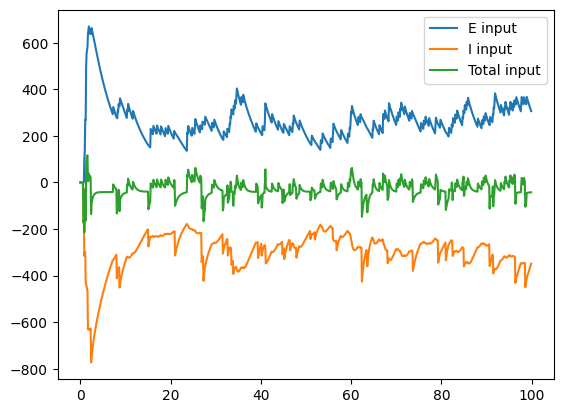

In [13]:
# 画单个神经元收到的兴奋性输入和抑制性输入强度
ind = 170
plt.plot(runner.mon['ts'], ee_inps[:,ind], runner.mon['ts'], ie_inps[:,ind],runner.mon['ts'], ee_inps[:,ind] + ie_inps[:,ind])
plt.legend(['E input','I input','Total input'])

##### Properties of a E-I Balanced Network

Predict 60000 steps: : 100%|███████████████████████████████████████████████████| 60000/60000 [00:28<00:00, 2085.75it/s]


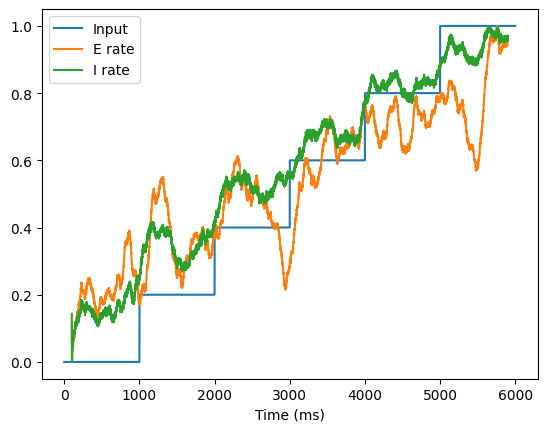

In [14]:
# 构建分段电流
inputs = np.ones(60000)   # 6000 ms
dur_per_I = 10000 # duration = 1000 ms
Is = np.array([20., 40., 60., 80.,100.,120.])
ind_dur = 0
for I in Is:
    inputs[ind_dur:ind_dur+dur_per_I]=inputs[ind_dur:ind_dur+dur_per_I]*I
    ind_dur=ind_dur+dur_per_I

# 运行数值模拟
model = EINet(ne=3200, ni=800)
runner = bp.DSRunner(model)
e_sps, i_sps, ee_inps, ie_inps = runner.run(inputs=inputs)

# 对数据进行最大最小归一化。
def normal(data):
    _rang=np.max(data)-np.min(data)
    return (data-np.min(data))/_rang

bp.visualize.line_plot(runner.mon['ts'], normal(inputs), legend='Input')
rate_e = bp.measure.firing_rate(e_sps, 200.)
bp.visualize.line_plot(runner.mon['ts'][1000:-1000], normal(rate_e[1000:-1000]), legend='E rate')
rate_i = bp.measure.firing_rate(i_sps, 200.)
bp.visualize.line_plot(runner.mon['ts'][1000:-1000], normal(rate_i[1000:-1000]), legend='I rate',show=True)

Predict 60000 steps: : 100%|███████████████████████████████████████████████████| 60000/60000 [00:26<00:00, 2246.35it/s]


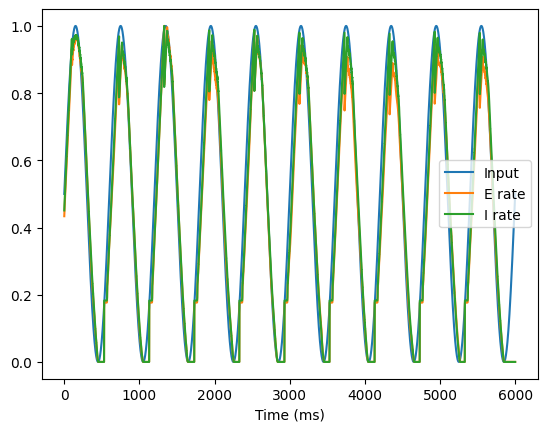

In [18]:
# 构建sin()形式的电流输入
x = np.linspace(0, 20*np.pi, 60000)
inputs = np.sin(x)*100   # 6000 ms


# 运行数值模拟
model = EINet(ne=3200, ni=800)
runner = bp.DSRunner(model)
e_sps, i_sps, ee_inps, ie_inps = runner.run(inputs=inputs)


bp.visualize.line_plot(runner.mon['ts'], normal(inputs), legend='Input')
rate_e = bp.measure.firing_rate(e_sps, 200.)
bp.visualize.line_plot(runner.mon['ts'], normal(rate_e), legend='E rate')
rate_i = bp.measure.firing_rate(i_sps, 200.)
bp.visualize.line_plot(runner.mon['ts'], normal(rate_i), legend='I rate',show=True)

### a_spiking_network_of_decision_making

In [20]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

In [21]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np

import brainpy as bp
import brainpy.math as bm

##### The Cortical Network Model for Decision-Making
The network is composed of N neurons, with NE pyramidal cells (80%) and NI interneurons (20%) (Braitenberg and Schütz 1991).
Simulations reported in here were done with NE = 1600, NI = 400.
Each stimulus activates a distinct and small subpopulation of fNE excitatory cells (f = 0.15).

In [32]:
class AMPA(bp.Projection):
    #  AMPA(self.IA, self.A, 'one2one', None, g_ext2E_AMPA, tau=2., E=0.)
    def __init__(self, pre, post, conn, delay, g_max, tau, E):
        super().__init__()
        if conn == 'all2all':
            comm = bp.dnn.AllToAll(pre.num, post.num, g_max)
        elif conn == 'one2one':
            comm = bp.dnn.OneToOne(pre.num, g_max)
        else:
            raise ValueError
        syn = bp.dyn.Expon.desc(post.num, tau=tau)
        out = bp.dyn.COBA.desc(E=E)
        # bp.dyn.ProjAlignPost2 被替换为 bp.dyn.FullProjAlignPostMg   
        self.proj = bp.dyn.FullProjAlignPostMg(
          pre=pre, delay=delay, comm=comm,
          syn=syn, out=out, post=post
        )

class NMDA(bp.Projection):
    def __init__(self, pre, post, conn, delay, g_max):
        super().__init__()
        if conn == 'all2all':
            comm = bp.dnn.AllToAll(pre.num, post.num, g_max)
        elif conn == 'one2one':
            comm = bp.dnn.OneToOne(pre.num, g_max)
        else:
            raise ValueError
        syn = bp.dyn.NMDA.desc(pre.num, a=0.5, tau_decay=100., tau_rise=2.)
        out = bp.dyn.MgBlock(E=0., cc_Mg=1.0)
        # bp.dyn.ProjAlignPreMg2 替换为 brainpy.dyn.FullProjAlignPreDSMg
        self.proj = bp.dyn.FullProjAlignPreDSMg(
          pre=pre, delay=delay, syn=syn,
          comm=comm, out=out, post=post
        )

In [33]:
class DecisionMakingNet(bp.DynSysGroup):
    def __init__(self, scale=1., f=0.15):
        super().__init__()
        # 网络中各组神经元的数目
        num_exc = int(1600 * scale)
        num_I, num_A, num_B = int(400 * scale), int(f * num_exc), int(f * num_exc)
        num_N = num_exc - num_A - num_B
        self.num_A, self.num_B, self.num_N, self.num_I = num_A, num_B, num_N, num_I

        poisson_freq = 2400.  # Hz
        w_pos = 1.7
        w_neg = 1. - f * (w_pos - 1.) / (1. - f)
        g_ext2E_AMPA = 2.1  # nS
        g_ext2I_AMPA = 1.62  # nS
        g_E2E_AMPA = 0.05 / scale  # nS
        g_E2I_AMPA = 0.04 / scale  # nS
        g_E2E_NMDA = 0.165 / scale  # nS
        g_E2I_NMDA = 0.13 / scale  # nS
        g_I2E_GABAa = 1.3 / scale  # nS
        g_I2I_GABAa = 1.0 / scale  # nS

        neu_par = dict(V_rest=-70., V_reset=-55., V_th=-50., V_initializer=bp.init.OneInit(-70.))

        # E neurons/pyramid neurons
        self.A = bp.dyn.LifRef(num_A, tau=20., R=0.04, tau_ref=2., **neu_par)
        self.B = bp.dyn.LifRef(num_B, tau=20., R=0.04, tau_ref=2., **neu_par)
        self.N = bp.dyn.LifRef(num_N, tau=20., R=0.04, tau_ref=2., **neu_par)

        # I neurons/interneurons
        self.I = bp.dyn.LifRef(num_I, tau=10., R=0.05, tau_ref=1., **neu_par)

        # poisson stimulus  # 'freqs' as bm.Variable
        self.IA = bp.dyn.PoissonGroup(num_A, freqs=bm.Variable(bm.zeros(1)))
        self.IB = bp.dyn.PoissonGroup(num_B, freqs=bm.Variable(bm.zeros(1)))

        # noise neurons
        self.noise_B = bp.dyn.PoissonGroup(num_B, freqs=poisson_freq)
        self.noise_A = bp.dyn.PoissonGroup(num_A, freqs=poisson_freq)
        self.noise_N = bp.dyn.PoissonGroup(num_N, freqs=poisson_freq)
        self.noise_I = bp.dyn.PoissonGroup(num_I, freqs=poisson_freq)

        # define external inputs
        #### TO DO!!!!
        self.IA2A = AMPA(self.IA, self.A, 'one2one', None, g_ext2E_AMPA, tau=2., E=0.)
        self.IB2B = AMPA(self.IB, self.B, 'one2one', None, g_ext2E_AMPA, tau=2., E=0.)

        # define AMPA projections from N
        #### TO DO!!!!
        self.N2B_AMPA = AMPA(self.N, self.B, 'all2all', 0.5, g_E2E_AMPA * w_neg, tau=2., E=0.)
        self.N2A_AMPA = AMPA(self.N, self.A, 'all2all', 0.5, g_E2E_AMPA * w_neg, tau=2., E=0.)
        self.N2N_AMPA = AMPA(self.N, self.N, 'all2all', 0.5, g_E2E_AMPA, tau=2., E=0.)
        self.N2I_AMPA = AMPA(self.N, self.I, 'all2all', 0.5, g_E2I_AMPA, tau=2., E=0.)

        # define NMDA projections from N
        #### TO DO!!!!
        self.N2B_NMDA = NMDA(self.N, self.B, 'all2all', 0.5, g_E2E_NMDA * w_neg)
        self.N2A_NMDA = NMDA(self.N, self.A, 'all2all', 0.5, g_E2E_NMDA * w_neg)
        self.N2N_NMDA = NMDA(self.N, self.N, 'all2all', 0.5, g_E2E_NMDA)
        self.N2I_NMDA = NMDA(self.N, self.I, 'all2all', 0.5, g_E2I_NMDA)

        # define AMPA projections from B
        #### TO DO!!!!
        self.B2B_AMPA = AMPA(self.B, self.B, 'all2all', 0.5, g_E2E_AMPA * w_pos, tau=2., E=0.)
        self.B2A_AMPA = AMPA(self.B, self.A, 'all2all', 0.5, g_E2E_AMPA * w_neg, tau=2., E=0.)
        self.B2N_AMPA = AMPA(self.B, self.N, 'all2all', 0.5, g_E2E_AMPA, tau=2., E=0.)
        self.B2I_AMPA = AMPA(self.B, self.I, 'all2all', 0.5, g_E2I_AMPA, tau=2., E=0.)

        # define NMDA projections from B
        #### TO DO!!!!
        self.B2B_NMDA = NMDA(self.B, self.B, 'all2all', 0.5, g_E2E_NMDA * w_pos)
        self.B2A_NMDA = NMDA(self.B, self.A, 'all2all', 0.5, g_E2E_NMDA * w_neg)
        self.B2N_NMDA = NMDA(self.B, self.N, 'all2all', 0.5, g_E2E_NMDA)
        self.B2I_NMDA = NMDA(self.B, self.I, 'all2all', 0.5, g_E2I_NMDA)

        # define AMPA projections from A
        #### TO DO!!!!
        self.A2B_AMPA = AMPA(self.A, self.B, 'all2all', 0.5, g_E2E_AMPA * w_neg, tau=2., E=0.)
        self.A2A_AMPA = AMPA(self.A, self.A, 'all2all', 0.5, g_E2E_AMPA * w_pos, tau=2., E=0.)
        self.A2N_AMPA = AMPA(self.A, self.N, 'all2all', 0.5, g_E2E_AMPA, tau=2., E=0.)
        self.A2I_AMPA = AMPA(self.A, self.I, 'all2all', 0.5, g_E2I_AMPA, tau=2., E=0.)

        # define NMDA projections from A
        #### TO DO!!!!
        self.A2B_NMDA = NMDA(self.A, self.B, 'all2all', 0.5, g_E2E_NMDA * w_neg)
        self.A2A_NMDA = NMDA(self.A, self.A, 'all2all', 0.5, g_E2E_NMDA * w_pos)
        self.A2N_NMDA = NMDA(self.A, self.N, 'all2all', 0.5, g_E2E_NMDA)
        self.A2I_NMDA = NMDA(self.A, self.I, 'all2all', 0.5, g_E2I_NMDA)

        # define I->E/I conn
        #### TO DO!!!! 用AMPA()
        self.I2B = AMPA(self.I, self.B, 'all2all', 0.5, g_I2E_GABAa, tau=5., E=-70.)
        self.I2A = AMPA(self.I, self.A, 'all2all', 0.5, g_I2E_GABAa, tau=5., E=-70.)
        self.I2N = AMPA(self.I, self.N, 'all2all', 0.5, g_I2E_GABAa, tau=5., E=-70.)
        self.I2I = AMPA(self.I, self.I, 'all2all', 0.5, g_I2I_GABAa, tau=5., E=-70.)

        # define external projections
        #### TO DO!!!!
        self.noise2B = AMPA(self.noise_B, self.B, 'one2one', None, g_ext2E_AMPA, tau=2., E=0.)
        self.noise2A = AMPA(self.noise_A, self.A, 'one2one', None, g_ext2E_AMPA, tau=2., E=0.)
        self.noise2N = AMPA(self.noise_N, self.N, 'one2one', None, g_ext2E_AMPA, tau=2., E=0.)
        self.noise2I = AMPA(self.noise_I, self.I, 'one2one', None, g_ext2I_AMPA, tau=2., E=0.)

In [34]:
class Tool:
    def __init__(self, pre_stimulus_period=100., stimulus_period=1000., delay_period=500.):
        self.pre_stimulus_period = pre_stimulus_period
        self.stimulus_period = stimulus_period
        self.delay_period = delay_period
        self.freq_variance = 10.
        self.freq_interval = 50.
        self.total_period = pre_stimulus_period + stimulus_period + delay_period

    def generate_freqs(self, mean):
        # stimulus period
        n_stim = int(self.stimulus_period / self.freq_interval)
        n_interval = int(self.freq_interval / bm.get_dt())
        freqs_stim = np.random.normal(mean, self.freq_variance, (n_stim, 1))
        freqs_stim = np.tile(freqs_stim, (1, n_interval)).flatten()
        # pre stimulus period
        freqs_pre = np.zeros(int(self.pre_stimulus_period / bm.get_dt()))
        # post stimulus period
        freqs_delay = np.zeros(int(self.delay_period / bm.get_dt()))
        all_freqs = np.concatenate([freqs_pre, freqs_stim, freqs_delay], axis=0)
        return bm.asarray(all_freqs)

    def visualize_results(self, mon, IA_freqs, IB_freqs, t_start=0., title=None):
        fig, gs = bp.visualize.get_figure(4, 1, 3, 10)
        axes = [fig.add_subplot(gs[i, 0]) for i in range(4)]

        ax = axes[0]
        bp.visualize.raster_plot(mon['ts'], mon['A.spike'], markersize=1, ax=ax)
        if title: ax.set_title(title)
        ax.set_ylabel("Group A")
        ax.set_xlim(t_start, self.total_period + 1)
        ax.axvline(self.pre_stimulus_period, linestyle='dashed')
        ax.axvline(self.pre_stimulus_period + self.stimulus_period, linestyle='dashed')
        ax.axvline(self.pre_stimulus_period + self.stimulus_period + self.delay_period, linestyle='dashed')

        ax = axes[1]
        bp.visualize.raster_plot(mon['ts'], mon['B.spike'], markersize=1, ax=ax)
        ax.set_ylabel("Group B")
        ax.set_xlim(t_start, self.total_period + 1)
        ax.axvline(self.pre_stimulus_period, linestyle='dashed')
        ax.axvline(self.pre_stimulus_period + self.stimulus_period, linestyle='dashed')
        ax.axvline(self.pre_stimulus_period + self.stimulus_period + self.delay_period, linestyle='dashed')

        ax = axes[2]
        rateA = bp.measure.firing_rate(mon['A.spike'], width=10.)
        rateB = bp.measure.firing_rate(mon['B.spike'], width=10.)
        ax.plot(mon['ts'], rateA, label="Group A")
        ax.plot(mon['ts'], rateB, label="Group B")
        ax.set_ylabel('Population activity [Hz]')
        ax.set_xlim(t_start, self.total_period + 1)
        ax.axvline(self.pre_stimulus_period, linestyle='dashed')
        ax.axvline(self.pre_stimulus_period + self.stimulus_period, linestyle='dashed')
        ax.axvline(self.pre_stimulus_period + self.stimulus_period + self.delay_period, linestyle='dashed')
        ax.legend()

        ax = axes[3]
        ax.plot(mon['ts'], IA_freqs, label="group A")
        ax.plot(mon['ts'], IB_freqs, label="group B")
        ax.set_ylabel("Input activity [Hz]")
        ax.set_xlim(t_start, self.total_period + 1)
        ax.axvline(self.pre_stimulus_period, linestyle='dashed')
        ax.axvline(self.pre_stimulus_period + self.stimulus_period, linestyle='dashed')
        ax.axvline(self.pre_stimulus_period + self.stimulus_period + self.delay_period, linestyle='dashed')
        ax.legend()
        ax.set_xlabel("Time [ms]")

        plt.show()

Predict 16000 steps: : 100%|███████████████████████████████████████████████████| 16000/16000 [00:04<00:00, 3749.97it/s]


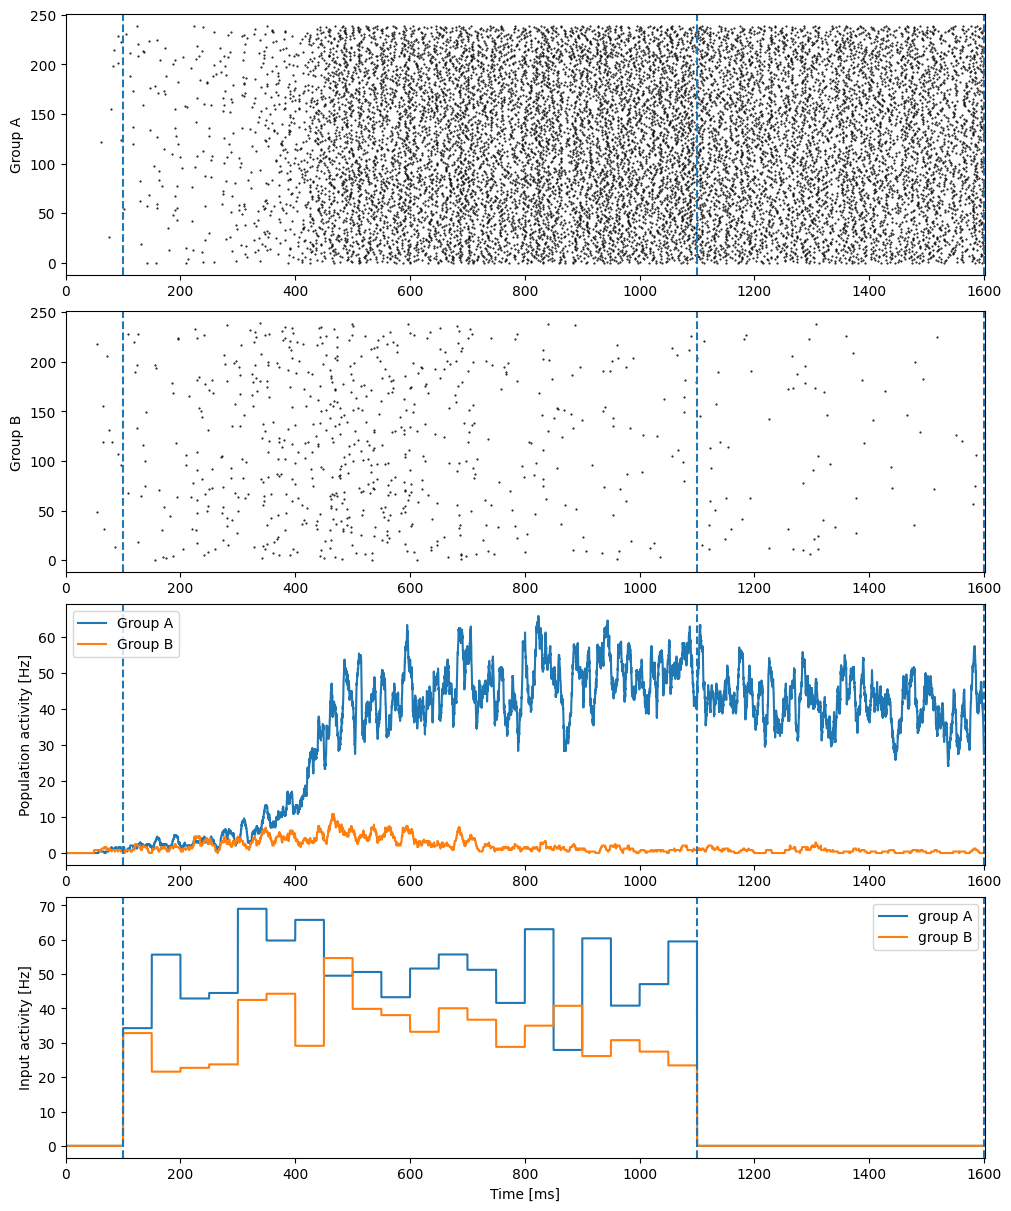

In [35]:
tool = Tool()
net = DecisionMakingNet()

mu0 = 40.
coherence = 25.6
IA_freqs = tool.generate_freqs(mu0 + mu0 / 100. * coherence)
IB_freqs = tool.generate_freqs(mu0 - mu0 / 100. * coherence)

def give_input():
    i = bp.share['i']
    net.IA.freqs[0] = IA_freqs[i]
    net.IB.freqs[0] = IB_freqs[i]

runner = bp.DSRunner(net, inputs=give_input, monitors=['A.spike', 'B.spike'])
runner.run(tool.total_period)
tool.visualize_results(runner.mon, IA_freqs, IB_freqs)

Predict 16000 steps: : 100%|███████████████████████████████████████████████████| 16000/16000 [00:03<00:00, 4761.20it/s]


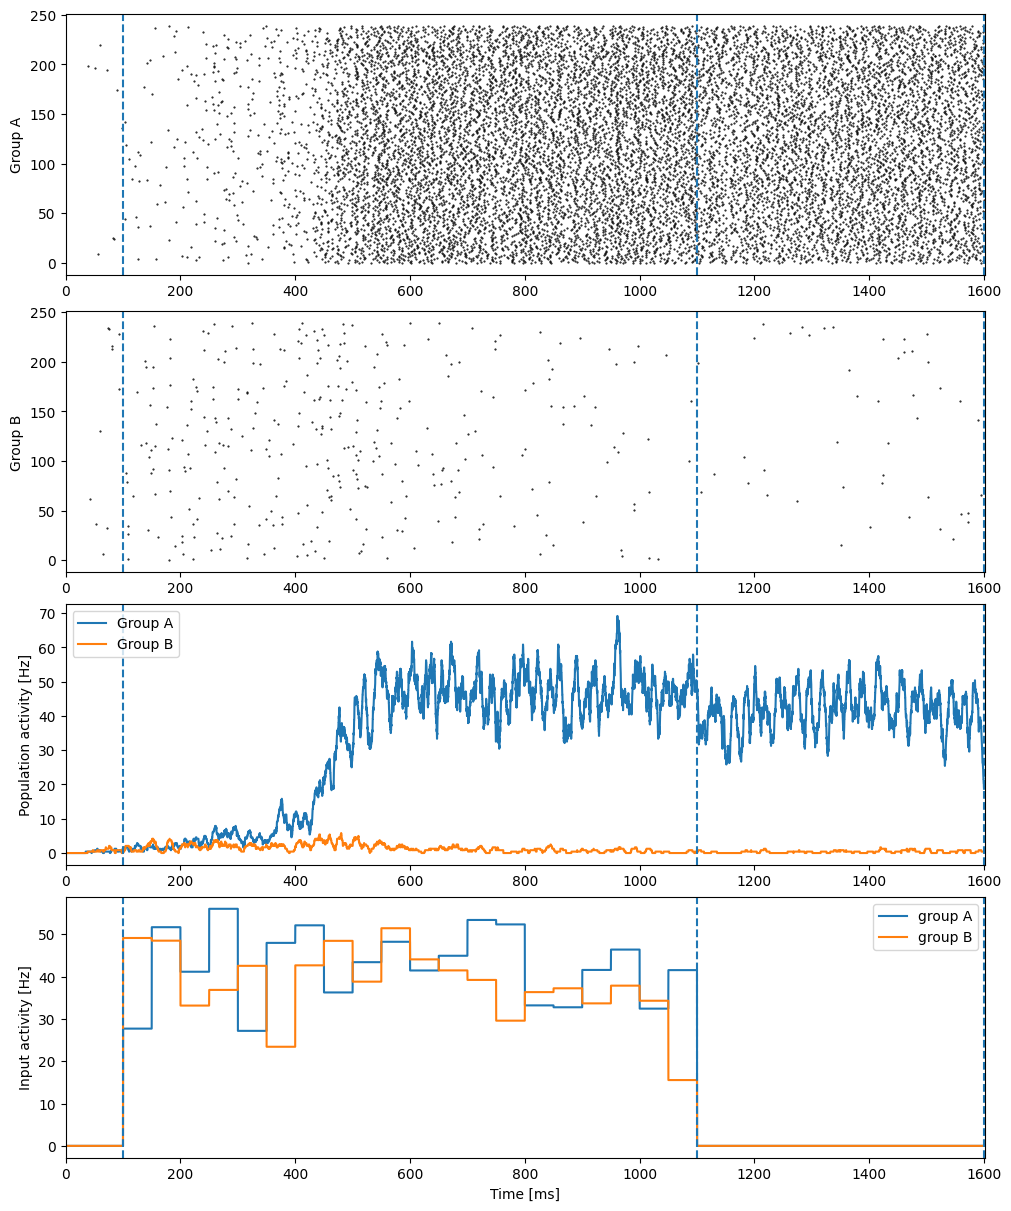

Predict 16000 steps: : 100%|███████████████████████████████████████████████████| 16000/16000 [00:05<00:00, 3048.28it/s]


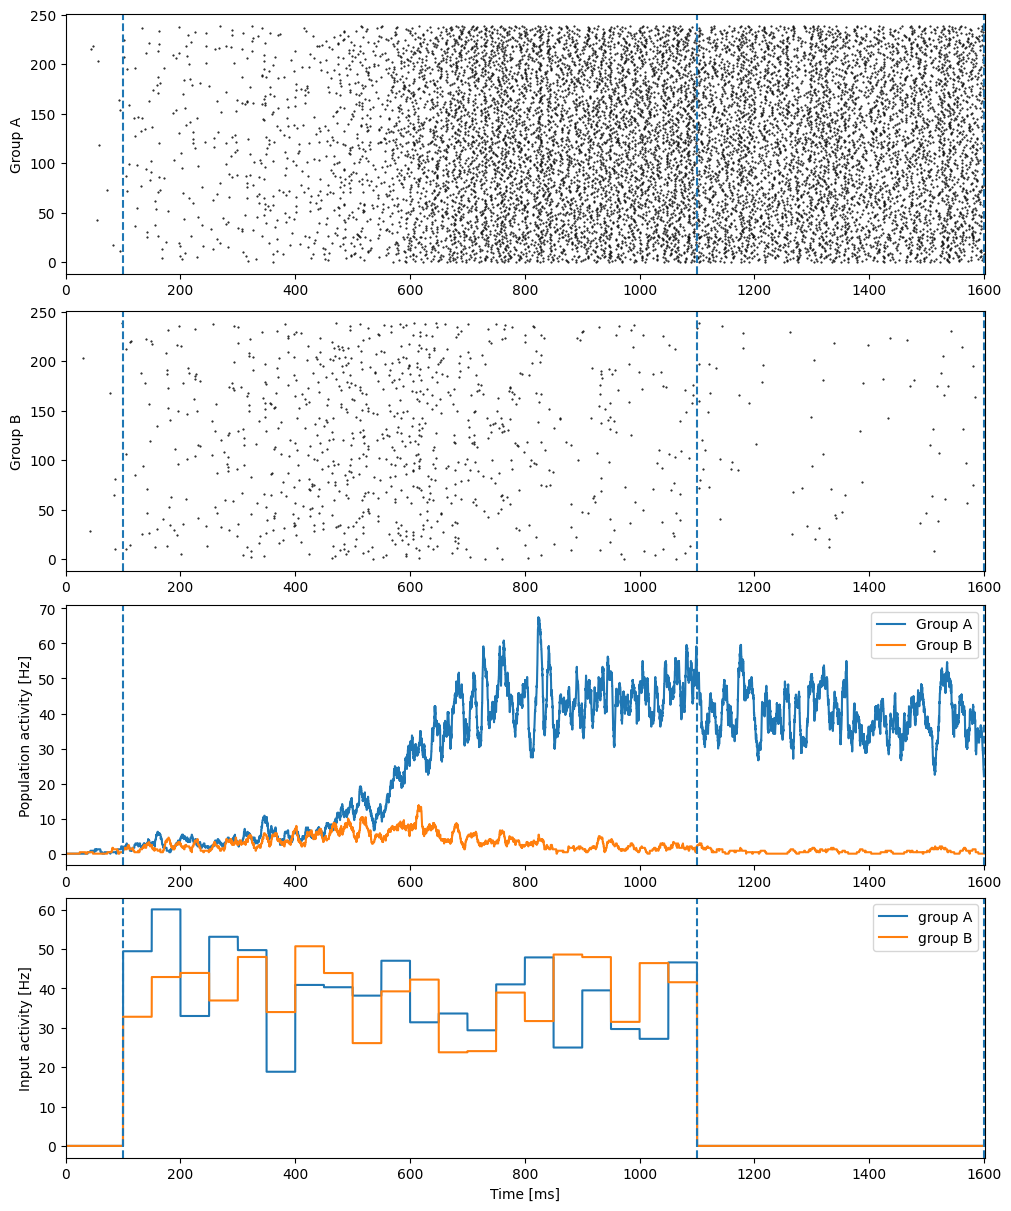

In [44]:
#测试多次随机猜测时候决策网路的表现
tool = Tool()
net = DecisionMakingNet()

mu0 = 40.
coherence = 0.
IA_freqs = tool.generate_freqs(mu0 + mu0 / 100. * coherence)
IB_freqs = tool.generate_freqs(mu0 - mu0 / 100. * coherence)

def give_input():
    i = bp.share['i']
    net.IA.freqs[0] = IA_freqs[i]
    net.IB.freqs[0] = IB_freqs[i]

runner = bp.DSRunner(net, inputs=give_input, monitors=['A.spike', 'B.spike'])
runner.run(tool.total_period)
tool.visualize_results(runner.mon, IA_freqs, IB_freqs)

tool = Tool()
net = DecisionMakingNet()

mu0 = 40.
coherence = 0.
IA_freqs = tool.generate_freqs(mu0 + mu0 / 100. * coherence)
IB_freqs = tool.generate_freqs(mu0 - mu0 / 100. * coherence)

def give_input():
    i = bp.share['i']
    net.IA.freqs[0] = IA_freqs[i]
    net.IB.freqs[0] = IB_freqs[i]

runner = bp.DSRunner(net, inputs=give_input, monitors=['A.spike', 'B.spike'])
runner.run(tool.total_period)
tool.visualize_results(runner.mon, IA_freqs, IB_freqs)

### Continuous_Attractor_Neural_Network

In [46]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

In [47]:
import brainpy as bp
import brainpy.math as bm
import matplotlib.pyplot as plt

##### 我们将连续吸引子网络定义为一个brainpy.dyn.NeuDyn子类

In [49]:
class CANN1D(bp.dyn.NeuDyn):
    def __init__(self, num, tau=1., k=8.1, a=0.5, A=10., J0=4., z_min=-bm.pi, z_max=bm.pi, **kwargs):
        super().__init__(size=num, **kwargs)

        # 1、初始化参数
        self.tau = tau
        self.k = k
        self.a = a
        self.A = A
        self.J0 = J0

        # 2、初始化特征空间相关参数
        self.z_min = z_min
        self.z_max = z_max
        self.z_range = z_max - z_min
        self.x = bm.linspace(z_min, z_max, num)
        self.rho = num / self.z_range
        self.dx = self.z_range / num

        # 3、初始化变量
        self.u = bm.Variable(bm.zeros(num))
        self.input = bm.Variable(bm.zeros(num))
        self.conn_mat = self.make_conn(self.x)  # 连接矩阵

        # 4、定义积分函数
        self.integral = bp.odeint(self.derivative)

    # 微分方程
    def derivative(self, u, t, Irec, Iext):
        # TODO：定义微分方程？？？
        du = (-u+Irec+Iext) / self.tau
        return du

    # 6、将距离转换到[-z_range/2, z_range/2)之间 距离计算出来应该是正值，超过这个区间，就减去z_range
    def dist(self, d):
        d = bm.remainder(d, self.z_range)
        # TODO：实现一维的环的距离度量？？？
        d = bm.where(d > 0.5 * self.z_range, d - self.z_range, d)
        return d

    # 计算连接矩阵
    def make_conn(self, x):
        assert bm.ndim(x) == 1
        d = self.dist(x - x[:, None])  # 距离矩阵
        Jxx = self.J0 * bm.exp(-0.5 * bm.square(d / self.a)) / (bm.sqrt(2 * bm.pi) * self.a) 
        return Jxx

    # 6、获取各个神经元到pos处神经元的输入
    def get_stimulus_by_pos(self, pos):
        return self.A * bm.exp(-0.25 * bm.square(self.dist(self.x - pos) / self.a))

    # 7、网络更新函数
    def update(self, x=None):
        _t = bp.share['t']
        u2 = bm.square(self.u)
        r = u2 / (1.0 + self.k * bm.sum(u2))
        Irec = bm.dot(self.conn_mat, r)
        self.u[:] = self.integral(self.u, _t,Irec, self.input)
        self.input[:] = 0.  # 重置外部电流

##### 1.2 Simulate the persistent activity of CANN after the removal of external input

Predict 220 steps: : 100%|██████████████████████████████████████████████████████████| 220/220 [00:00<00:00, 452.71it/s]


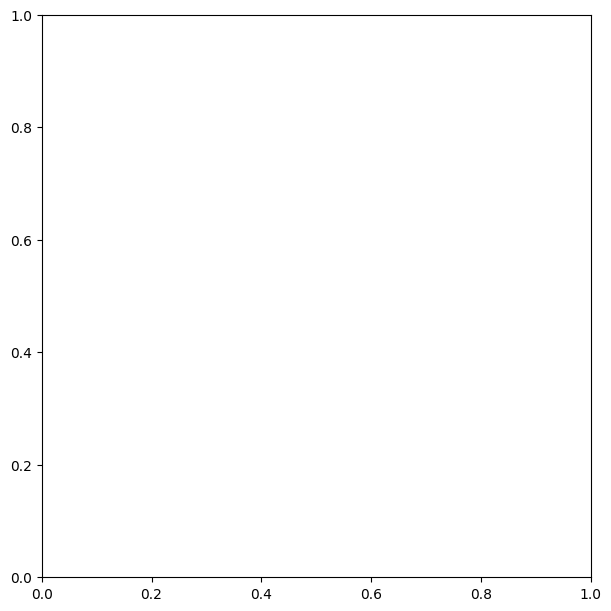

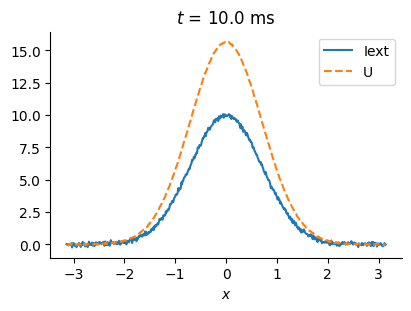

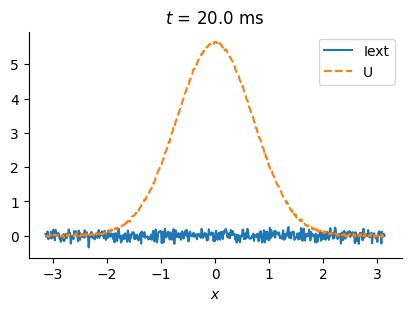

Predict 220 steps: : 100%|█████████████████████████████████████████████████████████| 220/220 [00:00<00:00, 1299.54it/s]


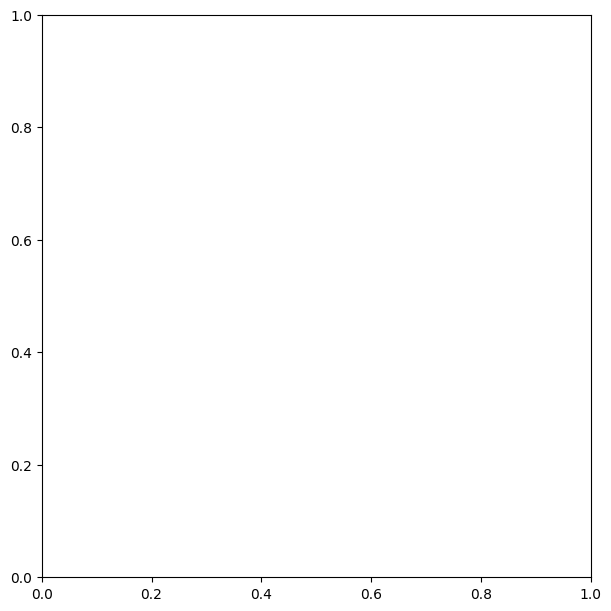

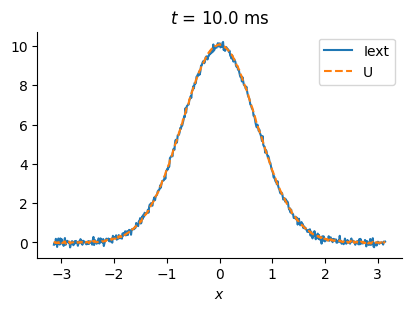

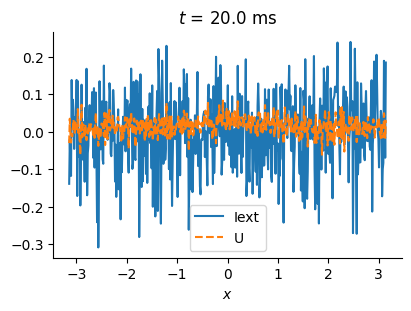

In [64]:
def Persistent_Activity(k=0.1,J0=1.):
    # 初始化一个CANN
    cann = CANN1D(num=512, k=k, J0=J0)

    # 生成外部刺激，从第2到12ms，持续10ms
    dur1, dur2, dur3 = 2., 10., 10.
    I1 = cann.get_stimulus_by_pos(0.)
    Iext, duration = bp.inputs.section_input(values=[0., I1, 0.],
                                             durations=[dur1, dur2, dur3],
                                             return_length=True)
    noise_level = 0.1
    noise = bm.random.normal(0., noise_level, (int(duration / bm.get_dt()), len(I1)))
    Iext += noise

    # TODO：运行数值模拟，监控变量u的历史变化？？
    runner = bp.DSRunner(cann, inputs=['input', Iext, 'iter'], monitors=['u'])
    runner.run(duration)

    # 可视化
    def plot_response(t):
        fig, gs = bp.visualize.get_figure(1, 1, 3, 4)
        ax = fig.add_subplot(gs[0, 0])
        ts = int(t / bm.get_dt())
        I, u = Iext[ts], runner.mon.u[ts]
        ax.plot(cann.x, I, label='Iext')
        ax.plot(cann.x, u, linestyle='dashed', label='U')
        ax.set_title(r'$t$' + ' = {} ms'.format(t))
        ax.set_xlabel(r'$x$')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.legend()
        # plt.savefig(f'CANN_t={t}.pdf', transparent=True, dpi=500)
#     print(runner.mon.u.shape)
#     print(Iext.shape)

    # 此处 bp.visualize.animate_1D 无法正常显示
    bp.visualize.animate_1D(
        dynamical_vars=[{'ys': runner.mon.u, 'xs': cann.x, 'legend': 'u'},
                        {'ys': Iext, 'xs': cann.x, 'legend': 'Iext'}],
        frame_step=10,
        frame_delay=40,
        show=True,
    )
    plot_response(t=10.)
    plot_response(t=20.)

    
    plt.show()


Persistent_Activity(k=0.1)


# TODO: 修改k的参数
Persistent_Activity(k=10)

###### 2 Adaptive Continuous Attractor Neural Network

##### 2.1 Customize a CANN with SFA

In [66]:
import brainpy as bp
import numpy as np
import brainpy.math as bm

class CANN1D_SFA(bp.dyn.NeuDyn):
    def __init__(self, num, m = 0.1, tau=1., tau_v=10., k=8.1, a=0.5, A=10., J0=4.,
               z_min=-bm.pi, z_max=bm.pi, **kwargs):
        super(CANN1D_SFA, self).__init__(size=num, **kwargs)

        # 1、初始化参数
        self.tau = tau
        self.tau_v = tau_v #time constant of SFA
        self.k = k
        self.a = a
        self.A = A
        self.J0 = J0
        self.m = m #SFA strength

        # 2、初始化特征空间相关参数
        self.z_min = z_min
        self.z_max = z_max
        self.z_range = z_max - z_min
        self.x = bm.linspace(z_min, z_max, num)
        self.rho = num / self.z_range
        self.dx = self.z_range / num

        # 3、初始化变量
        self.u = bm.Variable(bm.zeros(num))
        self.v = bm.Variable(bm.zeros(num)) #SFA current
        self.r = bm.Variable(bm.zeros(num)) #SFA current
        self.input = bm.Variable(bm.zeros(num))
        self.conn_mat = self.make_conn(self.x)  # 连接矩阵

        # 4、定义积分函数
        self.integral = bp.odeint(self.derivative)

    # 微分方程
    @property
    def derivative(self):
        du = lambda u, t, I_ext: (-u + bm.matmul(self.conn_mat,self.r) - self.v + I_ext) / self.tau
        dv = lambda v, t: (-v + self.m * self.u) / self.tau_v
        return bp.JointEq([du, dv])

    # 5、将距离转换到[-z_range/2, z_range/2)之间
    def dist(self, d):
        d = bm.remainder(d, self.z_range)
        d = bm.where(d > 0.5 * self.z_range, d - self.z_range, d)
        return d

    # 计算连接矩阵
    def make_conn(self, x):
        assert bm.ndim(x) == 1
        d = self.dist(x - x[:, None])  # 距离矩阵
        Jxx = self.J0 * bm.exp(-0.5 * bm.square(d / self.a)) / (bm.sqrt(2 * bm.pi) * self.a) 
        return Jxx

    # 6、获取各个神经元到pos处神经元的输入
    def get_stimulus_by_pos(self, pos):
        return self.A * bm.exp(-0.25 * bm.square(self.dist(self.x - pos) / self.a))

    # 7、网络更新函数
    def update(self, x=None):
        u2 = bm.square(self.u)
        self.r.value = u2 / (1.0 + self.k * bm.sum(u2))
        u, v = self.integral(self.u, self.v, bp.share['t'], self.input)
        self.u[:] = bm.where(u>0,u,0)
        self.v[:] = v
        self.input[:] = 0.  # 重置外部电流

##### 2.2 Simulate the anticipative tracking

Predict 10100 steps: : 100%|███████████████████████████████████████████████████| 10100/10100 [00:01<00:00, 8761.29it/s]


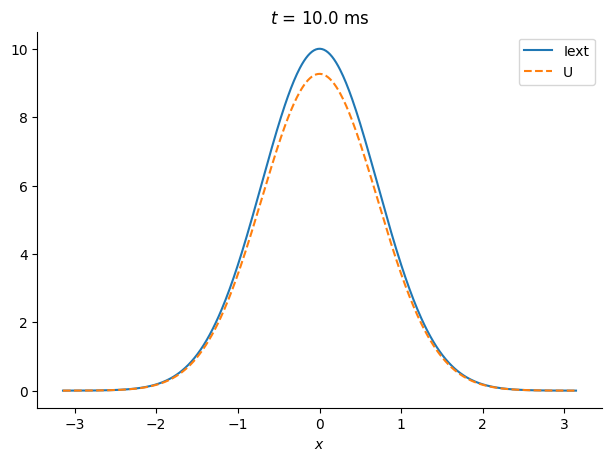

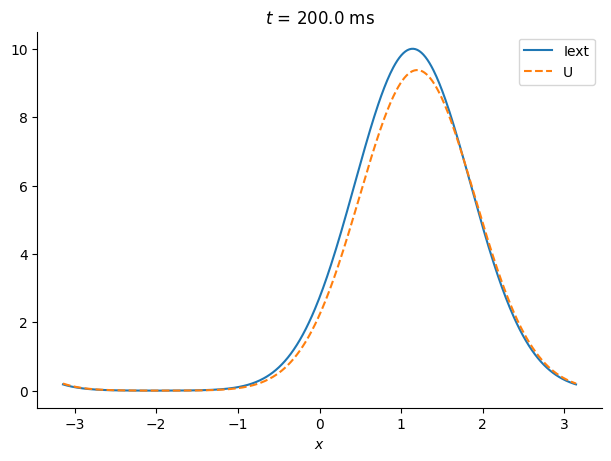

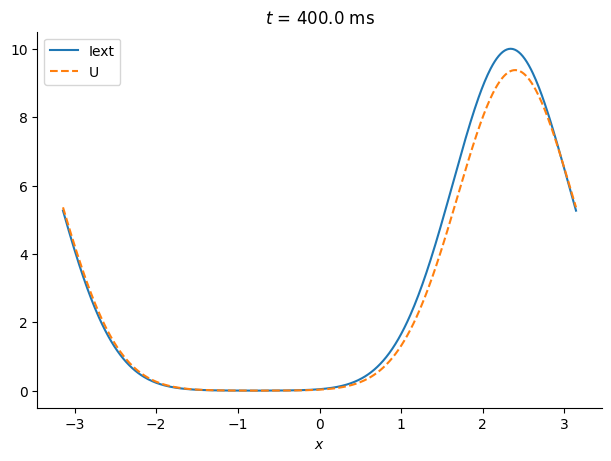

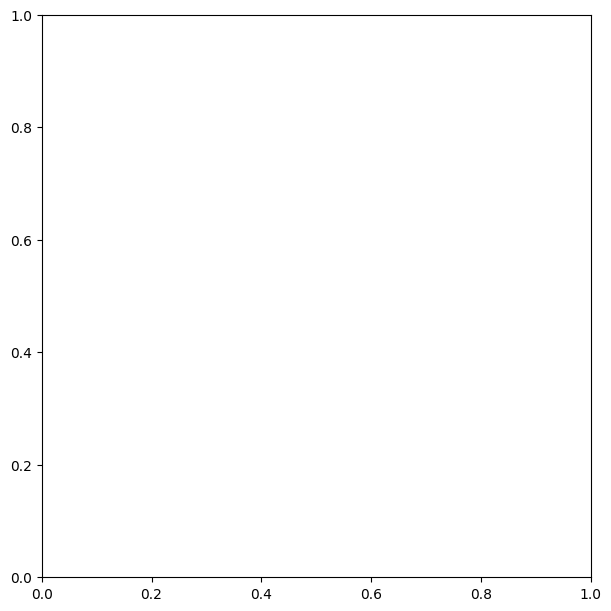

Predict 10100 steps: : 100%|███████████████████████████████████████████████████| 10100/10100 [00:01<00:00, 9109.69it/s]


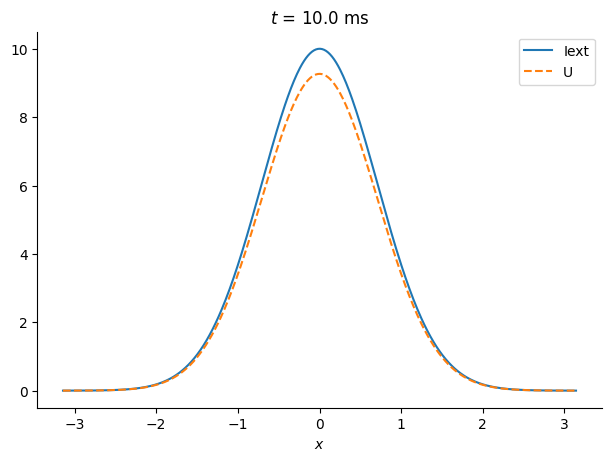

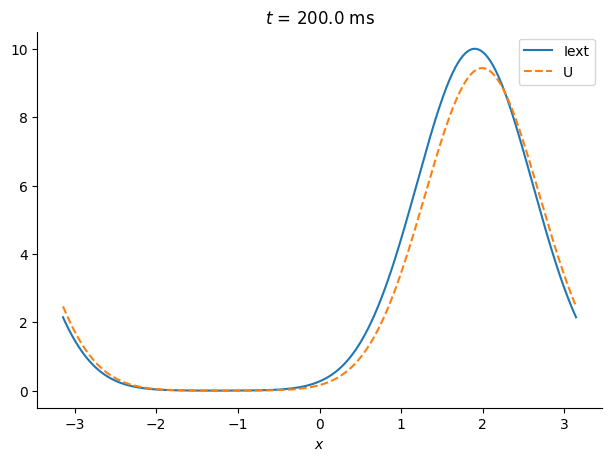

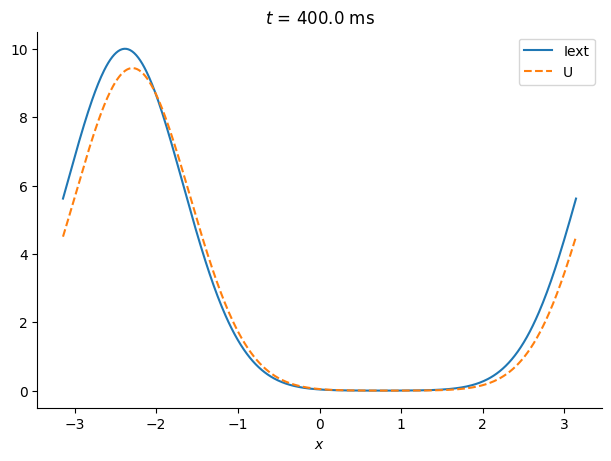

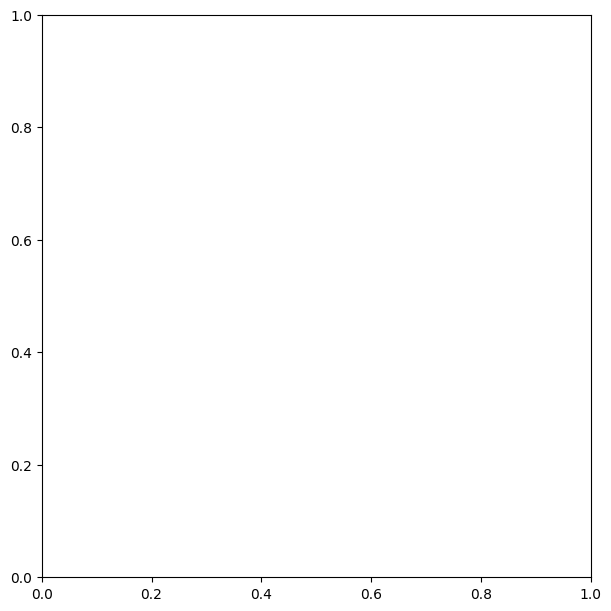

In [67]:
import numpy as np
import matplotlib.pyplot as plt
def anticipative_tracking(m=10,v_ext=6*1e-3):
    cann_sfa = CANN1D_SFA(num=512, m=m)
    
    # 定义随时间变化的外部刺激
    v_ext = v_ext
    dur1, dur2, = 10., 1000.
    num1 = int(dur1 / bm.get_dt())
    num2 = int(dur2 / bm.get_dt())
    position = np.zeros(num1 + num2)
    for i in range(num2):
        pos = position[i+num1-1]+v_ext*bm.dt
        # the periodical boundary
        pos = np.where(pos>np.pi, pos-2*np.pi, pos)
        pos = np.where(pos<-np.pi, pos+2*np.pi, pos)
        # update
        position[i+num1] = pos
    position = position.reshape((-1, 1))
    Iext = cann_sfa.get_stimulus_by_pos(position)

    # TODO：任务1 - 创建DSRunner，运行模拟
    runner=bp.DSRunner(cann_sfa,inputs=['input',Iext,'iter'],monitors=['u','v'],dyn_vars=cann_sfa.vars())
    runner.run(dur1 + dur2)

    # 可视化
    def plot_response(t, extra_fun=None):
        fig, gs = bp.visualize.get_figure(1, 1, 4.5, 6)
        ax = fig.add_subplot(gs[0, 0])
        ts = int(t / bm.get_dt())
        I, u = Iext[ts], runner.mon.u[ts]
        ax.plot(cann_sfa.x, I, label='Iext')
        ax.plot(cann_sfa.x, 10*u, linestyle='dashed', label='U')
        ax.set_title(r'$t$' + ' = {} ms'.format(t))
        ax.set_xlabel(r'$x$')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.legend()

    plot_response(t=10.)
    plot_response(t=200.)
    plot_response(t=400.)
    bp.visualize.animate_1D(
        dynamical_vars=[{'ys': runner.mon.u, 'xs': cann_sfa.x, 'legend': 'u'},
                        {'ys': Iext, 'xs': cann_sfa.x, 'legend': 'Iext'}],
        frame_step=5,
        frame_delay=50,
        show=True,
    )
    plt.show()


anticipative_tracking()

# TODO: 任务2，改变输入移动的快慢
anticipative_tracking(v_ext=10*1e-3)

##### 3 Discussion Homework

You are encouraged to draw upon the principles and mechanisms you've learned about Continuous-Attractor Neural Networks (CANNs) and to propose hypotheses, experimental designs, or model modifications to explore any of the following topics, but not limited to, in greater depth:

Background:

Continuous Attractor Neural Networks (CANNs) are a type of recurrent neural network that can store and retrieve information in a continuous attractor state. This state is a stable pattern of neural activity that can be maintained even without external input. CANNs are thought to underlie a variety of cognitive functions, including memory, decision-making, and attention.

Objectives:

Understand the concept of continuous attractor states in neural networks.

Explore the applications of CANNs in modeling cognitive functions.

Investigate the challenges and potential of CANNs in artificial intelligence.

Discussion Topics:

Working Memory Modeling with CANNs:
Discuss how CANNs can be used to model working memory, the temporary storage system that allows us to keep track of information while using it. Explore how different patterns of neural activity can represent different pieces of information in attractor states.

Decision-Making and CANNs:
Examine how CANNs can be employed to model decision-making processes, where options are weighed and the best one is selected. Consider representing each option as a different attractor state and how the network transitions to the optimal state.

Attention Mechanisms and CANNs:
Investigate how CANNs can model attention, the ability to focus on specific information while ignoring irrelevant details. Discuss how attractor states can represent attended information and how connection strengths can prioritize relevant information.

CANNs in Other Cognitive Functions:
Explore the potential of CANNs in modeling other cognitive functions, such as language processing and motor control. Discuss how CANNs can represent and manipulate linguistic or motor information in attractor states.

CANNs in Artificial Intelligence:
Discuss the potential applications of CANNs in developing new artificial intelligence systems. Consider how CANNs can contribute to AI systems that mimic cognitive functions like memory, decision-making, and attention.

Challenges and Future Directions of CANNs:
Identify the challenges and limitations of developing and applying CANNs in real-world applications. Discuss potential solutions and future research directions to overcome these challenges.

Conclusion:

CANNs offer a promising approach to modeling cognitive functions and developing advanced artificial intelligence systems. By exploring the principles and applications of CANNs, we can gain a deeper understanding of the brain's computational mechanisms and pave the way for innovative AI technologies.

### Continuous Attractor Neural Network with STP

In [68]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

##### 1. Customize a CANN with STP
STP dynamics (modeling the available fraction and release probability of neuro-transmitter)

In [69]:
import brainpy as bp
import brainpy.math as bm
import matplotlib.pyplot as plt

plt.rcParams.update({"font.size": 15})
plt.rcParams['font.sans-serif'] = ['Times New Roman']


class CANN1D_STP(bp.NeuGroupNS):
    def __init__(self, num, tau=1., tau_f=1., tau_d=30., G=0.2, k=8.1, a=0.5, A=10., J0=12.,
               z_min=-bm.pi, z_max=bm.pi, **kwargs):
        super(CANN1D_STP, self).__init__(size=num, **kwargs)

        # 初始化参数
        self.tau = tau
        # TO DO: time constants of f and d
        self.tau_f = tau_f
        self.tau_d = tau_d

        self.G = G
        self.k = k
        self.a = a
        self.A = A
        self.J0 = J0

        # 初始化特征空间相关参数
        self.z_min = z_min
        self.z_max = z_max
        self.z_range = z_max - z_min
        self.x = bm.linspace(z_min, z_max, num)
        self.rho = num / self.z_range
        self.dx = self.z_range / num

        # 初始化变量
        self.u = bm.Variable(bm.zeros(num))
        # TO DO: 初始化 g 和 h
        self.g = bm.Variable(bm.zeros(num)) #neuro-transmitter release probability
        self.h = bm.Variable(bm.ones(num)) #neuro-transmitter available fraction

        self.input = bm.Variable(bm.zeros(num))
        self.conn_mat = self.make_conn(self.x)  # 连接矩阵

        # 定义积分函数
        self.integral = bp.odeint(self.derivative)

    # 根据模型的微分方程构建导数函数
    @property
    def derivative(self):
        du = lambda u, t, Irec, Iext: (-u + Irec + Iext) / self.tau
        dg = lambda g, t, r: (-g / self.tau_f + self.G * (1 - g) * r ) / self.tau
        dh = lambda h, t, g, r:  ((1 - h) / self.tau_d - (g + self.G * (1 - g)) * h *r) / self.tau
        return bp.JointEq([du, dg, dh])

    # 将距离转换到[-z_range/2, z_range/2)之间
    def dist(self, d):
        d = bm.remainder(d, self.z_range)
        d = bm.where(d > 0.5 * self.z_range, d - self.z_range, d)
        return d

    # 计算连接矩阵
    def make_conn(self, x):
        assert bm.ndim(x) == 1
        d = self.dist(x - x[:, None])  # 距离矩阵
        Jxx = self.J0 * bm.exp(
          -0.5 * bm.square(d / self.a)) / (bm.sqrt(2 * bm.pi) * self.a) 
        return Jxx

    # 获取各个神经元到pos处神经元的输入
    def get_stimulus_by_pos(self, pos):
        return self.A * bm.exp(-0.25 * bm.square(self.dist(self.x - pos) / self.a))

    def update(self, x=None):
        u2 = bm.square(self.u)
        r = u2 / (1.0 + self.k * bm.sum(u2)) 
        # TO DO: 计算在引入了STP之后的recurrent input并更新模型状态
        Irec = bm.dot(self.conn_mat, (self.g + self.G * (1 - self.g))*self.h*r)
        u, g, h = self.integral(u=self.u, g=self.g, h=self.h, t=bp.share['t'], Irec=Irec, Iext=self.input, r=r, dt=bm.dt)
        self.u[:] = bm.where(u>0,u,0)
        self.g.value = g
        self.h.value = h
        self.input[:] = 0.  # 重置外部电流

##### 2. Simulate traveling wave in CANN with STP

Predict 10000 steps: : 100%|███████████████████████████████████████████████████| 10000/10000 [00:01<00:00, 7862.10it/s]


44


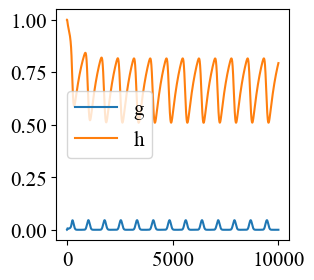

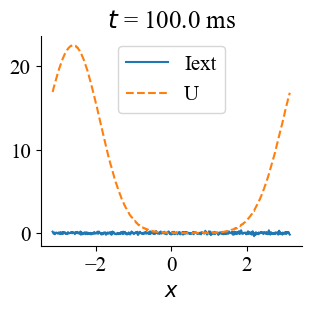

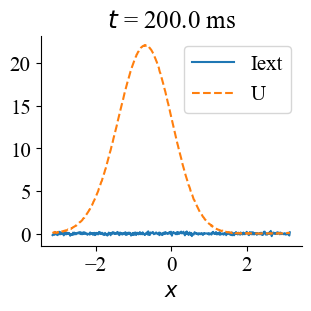

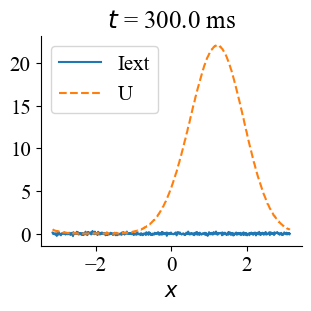

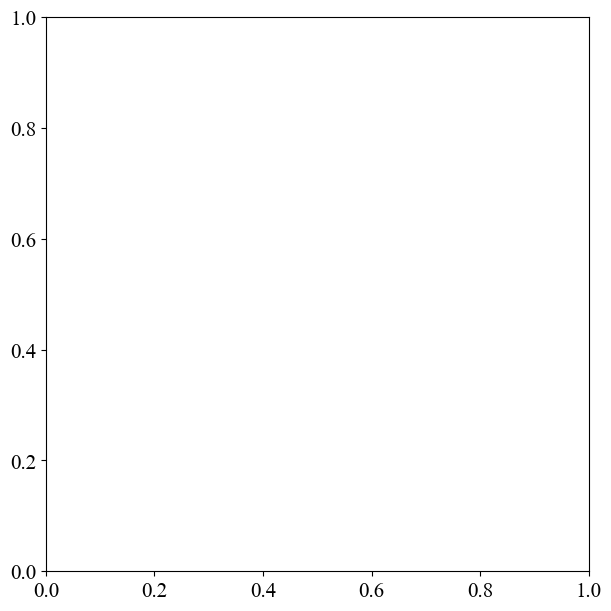

In [72]:
import numpy as np
def traveling_wave_STP(num=512,k=0.1,J0=12.,tau_d=1000,tau_f=1.,G=0.9):
    # 生成CANN
    cann_stp = CANN1D_STP(num=num, k=k,tau_d=tau_d,tau_f=tau_f,G=G, J0=J0)

    # 生成外部刺激
    dur = 1000.
    noise_level = 0.1
    Iext = bm.random.normal(0., noise_level, (int(dur / bm.get_dt()), num))
    duration = dur
    # 运行数值模拟
    runner = bp.DSRunner(cann_stp, inputs=['input', Iext, 'iter'], monitors=['u','g','h'])
    runner.run(duration)
    fig,ax = plt.subplots(figsize=(3,3))
    u = bm.as_numpy(runner.mon.u)
    max_index = np.argmax(u[1000,:])
    print(max_index)
    ax.plot(runner.mon.g[:,max_index],label='g')
    ax.plot(runner.mon.h[:,max_index],label='h')
    ax.legend()
    # 可视化
    def plot_response(t):
        fig, gs = bp.visualize.get_figure(1, 1, 3, 3)
        ax = fig.add_subplot(gs[0, 0])
        ts = int(t / bm.get_dt())
        I, u = Iext[ts], runner.mon.u[ts]
        ax.plot(cann_stp.x, I, label='Iext')
        ax.plot(cann_stp.x, u, linestyle='dashed', label='U')
        ax.set_title(r'$t$' + ' = {} ms'.format(t))
        ax.set_xlabel(r'$x$')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.legend()
    plot_response(t=100.)
    plot_response(t=200.)
    plot_response(t=300.)

    bp.visualize.animate_1D(
        dynamical_vars=[{'ys': runner.mon.u, 'xs': cann_stp.x, 'legend': 'u'},
                        {'ys': Iext, 'xs': cann_stp.x, 'legend': 'Iext'}],
        frame_step=1,
        frame_delay=40,
        show=True,
    )
    plt.show()
    
traveling_wave_STP(G=0.5,tau_d=50)

##### to do: 调整参数，看看什么参数会影响波包是否移动的条件，以及波包移动的速度

Predict 10000 steps: : 100%|███████████████████████████████████████████████████| 10000/10000 [00:01<00:00, 8514.69it/s]


100


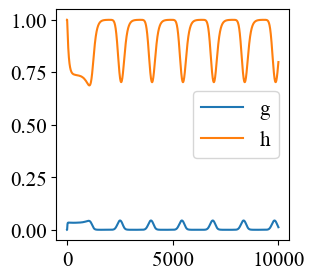

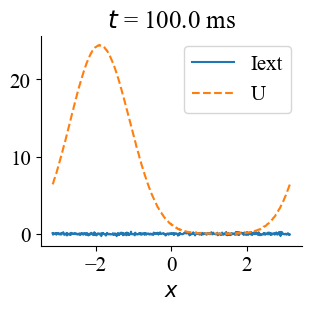

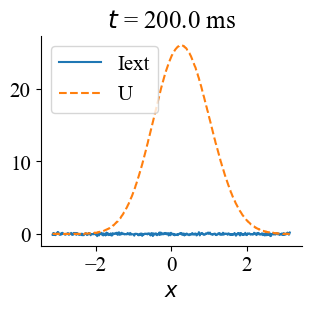

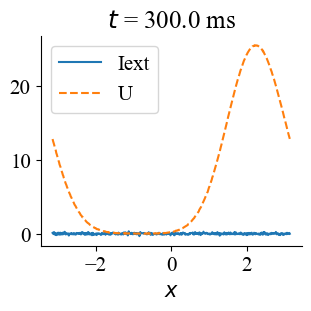

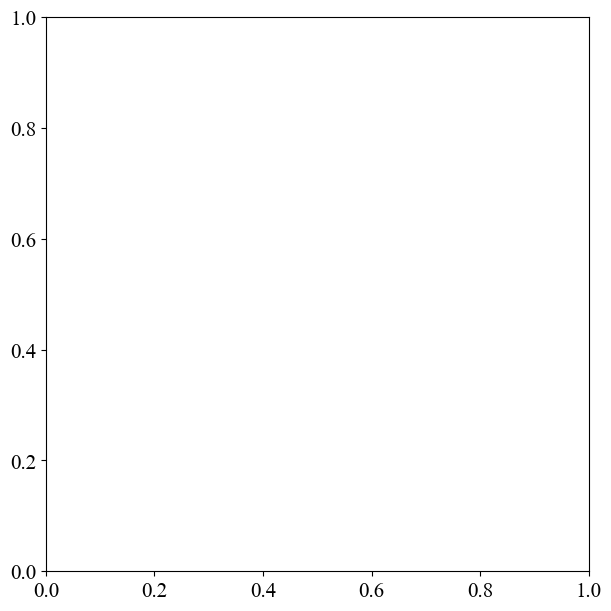

In [89]:
# G越大，波包越密，tau_d越大，
traveling_wave_STP(G=0.5,tau_d=10)

### training RNN

In [91]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

In [90]:
import brainpy as bp
import brainpy.math as bm
import numpy as np
import matplotlib.pyplot as plt
bm.set_platform('cpu')
bp.__version__

'2.6.0'

##### 1. Train an RNN to generate a sequence

<Figure size 1000x500 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'input sequence $x$')

<Axes: >

Text(0.5, 1.0, 'target output sequence $y$')

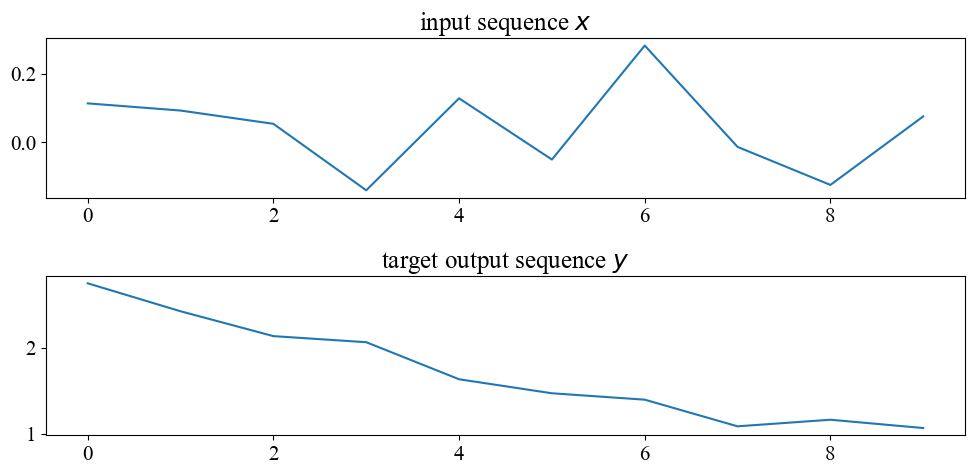

In [92]:
###构造数据，x为给定输入序列，y为想要rnn给出的输出序列，序列长度为T
T = 10
x = bm.random.normal(0,0.1,size=(T,))
y = bm.exp(bm.linspace(1,0,T)) + bm.random.normal(0,0.1,size=(T,))
y0 = y[0]

###可视化输入与输出
plt.figure(figsize=(T,5))
plt.subplot(2,1,1)
plt.plot(bm.arange(T),x)
plt.title('input sequence $x$')
plt.subplot(2,1,2)
plt.plot(bm.arange(T),y)
plt.title('target output sequence $y$')
plt.tight_layout() 
plt.show()

训练前

Predict 10 steps: : 100%|█████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 108.67it/s]


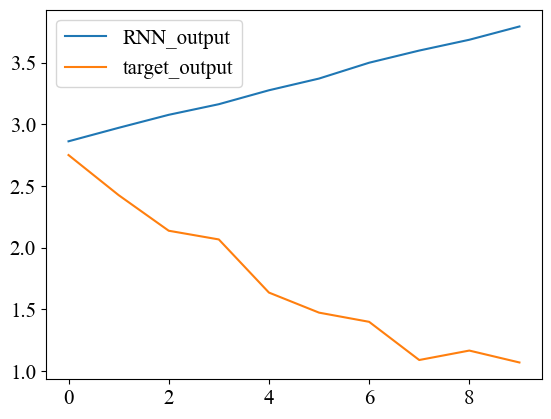

In [93]:
class RNN(bp.DynamicalSystemNS):
    def __init__(self,dt=bm.dt):
        super(RNN, self).__init__(name=None)

        self.r = bm.Variable(bm.zeros(1))
        self.pw = bm.Variable(bm.zeros(1))
        self.pb = bm.Variable(bm.zeros(1))
        
        self.w = bm.Variable(bm.ones(1))
        self.b = bm.Variable(bm.ones(1))
        self.dt = dt

    def reset_neuron(self,y0):
        self.r = bm.Variable(bm.ones(1)*y0)
        self.pw[0].value = 0
        self.pb[0].value = 0

    def update(self,x):
        dr = ((self.w-1)*self.r + self.b + x)*self.dt
        self.r.value = self.r + dr
        
        # 这两行需要写出p_w的计算细节
        dpw = ((self.w-1)*self.pw + self.r)*self.dt
        self.pw.value = self.pw + dpw   
        
        dpb = ((self.w-1)*self.pb + 1)*self.dt
        self.pb.value = self.pb + dpb   
    
    def train(self,r_seq,pw_seq,pb_seq,y):
        eta = 0.1

        #写出dw的更新法则
        dw = -eta*bm.mean((r_seq-y)*pw_seq)
        self.w.value = self.w + dw
        #写出db的更新法则
        db = -eta*bm.mean((r_seq-y)*pb_seq)
        
        self.b.value = self.b + db
        return bm.mean(bm.square((r_seq-y)))/2,dw,db
    
        
rnn = RNN()
rnn.reset_neuron(y0)
runner = bp.DSRunner(rnn, monitors=['r'])
runner.run(inputs = x)
plt.plot(bm.arange(T), bm.squeeze(runner.mon.r),label = 'RNN_output')
plt.plot(bm.arange(T),y,label = 'target_output')
plt.legend()
plt.show()

训练后

Predict 10 steps: : 100%|██████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 95.52it/s]


epoch 0 :loss= 1.6574061 -0.89753276 -0.27346876 w= Variable(value=Array([0.10246724]), dtype=float32)


Predict 10 steps: : 100%|██████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 77.21it/s]


epoch 1 :loss= 0.0802676 -0.13785282 -0.04793979 w= Variable(value=Array([-0.03538558]), dtype=float32)


Predict 10 steps: : 100%|██████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 82.65it/s]


epoch 2 :loss= 0.033676114 -0.04198165 -0.018444212 w= Variable(value=Array([-0.07736723]), dtype=float32)


Predict 10 steps: : 100%|██████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 81.75it/s]


epoch 3 :loss= 0.024715213 -0.022390286 -0.011461964 w= Variable(value=Array([-0.09975751]), dtype=float32)


Predict 10 steps: : 100%|██████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 94.43it/s]


epoch 4 :loss= 0.02083305 -0.015542522 -0.008539113 w= Variable(value=Array([-0.11530004]), dtype=float32)


Predict 10 steps: : 100%|██████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 83.41it/s]


epoch 5 :loss= 0.018517716 -0.011968011 -0.0067912163 w= Variable(value=Array([-0.12726805]), dtype=float32)


Predict 10 steps: : 100%|█████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 103.15it/s]


epoch 6 :loss= 0.016953835 -0.00958209 -0.0055412888 w= Variable(value=Array([-0.13685013]), dtype=float32)


Predict 10 steps: : 100%|██████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 85.87it/s]


epoch 7 :loss= 0.015839847 -0.0077994885 -0.00457802 w= Variable(value=Array([-0.14464962]), dtype=float32)


Predict 10 steps: : 100%|██████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 85.49it/s]


epoch 8 :loss= 0.015023187 -0.00640447 -0.0038119492 w= Variable(value=Array([-0.1510541]), dtype=float32)


Predict 10 steps: : 100%|█████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 110.98it/s]


epoch 9 :loss= 0.01441243 -0.005289216 -0.0031930057 w= Variable(value=Array([-0.15634331]), dtype=float32)


Predict 10 steps: : 100%|██████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 97.11it/s]


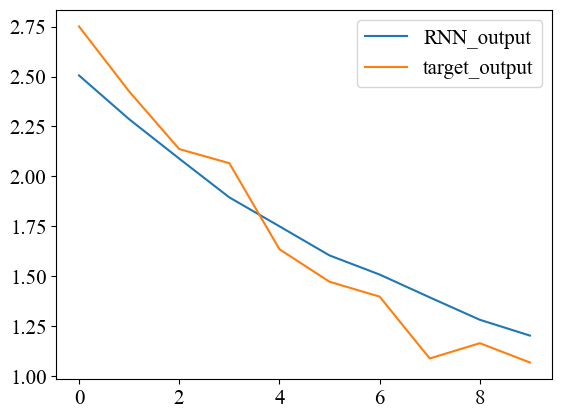

In [94]:
for epoch in range(10):
    rnn.reset_neuron(y0)
    runner = bp.DSRunner(rnn, monitors=['r','pw','pb'])
    runner.run(inputs = x)  
    loss,dw,db = rnn.train(bm.squeeze(runner.mon.r),bm.squeeze(runner.mon.pw),bm.squeeze(runner.mon.pb),y)
    print('epoch',epoch,':loss=',loss,dw,db,'w=',rnn.w,)

rnn.reset_neuron(y0)
runner = bp.DSRunner(rnn, monitors=['r'])
runner.run(inputs = x)
plt.plot(bm.arange(T), bm.squeeze(runner.mon.r),label = 'RNN_output')
plt.plot(bm.arange(T),y,label = 'target_output')
plt.legend()
plt.show()

### Day 6 reservoir 作业

In [1]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

In [2]:
import brainpy as bp
import brainpy.math as bm
import brainpy_datasets as bd
import matplotlib.pyplot as plt

# enable x64 computation
bm.set_environment(x64=True, mode=bm.batching_mode)
bm.set_platform('cpu')

##### Echo State Network

In [3]:
def plot_mackey_glass_series(ts, x_series, x_tau_series, num_sample):
    plt.figure(figsize=(13, 5))

    plt.subplot(121)
    plt.title(f"Timeserie - {num_sample} timesteps")
    plt.plot(ts[:num_sample], x_series[:num_sample], lw=2, color="lightgrey", zorder=0)
    plt.scatter(ts[:num_sample], x_series[:num_sample], c=ts[:num_sample], cmap="viridis", s=6)
    plt.xlabel("$t$")
    plt.ylabel("$P(t)$")

    ax = plt.subplot(122)
    ax.margins(0.05)
    plt.title(f"Phase diagram: $P(t) = f(P(t-\\tau))$")
    plt.plot(x_tau_series[: num_sample], x_series[: num_sample], lw=1, color="lightgrey", zorder=0)
    plt.scatter(x_tau_series[:num_sample], x_series[: num_sample], lw=0.5, c=ts[:num_sample], cmap="viridis", s=6)
    plt.xlabel("$P(t-\\tau)$")
    plt.ylabel("$P(t)$")
    cbar = plt.colorbar()
    cbar.ax.set_ylabel('$t$')

    plt.tight_layout()
    plt.show()

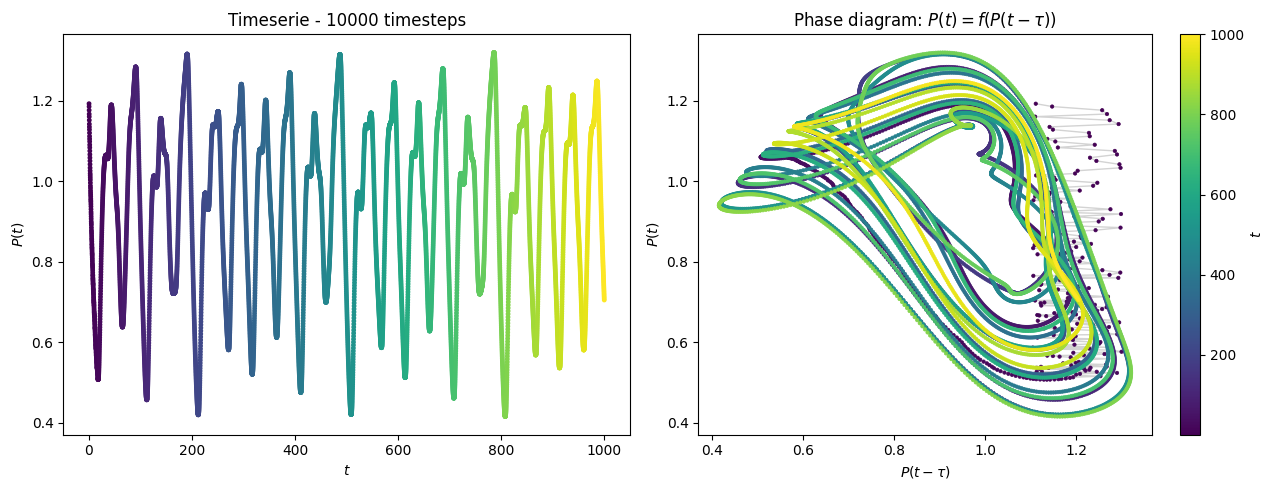

In [4]:
dt = 0.1
# 修改此处的beta=0.2，gamma=0.1,变为较大的值，则生成的数据差异会较大，也就变得难以预测
# mg_data = bd.chaos.MackeyGlassEq(25000, dt=dt, tau=17, beta=2.0, gamma=1.0, n=10)
mg_data = bd.chaos.MackeyGlassEq(25000, dt=dt, tau=17, beta=0.2, gamma=0.1, n=10)
ts = mg_data.ts
xs = mg_data.xs
ys = mg_data.ys

plot_mackey_glass_series(ts, xs, ys, num_sample=int(1000 / dt))

##### Task 1: prediction of Mackey-Glass timeserie
Predict   P(t+1),⋯,P(t+N)  from  P(t).

In [5]:
def get_data(t_warm, t_forcast, t_train, sample_rate=1):
    warmup = int(t_warm / dt)  # warmup the reservoir
    forecast = int(t_forcast / dt)  # predict 10 ms ahead
    train_length = int(t_train / dt)

    X_warm = xs[:warmup:sample_rate]
    X_warm = bm.expand_dims(X_warm, 0)

    X_train = xs[warmup: warmup+train_length: sample_rate]
    X_train = bm.expand_dims(X_train, 0)
    
    # y_train是将x_train往前走了forecast
    Y_train = xs[warmup+forecast: warmup+train_length+forecast: sample_rate]
    Y_train = bm.expand_dims(Y_train, 0)

    X_test = xs[warmup + train_length: -forecast: sample_rate]
    X_test = bm.expand_dims(X_test, 0)

    Y_test = xs[warmup + train_length + forecast::sample_rate]
    Y_test = bm.expand_dims(Y_test, 0)

    return X_warm, X_train, Y_train, X_test, Y_test

In [6]:
# First warmup the reservoir using the first 100 ms
# Then, train the network in 20000 ms to predict 1 ms chaotic series ahead
x_warm, x_train, y_train, x_test, y_test = get_data(100, 1, 20000)

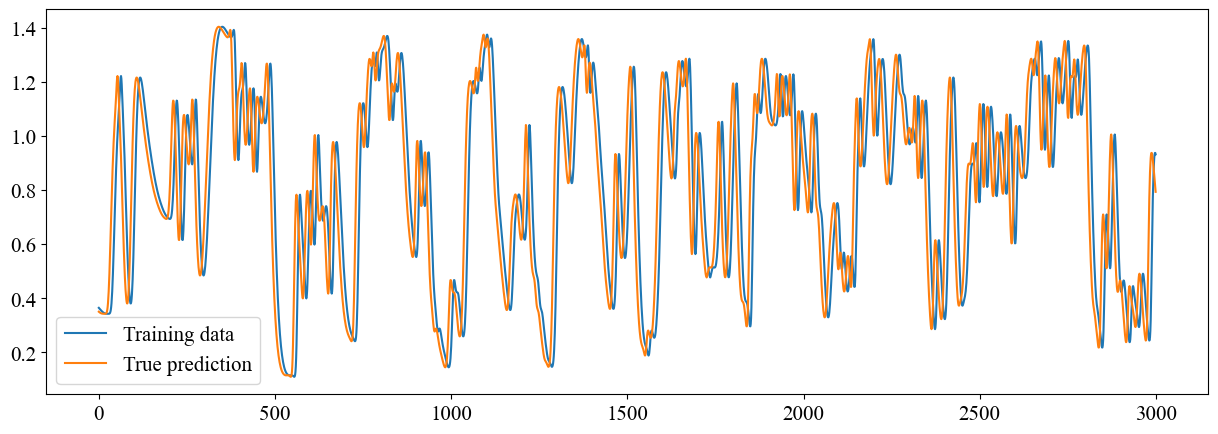

In [139]:
sample = 3000
fig = plt.figure(figsize=(15, 5))
plt.plot(x_train[0, :sample], label="Training data")
plt.plot(y_train[0, :sample], label="True prediction")
plt.legend()
plt.show()

##### Prepare the ESN
Please fill the blanks in the following code:

In [7]:
# Construct the ESN
class ESN(bp.DynamicalSystemNS):
    # E,S,N  spectral radius and simulate
    def __init__(self, num_in, num_hidden, num_out, sr=1., leaky_rate=0.3,
               Win_initializer=bp.init.Uniform(0, 0.2)):
        super(ESN, self).__init__()
        # TODO: complete the reservoir module
        # bp.layers.Reservoir被替换为bp.dyn.Reservoir
        self.r = bp.dyn.Reservoir(
          num_in, num_hidden,
          Win_initializer = Win_initializer,
          spectral_radius = sr,
          leaky_rate = leaky_rate,
        )
        # TODO: complete the readout module
        self.o = bp.layers.Dense(num_hidden, num_out, mode = bm.training_mode)

    def update(self, x):
        # TODO: complete the update function
        return x >> self.r >> self.o


##### Train and test ESN

In [195]:
model = ESN(1, 50, 1)
# model.reset_state(1)
model.reset(1)
# TODO: initialize the trainer, set alpha=1e-6
trainer = bp.RidgeTrainer(model, alpha=1e-6)

In [196]:
# warmup
# TODO: warmup the reservoir
_ = trainer.predict(x_warm)

Predict 1000 steps: : 100%|██████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 4984.94it/s]


In [197]:
# train
# TODO: train the reservoir
_ = trainer.fit([x_train, y_train])

Train 1 nodes: : 100%|███████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.10s/it]


##### Test the training data.

In [143]:
# Test
# TODO: test the reservoir with train data
ys_predict = trainer.predict(x_train)

Predict 200000 steps: : 100%|███████████████████████████████████████████████| 200000/200000 [00:10<00:00, 18397.54it/s]


<Figure size 1500x700 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Mean Square Error: 0.022116968810909073')

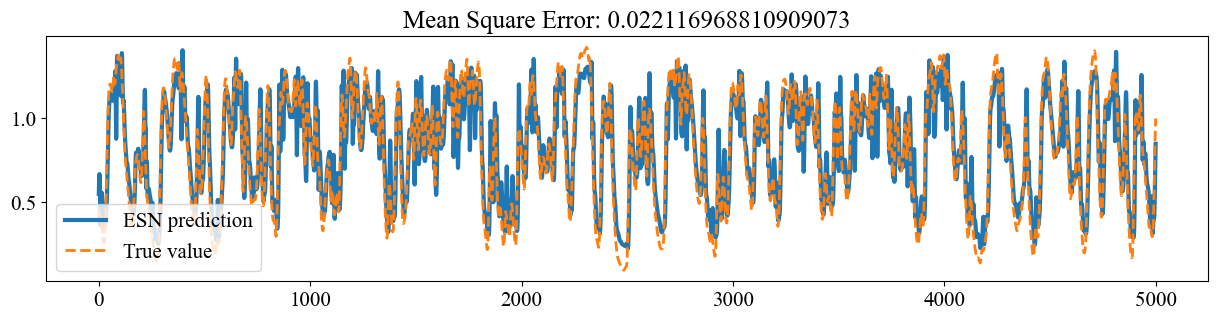

In [144]:
start, end = 1000, 6000
plt.figure(figsize=(15, 7))
plt.subplot(211)
plt.plot(bm.as_numpy(ys_predict)[0, start:end, 0],
         lw=3, label="ESN prediction")
plt.plot(bm.as_numpy(y_train)[0, start:end, 0], linestyle="--",
         lw=2, label="True value")
plt.title(f'Mean Square Error: {bp.losses.mean_squared_error(ys_predict, y_train)}')
plt.legend()
plt.show()

##### Test the testing data

Predict 48990 steps: : 100%|██████████████████████████████████████████████████| 48990/48990 [00:02<00:00, 17300.08it/s]


<Figure size 1500x700 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Mean Square Error: 0.02187920635606481')

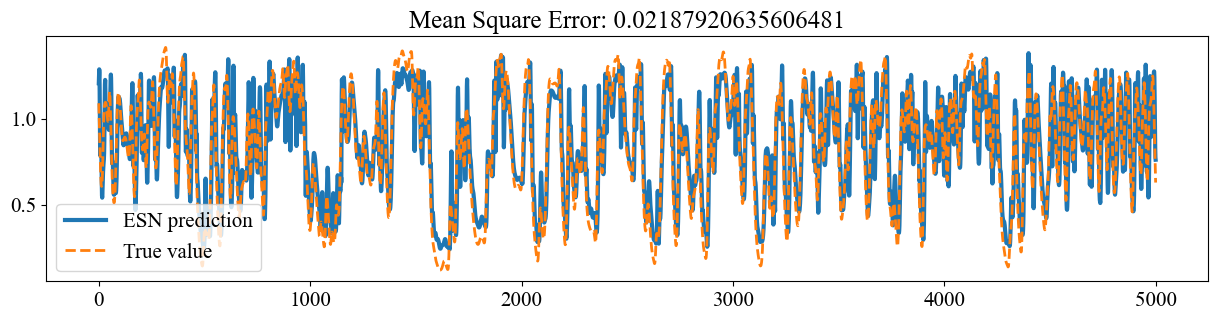

In [145]:
# TODO: test the reservoir with test data
ys_predict = trainer.predict(x_test)

start, end = 1000, 6000
plt.figure(figsize=(15, 7))
plt.subplot(211)
plt.plot(bm.as_numpy(ys_predict)[0, start:end, 0], lw=3, label="ESN prediction")
plt.plot(bm.as_numpy(y_test)[0,start:end, 0], linestyle="--", lw=2, label="True value")
plt.title(f'Mean Square Error: {bp.losses.mean_squared_error(ys_predict, y_test)}')
plt.legend()
plt.show()

##### Make the task harder

In [199]:
# First warmup the reservoir using the first 100 ms
# Then, train the network in 20000 ms to predict 10 ms chaotic series ahead
# 本来是预测1ms,现在预测10ms
x_warm, x_train, y_train, x_test, y_test = get_data(100, 20, 20000)

<Figure size 1500x500 with 0 Axes>

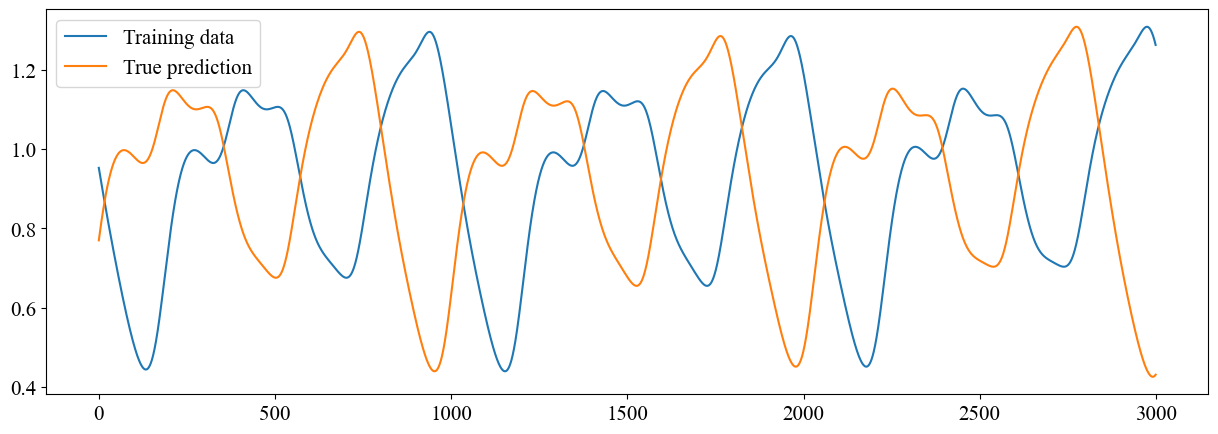

In [200]:
sample = 3000
plt.figure(figsize=(15, 5))
plt.plot(x_train[0, :sample], label="Training data")
plt.plot(y_train[0, :sample], label="True prediction")
plt.legend()
plt.show()

In [201]:
model = ESN(1, 50, 1, sr=1.1)
model.reset(1)
# TODO: initialize the trainer, set alpha=1e-6
trainer = bp.RidgeTrainer(model, alpha=1e-6)

In [202]:
# warmup
# TODO: warmup the reservoir
_ = trainer.predict(x_warm)

# train
# TODO: train the reservoir
_ = trainer.fit([x_train, y_train])

Train 1 nodes: : 100%|███████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.20s/it]


Predict 200000 steps: : 100%|███████████████████████████████████████████████| 200000/200000 [00:09<00:00, 20458.46it/s]


<Figure size 1500x700 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Mean Square Error: 0.0006922635294449654')

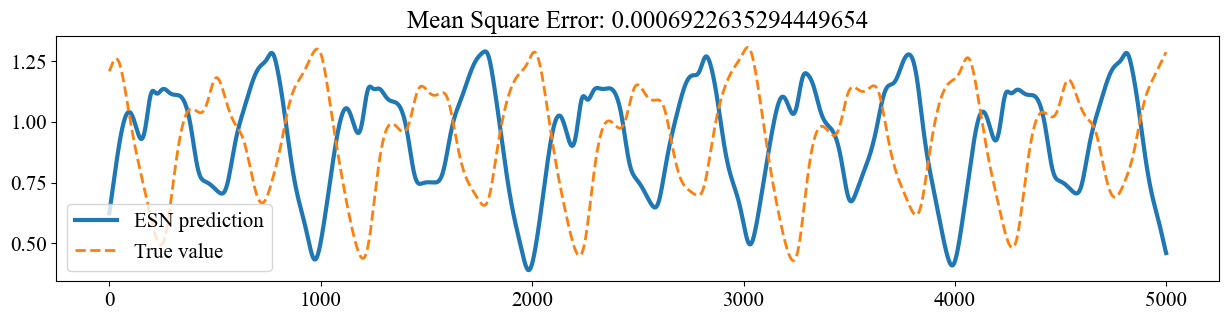

In [203]:
# TODO: test the reservoir with test data
ys_predict = trainer.predict(x_train)

start, end = 1000, 6000
plt.figure(figsize=(15, 7))
plt.subplot(211)
plt.plot(bm.as_numpy(ys_predict)[0, start:end, 0], lw=3, label="ESN prediction")
plt.plot(bm.as_numpy(y_test)[0, start:end, 0], linestyle="--", lw=2, label="True value")
plt.title(f'Mean Square Error: {bp.losses.mean_squared_error(ys_predict, y_train)}')
plt.legend()
plt.show()

Predict 48800 steps: : 100%|██████████████████████████████████████████████████| 48800/48800 [00:02<00:00, 18268.26it/s]


<Figure size 1500x700 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Mean Square Error: 0.0006479336250770881')

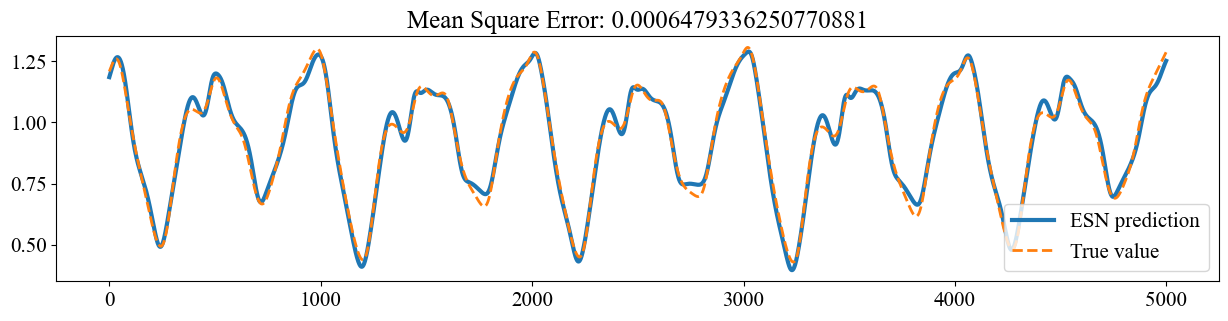

In [204]:
ys_predict = trainer.predict(x_test)

start, end = 1000, 6000
plt.figure(figsize=(15, 7))
plt.subplot(211)
plt.plot(bm.as_numpy(ys_predict)[0, start:end, 0], lw=3, label="ESN prediction")
plt.plot(bm.as_numpy(y_test)[0, start:end, 0], linestyle="--", lw=2, label="True value")
plt.title(f'Mean Square Error: {bp.losses.mean_squared_error(ys_predict, y_test)}')
plt.legend()
plt.show()

##### Diving into the reservoir
Let's have a look at the effect of some of the hyperparameters of the ESN.

##### Spectral radiu


Predict 10000 steps: : 100%|██████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 16143.43it/s]


(1, 10000, 100)



Predict 10000 steps: : 100%|██████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 14115.81it/s]


(1, 10000, 100)



Predict 10000 steps: : 100%|██████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 15193.25it/s]


(1, 10000, 100)



Predict 10000 steps: : 100%|██████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 13743.92it/s]


(1, 10000, 100)



Predict 10000 steps: : 100%|██████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 14227.91it/s]


(1, 10000, 100)


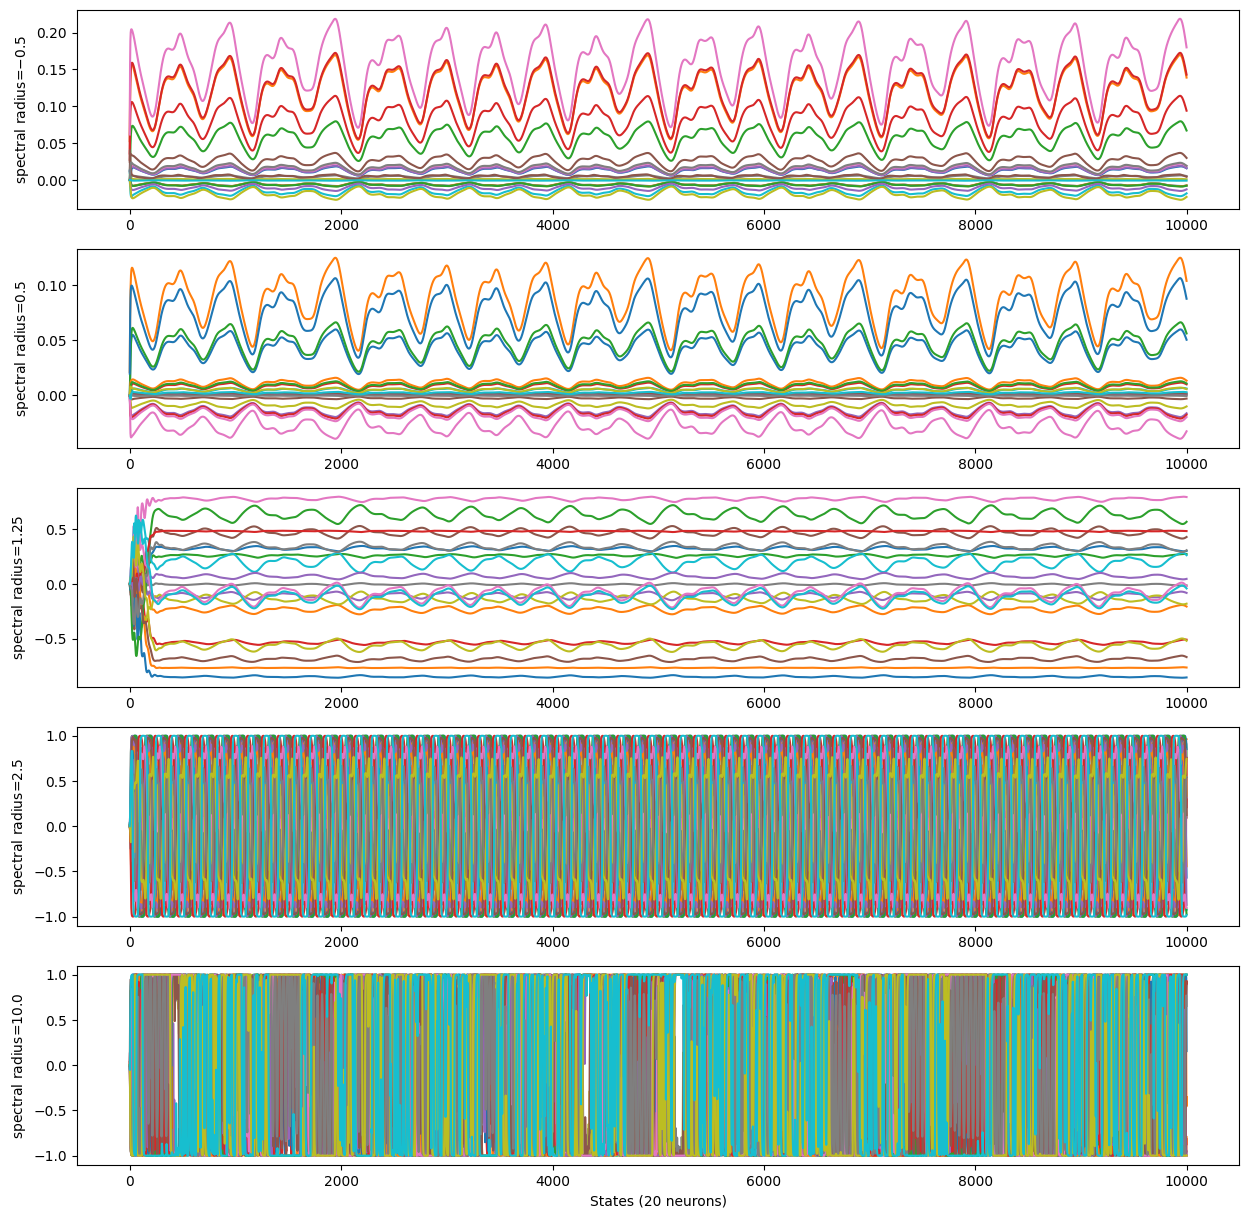

In [18]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "last_expr"

num_sample = 20
all_radius = [-0.5, 0.5, 1.25, 2.5, 10.]

plt.figure(figsize=(15, len(all_radius) * 3))
for i, s in enumerate(all_radius):
    model = ESN(1, 100, 1, sr=s)
    model.reset(1)
    runner = bp.DSTrainer(model, monitors={'state': model.r.state})
    _ = runner.predict(x_test[:, :10000])
    states = bm.as_numpy(runner.mon['state'])
    # states.shape = (1, 10000, 100),可以展示100个图，这里选择展示前20个 隐藏层有100个，选择了20个
#     print(states.shape)
    plt.subplot(len(all_radius), 1, i + 1)
    plt.plot(states[0, :, :num_sample])
    plt.ylabel(f"spectral radius=${all_radius[i]}$")
plt.xlabel(f"States ({num_sample} neurons)")
plt.show()


Predict 10000 steps: : 100%|██████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 15233.29it/s]

Predict 10000 steps: : 100%|██████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 14662.20it/s]

Predict 10000 steps: : 100%|██████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 13710.37it/s]


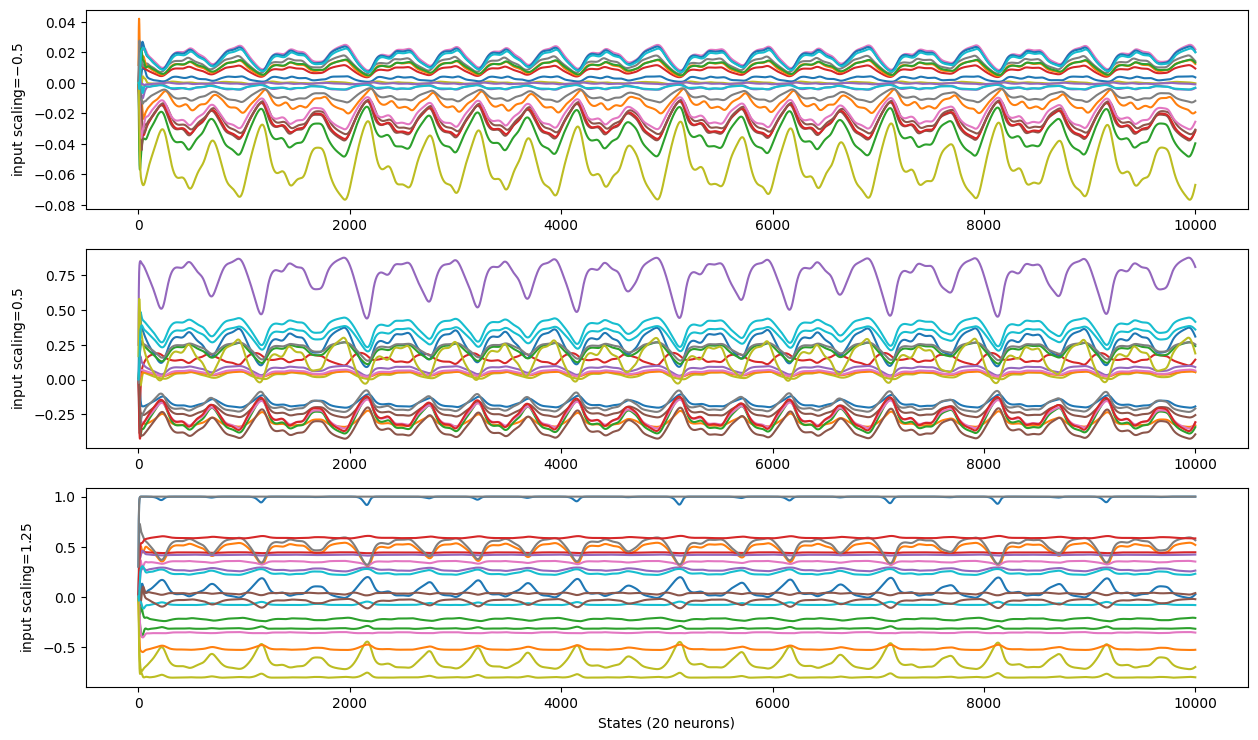

In [15]:
num_sample = 20
all_input_scaling = [0.1, 1.0, 10.0]

plt.figure(figsize=(15, len(all_radius) * 3))
for i, s in enumerate(all_input_scaling):
    # TODO: initialize the ESN with different input scaling and simulate
    model = ESN(1, 100, 1, sr=1., Win_initializer=bp.init.Uniform(max_val=s))
    model.reset(1)
    runner = bp.DSTrainer(model, monitors={"state":model.r.state})
    _ = runner.predict(x_test[:, :10000])
    states = bm.as_numpy(runner.mon['state'])

    plt.subplot(len(all_radius), 1, i + 1)
    plt.plot(states[0, :, :num_sample])
    plt.ylabel(f"input scaling=${all_radius[i]}$")
plt.xlabel(f"States ({num_sample} neurons)")
plt.show()

##### Leaking rate


Predict 10000 steps: : 100%|██████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 12747.00it/s]

Predict 10000 steps: : 100%|██████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 15026.48it/s]

Predict 10000 steps: : 100%|██████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 14447.39it/s]

Predict 10000 steps: : 100%|██████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 14337.86it/s]


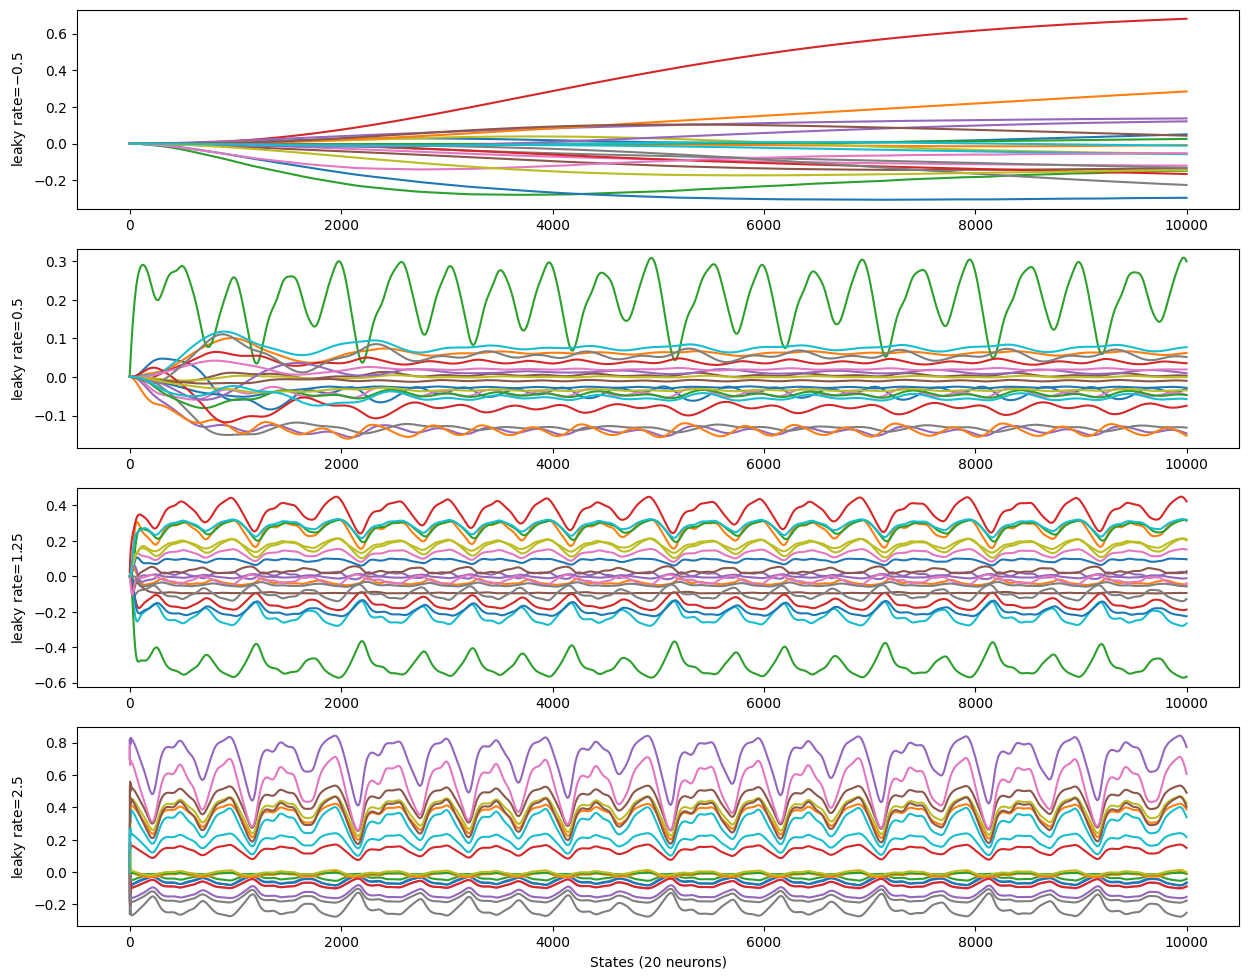

In [16]:
num_sample = 20
all_rates = [0.001, 0.01, 0.1, 1.]

plt.figure(figsize=(15, len(all_radius) * 3))
for i, s in enumerate(all_rates):
    model = ESN(1, 100, 1, sr=1., leaky_rate=s,
              Win_initializer=bp.init.Uniform(max_val=1.), )
    model.reset(1)
    runner = bp.DSTrainer(model, monitors={'state': model.r.state})
    _ = runner.predict(x_test[:, :10000])
    states = bm.as_numpy(runner.mon['state'])

    plt.subplot(len(all_radius), 1, i + 1)
    plt.plot(states[0, :, :num_sample])
    plt.ylabel(f"leaky rate=${all_radius[i]}$")
plt.xlabel(f"States ({num_sample} neurons)")
plt.show()

##### Let's reduce the input influence to see what is happening inside the reservoir (input scaling set to 0.2):


Predict 10000 steps: : 100%|██████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 16224.88it/s]

Predict 10000 steps: : 100%|██████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 13756.43it/s]

Predict 10000 steps: : 100%|██████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 14535.19it/s]

Predict 10000 steps: : 100%|██████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 13573.52it/s]


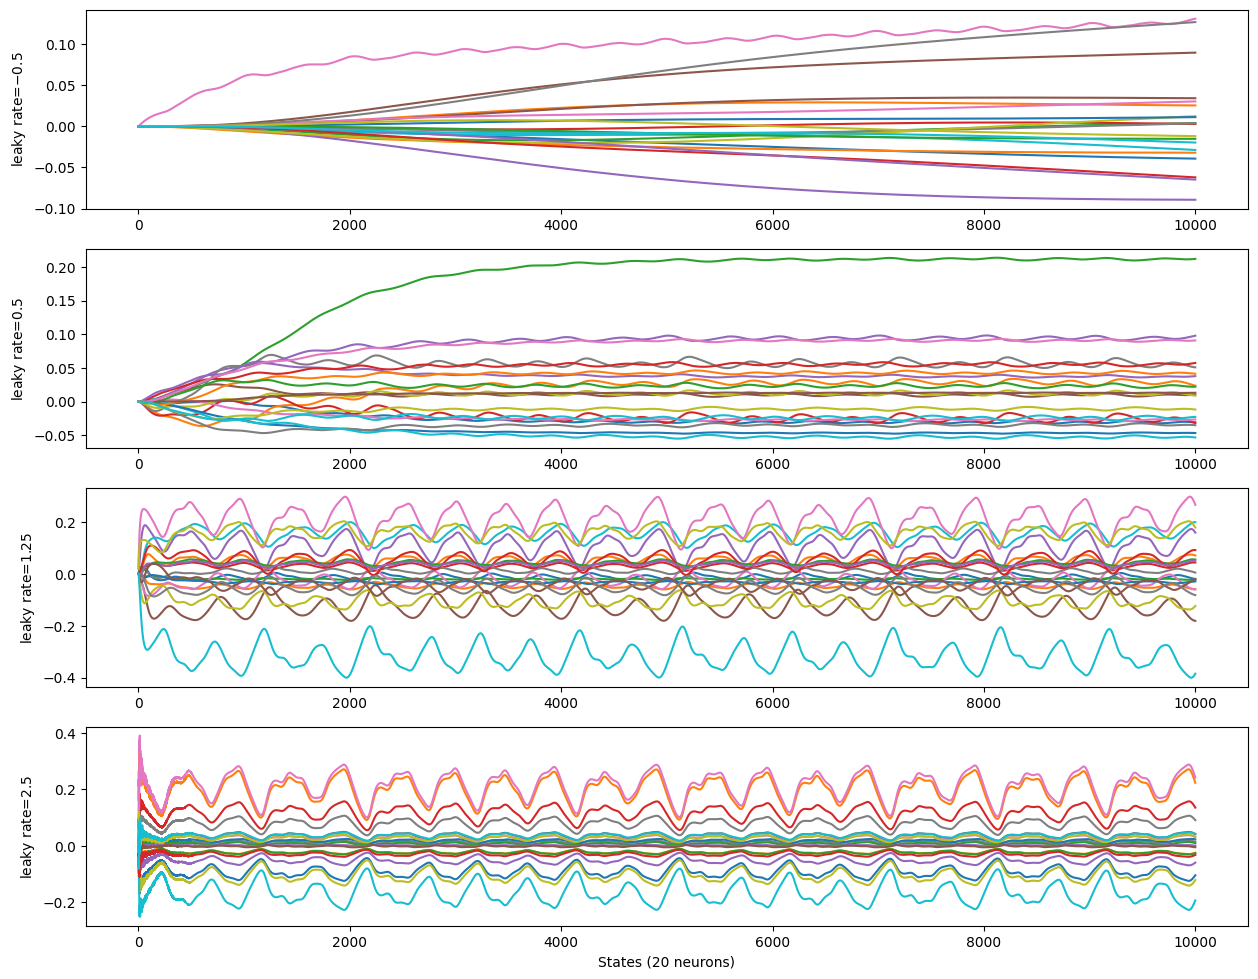

In [17]:
num_sample = 20
all_rates = [0.001, 0.01, 0.1, 1.]

plt.figure(figsize=(15, len(all_radius) * 3))
for i, s in enumerate(all_rates):
    model = ESN(1, 100, 1, sr=1., leaky_rate=s,
              Win_initializer=bp.init.Uniform(max_val=.2), )
    model.reset_state(1)
    runner = bp.DSTrainer(model, monitors={'state': model.r.state})
    _ = runner.predict(x_test[:, :10000])
    states = bm.as_numpy(runner.mon['state'])

    plt.subplot(len(all_radius), 1, i + 1)
    plt.plot(states[0, :, :num_sample])
    plt.ylabel(f"leaky rate=${all_radius[i]}$")
plt.xlabel(f"States ({num_sample} neurons)")
plt.show()

In [ ]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')